In [1]:
#Package Loading
import numpy as np
import pandas as pd
import pycaret

import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from datetime import datetime

import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
from pycaret.classification import *
import pickle  # 또는 np.save 사용

# 데이터 로드 및 setup (기존 코드)
ys_data = pd.read_csv("./data/processed_final_dt_240103.csv")
random_seed = 94
data = ys_data.sample(frac=1, random_state=random_seed)
data = data.query("hjorth_activity_Pleth < 1000")
uni_pids = pd.unique(data["pid"])
tr_uni_pids = uni_pids[:int((len(uni_pids) * 0.8))]
te_uni_pids = uni_pids[int((len(uni_pids) * 0.8)):]
data['tr_yn'] = 0
data.loc[data.pid.isin(tr_uni_pids), 'tr_yn'] = 1
train_data = data[data["tr_yn"] == 1].iloc[:, :-1]
test_data = data[data["tr_yn"] == 0].iloc[:, :-1]
train_data = train_data.sort_values(by=['pid'])
fold_groups = train_data['pid']
setup_clf = setup(data=train_data, target='cam', use_gpu=False, data_split_shuffle=True, memory=False,
                  fold_strategy='groupkfold', fold_groups=fold_groups, ignore_features=['pid', 'cam_time'],
                  n_jobs=1, session_id=8709)

# RF

In [3]:
# 공통 준비 코드 포함

# base_learner = create_model('rf')
# tuned_model = tune_model(base_learner, n_iter=20, early_stopping=True, optimize='Precision')
# final_model = finalize_model(tuned_model)

final_model = load_model('./model/rf_tuned')

prediction = predict_model(final_model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# ROC 데이터 계산 및 저장
auroc = roc_auc_score(y_true, y_score)
fpr, tpr, _ = roc_curve(y_true, y_score)
#np.savez('./model/rf_roc.npz', fpr=fpr, tpr=tpr, auroc=auroc)

# PR 데이터 계산 및 저장 (옵션, 필요시)
auprc = average_precision_score(y_true, y_score)  # Correct AUPRC
precision, recall, _ = precision_recall_curve(y_true, y_score)
#np.savez('./model/rf_pr.npz', precision=precision, recall=recall, auprc=auprc)  # Add auprc

Transformation Pipeline and Model Successfully Loaded


# ET

In [34]:
# 공통 준비 코드 포함

#base_learner = create_model('et')
#tuned_model = tune_model(base_learner, n_iter=20, early_stopping=True, optimize='Precision')
#final_model = finalize_model(tuned_model)

final_model = load_model('./model/et_tuned')

prediction = predict_model(final_model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# ROC 데이터 계산 및 저장
auroc = roc_auc_score(y_true, y_score)
fpr, tpr, _ = roc_curve(y_true, y_score)
np.savez('./model/et_roc.npz', fpr=fpr, tpr=tpr, auroc=auroc)

# PR 데이터 계산 및 저장 (옵션, 필요시)
auprc = average_precision_score(y_true, y_score)  # Correct AUPRC
precision, recall, _ = precision_recall_curve(y_true, y_score)
np.savez('./model/et_pr.npz', precision=precision, recall=recall, auprc=auprc)  # Add auprc

Transformation Pipeline and Model Successfully Loaded


# LGBM

In [22]:
# 공통 준비 코드 포함

# base_learner = create_model('lightgbm')
# tuned_model = tune_model(base_learner, n_iter=10, early_stopping=True, optimize='Precision')
# final_model = finalize_model(tuned_model)

final_model = load_model('./model/lightgbm_tuned')

prediction = predict_model(final_model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# ROC 데이터 계산 및 저장
auroc = roc_auc_score(y_true, y_score)
fpr, tpr, _ = roc_curve(y_true, y_score)
np.savez('./model/lightgbm_roc.npz', fpr=fpr, tpr=tpr, auroc=auroc)

# PR 데이터 계산 및 저장 (옵션, 필요시)
auprc = average_precision_score(y_true, y_score)  # Correct AUPRC
precision, recall, _ = precision_recall_curve(y_true, y_score)
np.savez('./model/lightgbm_pr.npz', precision=precision, recall=recall, auprc=auprc)  # Add auprc

Transformation Pipeline and Model Successfully Loaded


# Catboost

In [23]:
# 공통 준비 코드 포함

# base_learner = create_model('catboost')
# tuned_model = tune_model(base_learner, n_iter=20, early_stopping=True, optimize='Precision')
# final_model = finalize_model(tuned_model)

final_model = load_model('./model/catboost_tuned')

prediction = predict_model(final_model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# ROC 데이터 계산 및 저장
auroc = roc_auc_score(y_true, y_score)
fpr, tpr, _ = roc_curve(y_true, y_score)
np.savez('./model/catboost_roc.npz', fpr=fpr, tpr=tpr, auroc=auroc)

# PR 데이터 계산 및 저장 (옵션, 필요시)
auprc = average_precision_score(y_true, y_score)  # Correct AUPRC
precision, recall, _ = precision_recall_curve(y_true, y_score)
np.savez('./model/catboost_pr.npz', precision=precision, recall=recall, auprc=auprc)  # Add auprc

Transformation Pipeline and Model Successfully Loaded


# Ada

In [24]:
# 공통 준비 코드 포함

# base_learner = create_model('ada')
# tuned_model = tune_model(base_learner, n_iter=20, early_stopping=True, optimize='Precision')
# final_model = finalize_model(tuned_model)

final_model = load_model('./model/ada_tuned')

prediction = predict_model(final_model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# ROC 데이터 계산 및 저장
auroc = roc_auc_score(y_true, y_score)
fpr, tpr, _ = roc_curve(y_true, y_score)
np.savez('./model/ada_roc.npz', fpr=fpr, tpr=tpr, auroc=auroc)

# PR 데이터 계산 및 저장 (옵션, 필요시)
auprc = average_precision_score(y_true, y_score)  # Correct AUPRC
precision, recall, _ = precision_recall_curve(y_true, y_score)
np.savez('./model/ada_pr.npz', precision=precision, recall=recall, auprc=auprc)  # Add auprc

Transformation Pipeline and Model Successfully Loaded


# XGBoost

In [25]:
# 공통 준비 코드 포함

# base_learner = create_model('xgboost')
# tuned_model = tune_model(base_learner, n_iter=20, early_stopping=True, optimize='Precision')
# final_model = finalize_model(tuned_model)

final_model = load_model('./model/xgb_tuned')

prediction = predict_model(final_model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# ROC 데이터 계산 및 저장
auroc = roc_auc_score(y_true, y_score)
fpr, tpr, _ = roc_curve(y_true, y_score)
np.savez('./model/xgb_roc.npz', fpr=fpr, tpr=tpr, auroc=auroc)

# PR 데이터 계산 및 저장 (옵션, 필요시)
auprc = average_precision_score(y_true, y_score)  # Correct AUPRC
precision, recall, _ = precision_recall_curve(y_true, y_score)
np.savez('./model/xgb_pr.npz', precision=precision, recall=recall, auprc=auprc)  # Add auprc

Transformation Pipeline and Model Successfully Loaded


# Blend

In [7]:
# 공통 준비 코드 포함

# Base 모델들 (미리 훈련된 tuned 모델 로드 또는 재훈련)
base_models = []
for mid in ['rf', 'et', 'lightgbm', 'catboost', 'ada', 'xgboost']:
    base = create_model(mid)
    tuned = tune_model(base, n_iter=20, early_stopping=True, optimize='Precision')
    base_models.append(tuned)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Fitting 10 folds for each of 20 candidates, totalling 200 fits


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightG

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will b

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


Fitting 10 folds for each of 20 candidates, totalling 200 fits


Fitting 10 folds for each of 20 candidates, totalling 200 fits


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
# 루프 끝난 후 저장
model_ids = ['rf', 'et', 'lightgbm', 'catboost', 'ada', 'xgboost']  # mid 리스트 별도로 유지
for i, tuned in enumerate(base_models):
    save_model(tuned, f'./model/{model_ids[i]}_tuned')  # e.g., rf_tuned.pkl 생성

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


In [29]:
# blend_model = blend_models(estimator_list=base_models, method='soft')
# final_blend = finalize_model(blend_model)

final_blend = load_model('./model/blend_tuned')


prediction = predict_model(final_model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# ROC 데이터 계산 및 저장
auroc = roc_auc_score(y_true, y_score)
fpr, tpr, _ = roc_curve(y_true, y_score)
np.savez('./model/blend_roc.npz', fpr=fpr, tpr=tpr, auroc=auroc)

# PR 데이터 계산 및 저장 (옵션, 필요시)
auprc = average_precision_score(y_true, y_score)  # Correct AUPRC
precision, recall, _ = precision_recall_curve(y_true, y_score)
np.savez('./model/blend_pr.npz', precision=precision, recall=recall, auprc=auprc)  # Add auprc

Transformation Pipeline and Model Successfully Loaded


In [30]:
# stack_model = stack_models(estimator_list=base_models)
# final_stack = finalize_model(stack_model)

final_stack = load_model('./model/stack_tuned')

prediction = predict_model(final_model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# ROC 데이터 계산 및 저장
auroc = roc_auc_score(y_true, y_score)
fpr, tpr, _ = roc_curve(y_true, y_score)
np.savez('./model/stack_roc.npz', fpr=fpr, tpr=tpr, auroc=auroc)

# PR 데이터 계산 및 저장 (옵션, 필요시)
auprc = average_precision_score(y_true, y_score)  # Correct AUPRC
precision, recall, _ = precision_recall_curve(y_true, y_score)
np.savez('./model/stack_pr.npz', precision=precision, recall=recall, auprc=auprc)  # Add auprc

Transformation Pipeline and Model Successfully Loaded


In [14]:
save_model(final_blend, f'./model/blend_tuned')  # e.g., rf_tuned.pkl 생성
save_model(final_stack, f'./model/stack_tuned')  # e.g., rf_tuned.pkl 생성

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sex', 'age', 'hjorth_activity_II',
                                              'hjorth_activity_Pleth',
                                              'hjorth_activity_Resp',
                                              'hjorth_complexity_II',
                                              'hjorth_morbidity_II',
                                              'kurtosis_II', 'kurtosis_Pleth',
                                              'kurtosis_Resp', 'skewness_II',
                                              'skewness_Pleth', 'skewness_Resp',
                                              'HRs_median', 'RRs_median...
                                                                objective='binary:logistic',
                                                                predictor=None, ...))],
              

# Plot

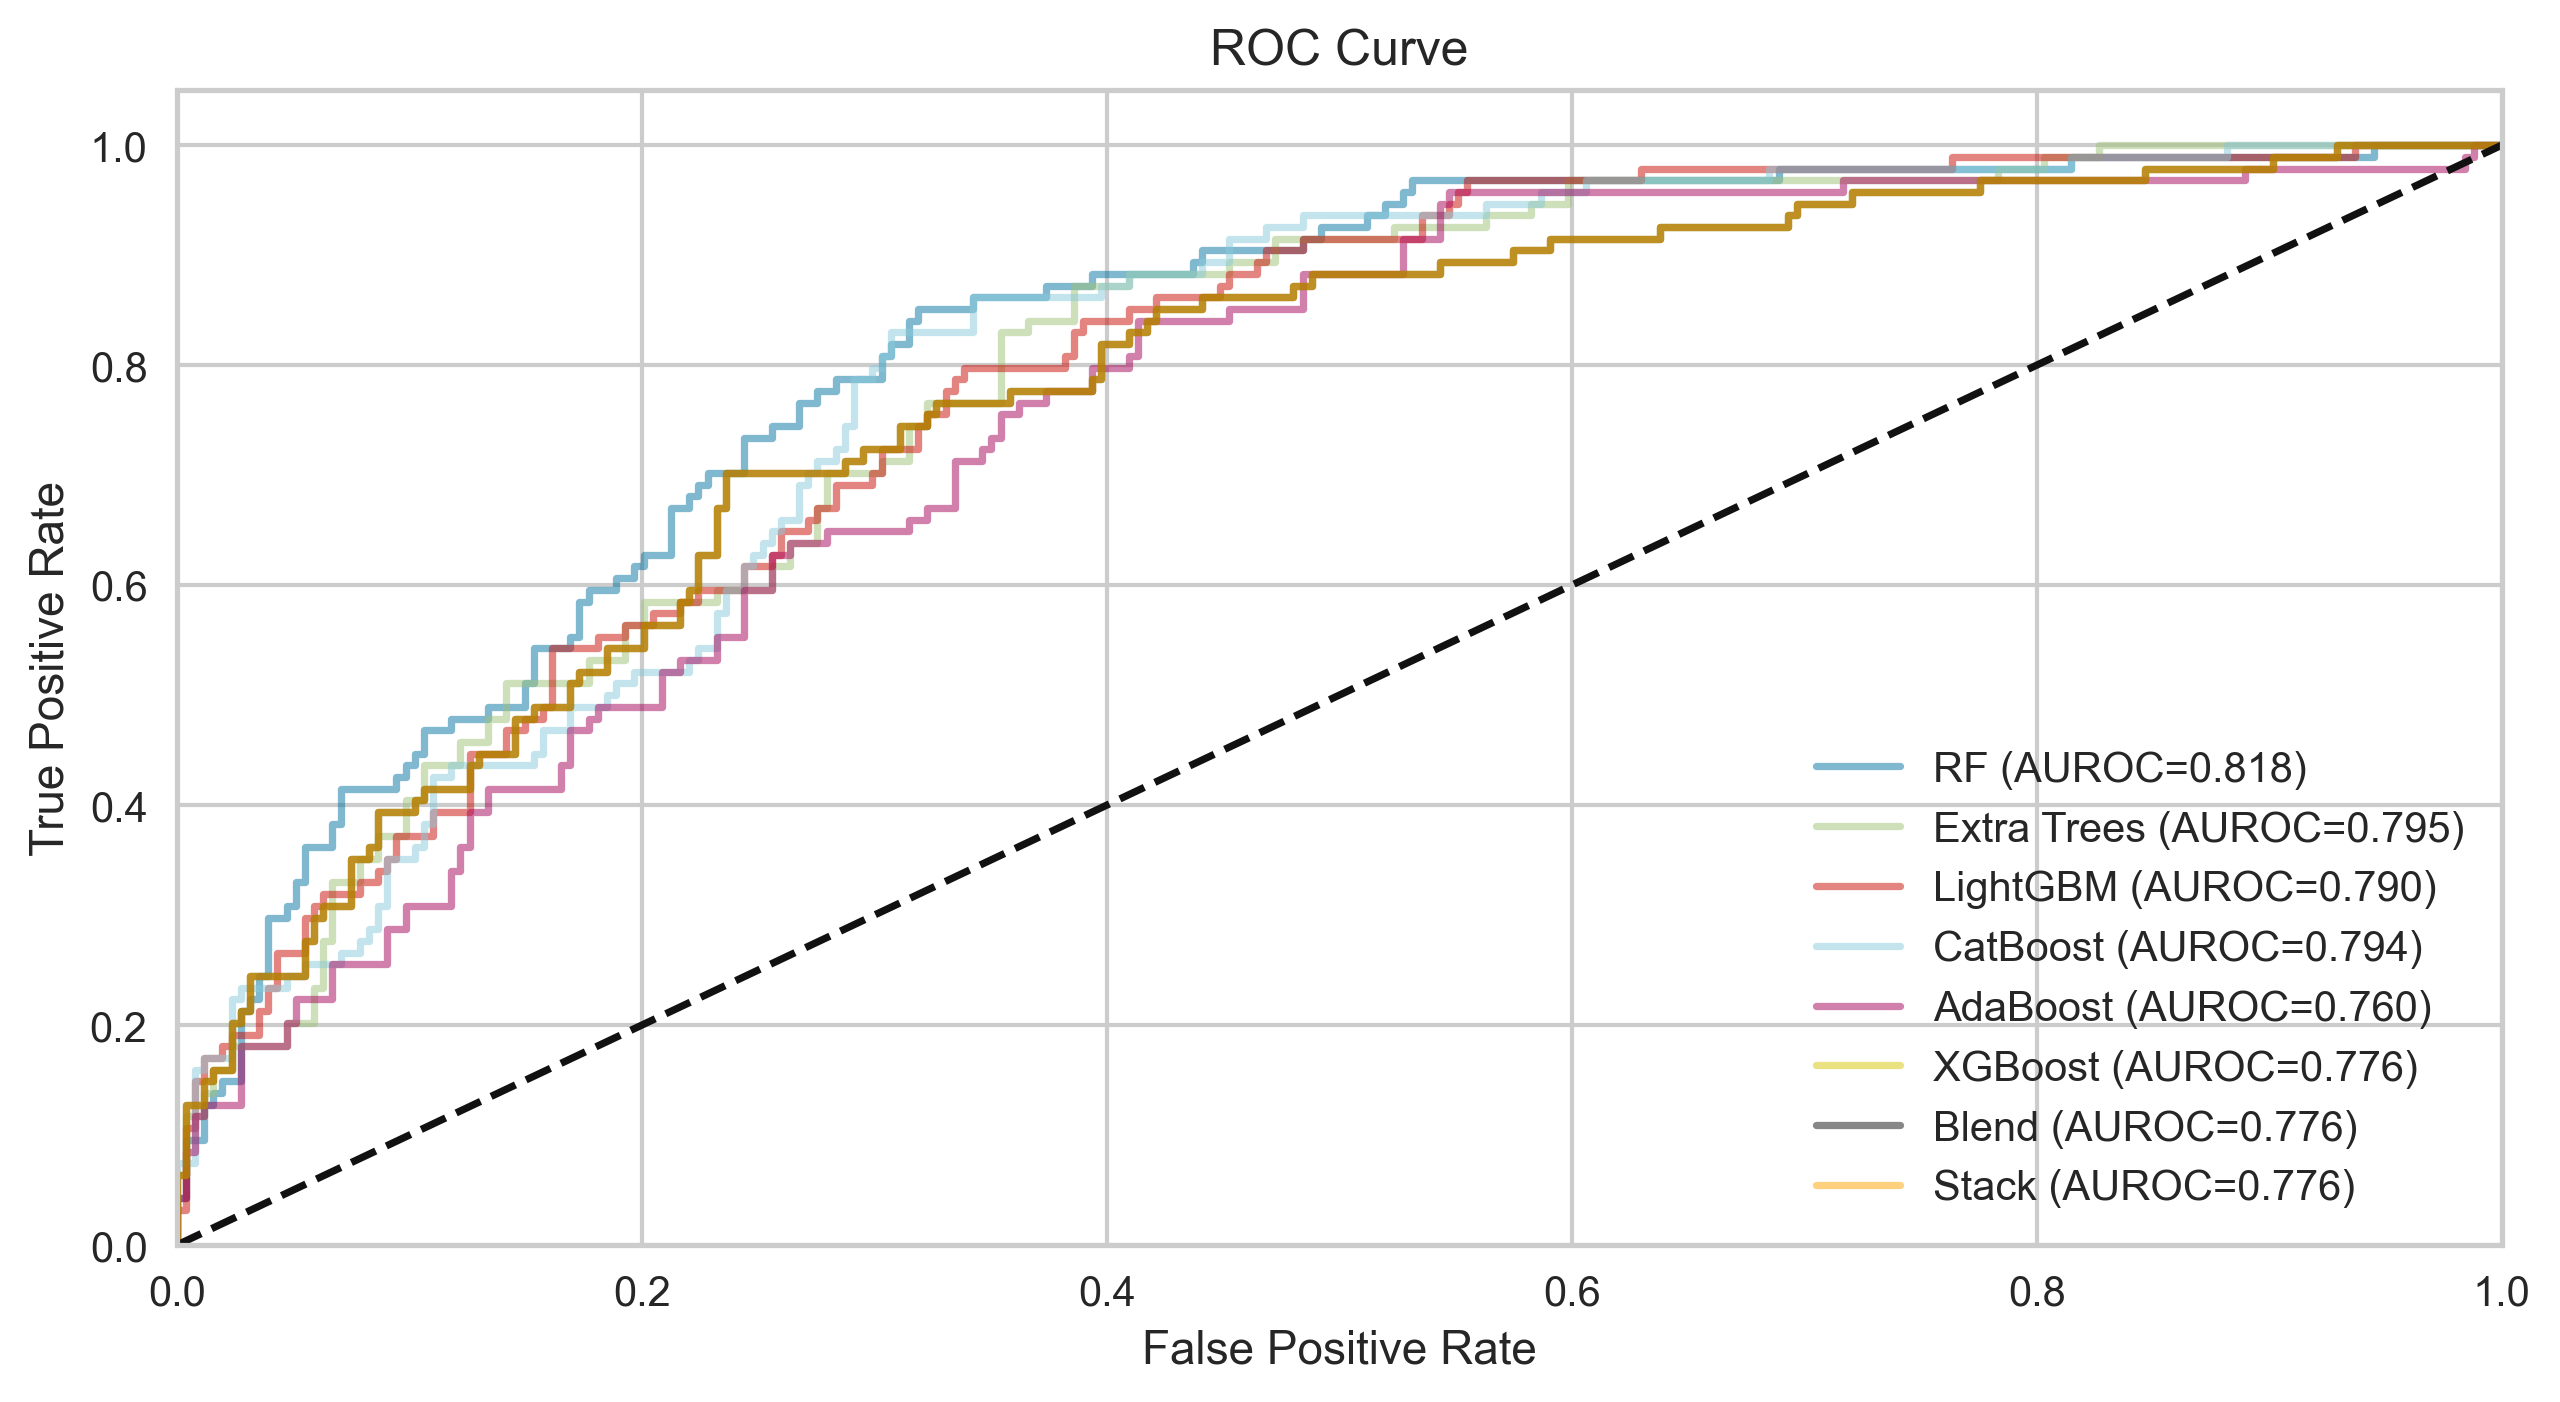

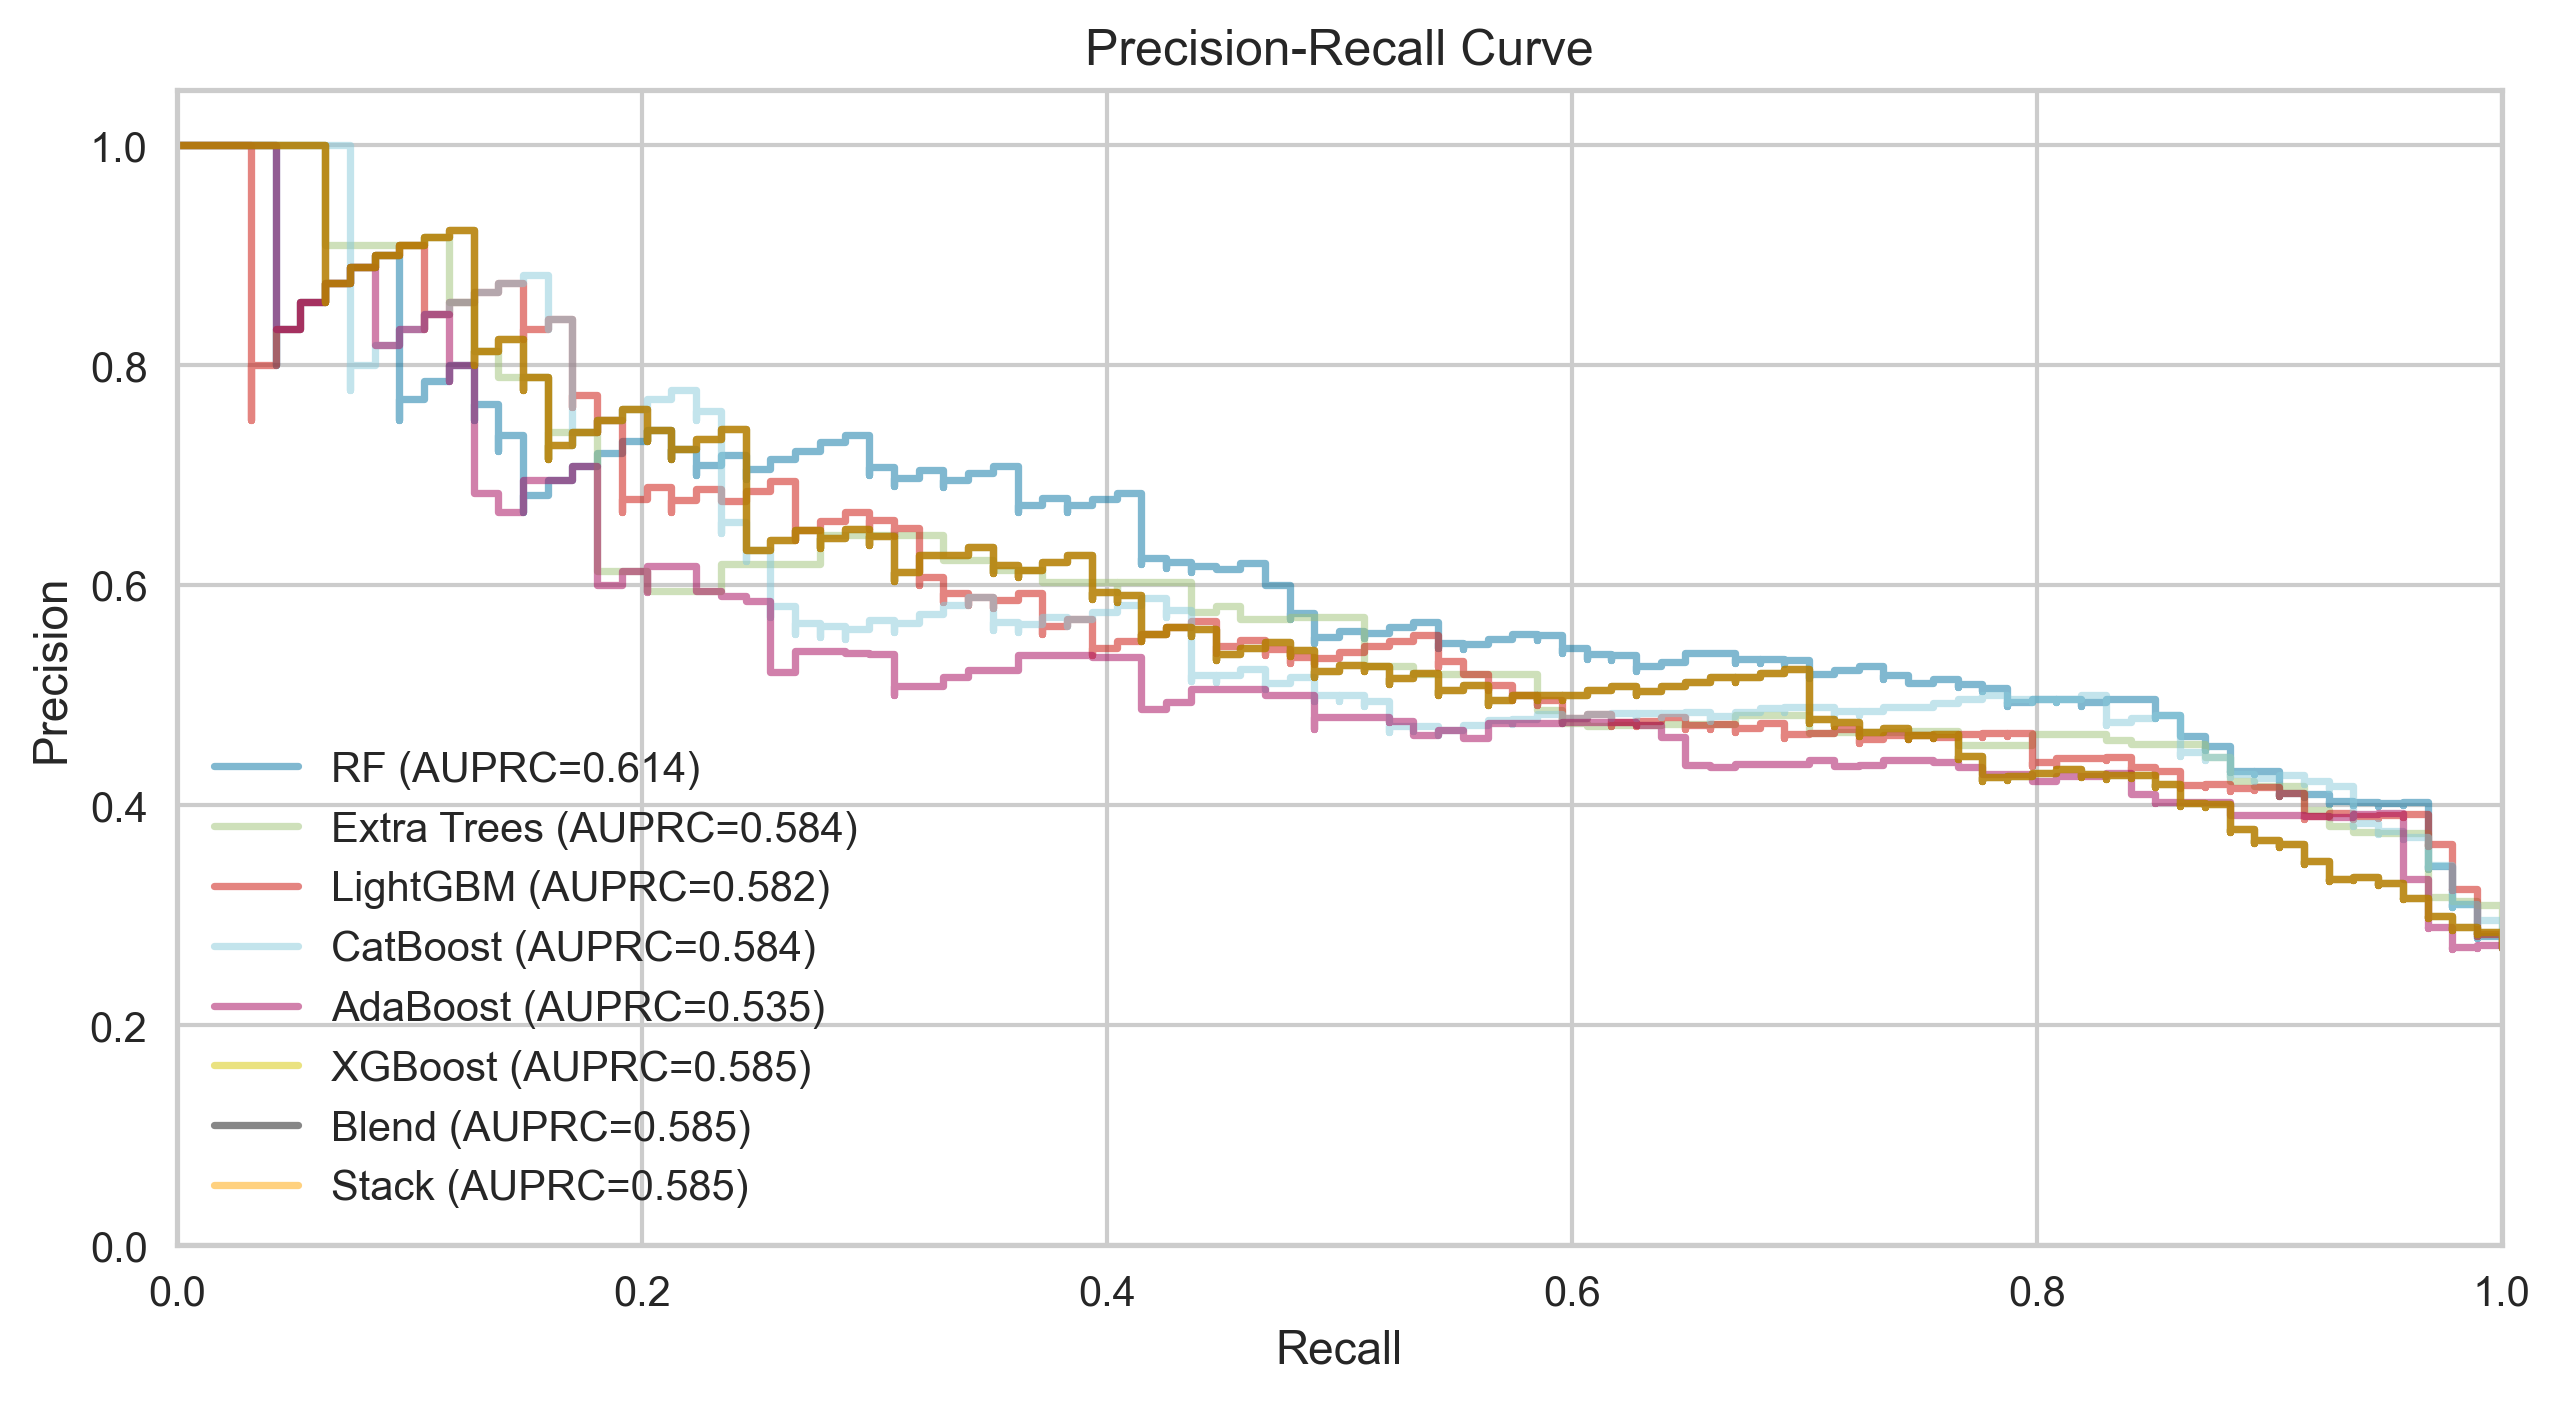

In [35]:
import numpy as np
import matplotlib.pyplot as plt

models = ['rf', 'et', 'lightgbm', 'catboost', 'ada', 'xgb', 'blend', 'stack']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']  # 색상 리스트 (사진처럼)
labels = ['RF', 'Extra Trees', 'LightGBM', 'CatBoost', 'AdaBoost', 'XGBoost', 'Blend', 'Stack']

# ROC 플롯
plt.figure(figsize=(10, 5))
plt.title('ROC Curve')
for i, model in enumerate(models):
    data = np.load(f'./model/{model}_roc.npz')
    fpr = data['fpr']
    tpr = data['tpr']
    auroc = data['auroc']  # Use saved
    plt.step(fpr, tpr, color=colors[i], alpha=0.5, label=f'{labels[i]} (AUROC={auroc:.3f})', where='post')
    
plt.plot([0, 1], [0, 1], 'k--')  # 대각선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='lower right')
plt.gcf().set_dpi(300)
plt.savefig('./figure/roc_comparison.png')
plt.show()

# PR 플롯 (필요시, 비슷하게)
plt.figure(figsize=(10, 5))
plt.title('Precision-Recall Curve')
for i, model in enumerate(models):
    data = np.load(f'./model/{model}_pr.npz')
    precision = data['precision']
    recall = data['recall']
    auprc = data['auprc']  # Use saved value
    plt.step(recall, precision, color=colors[i], alpha=0.5, label=f'{labels[i]} (AUPRC={auprc:.3f})', where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='lower left')
plt.gcf().set_dpi(300)
plt.savefig('./figure/pr_comparison.png')
plt.show()

# Random forest

Fitting 10 folds for each of 20 candidates, totalling 200 fits


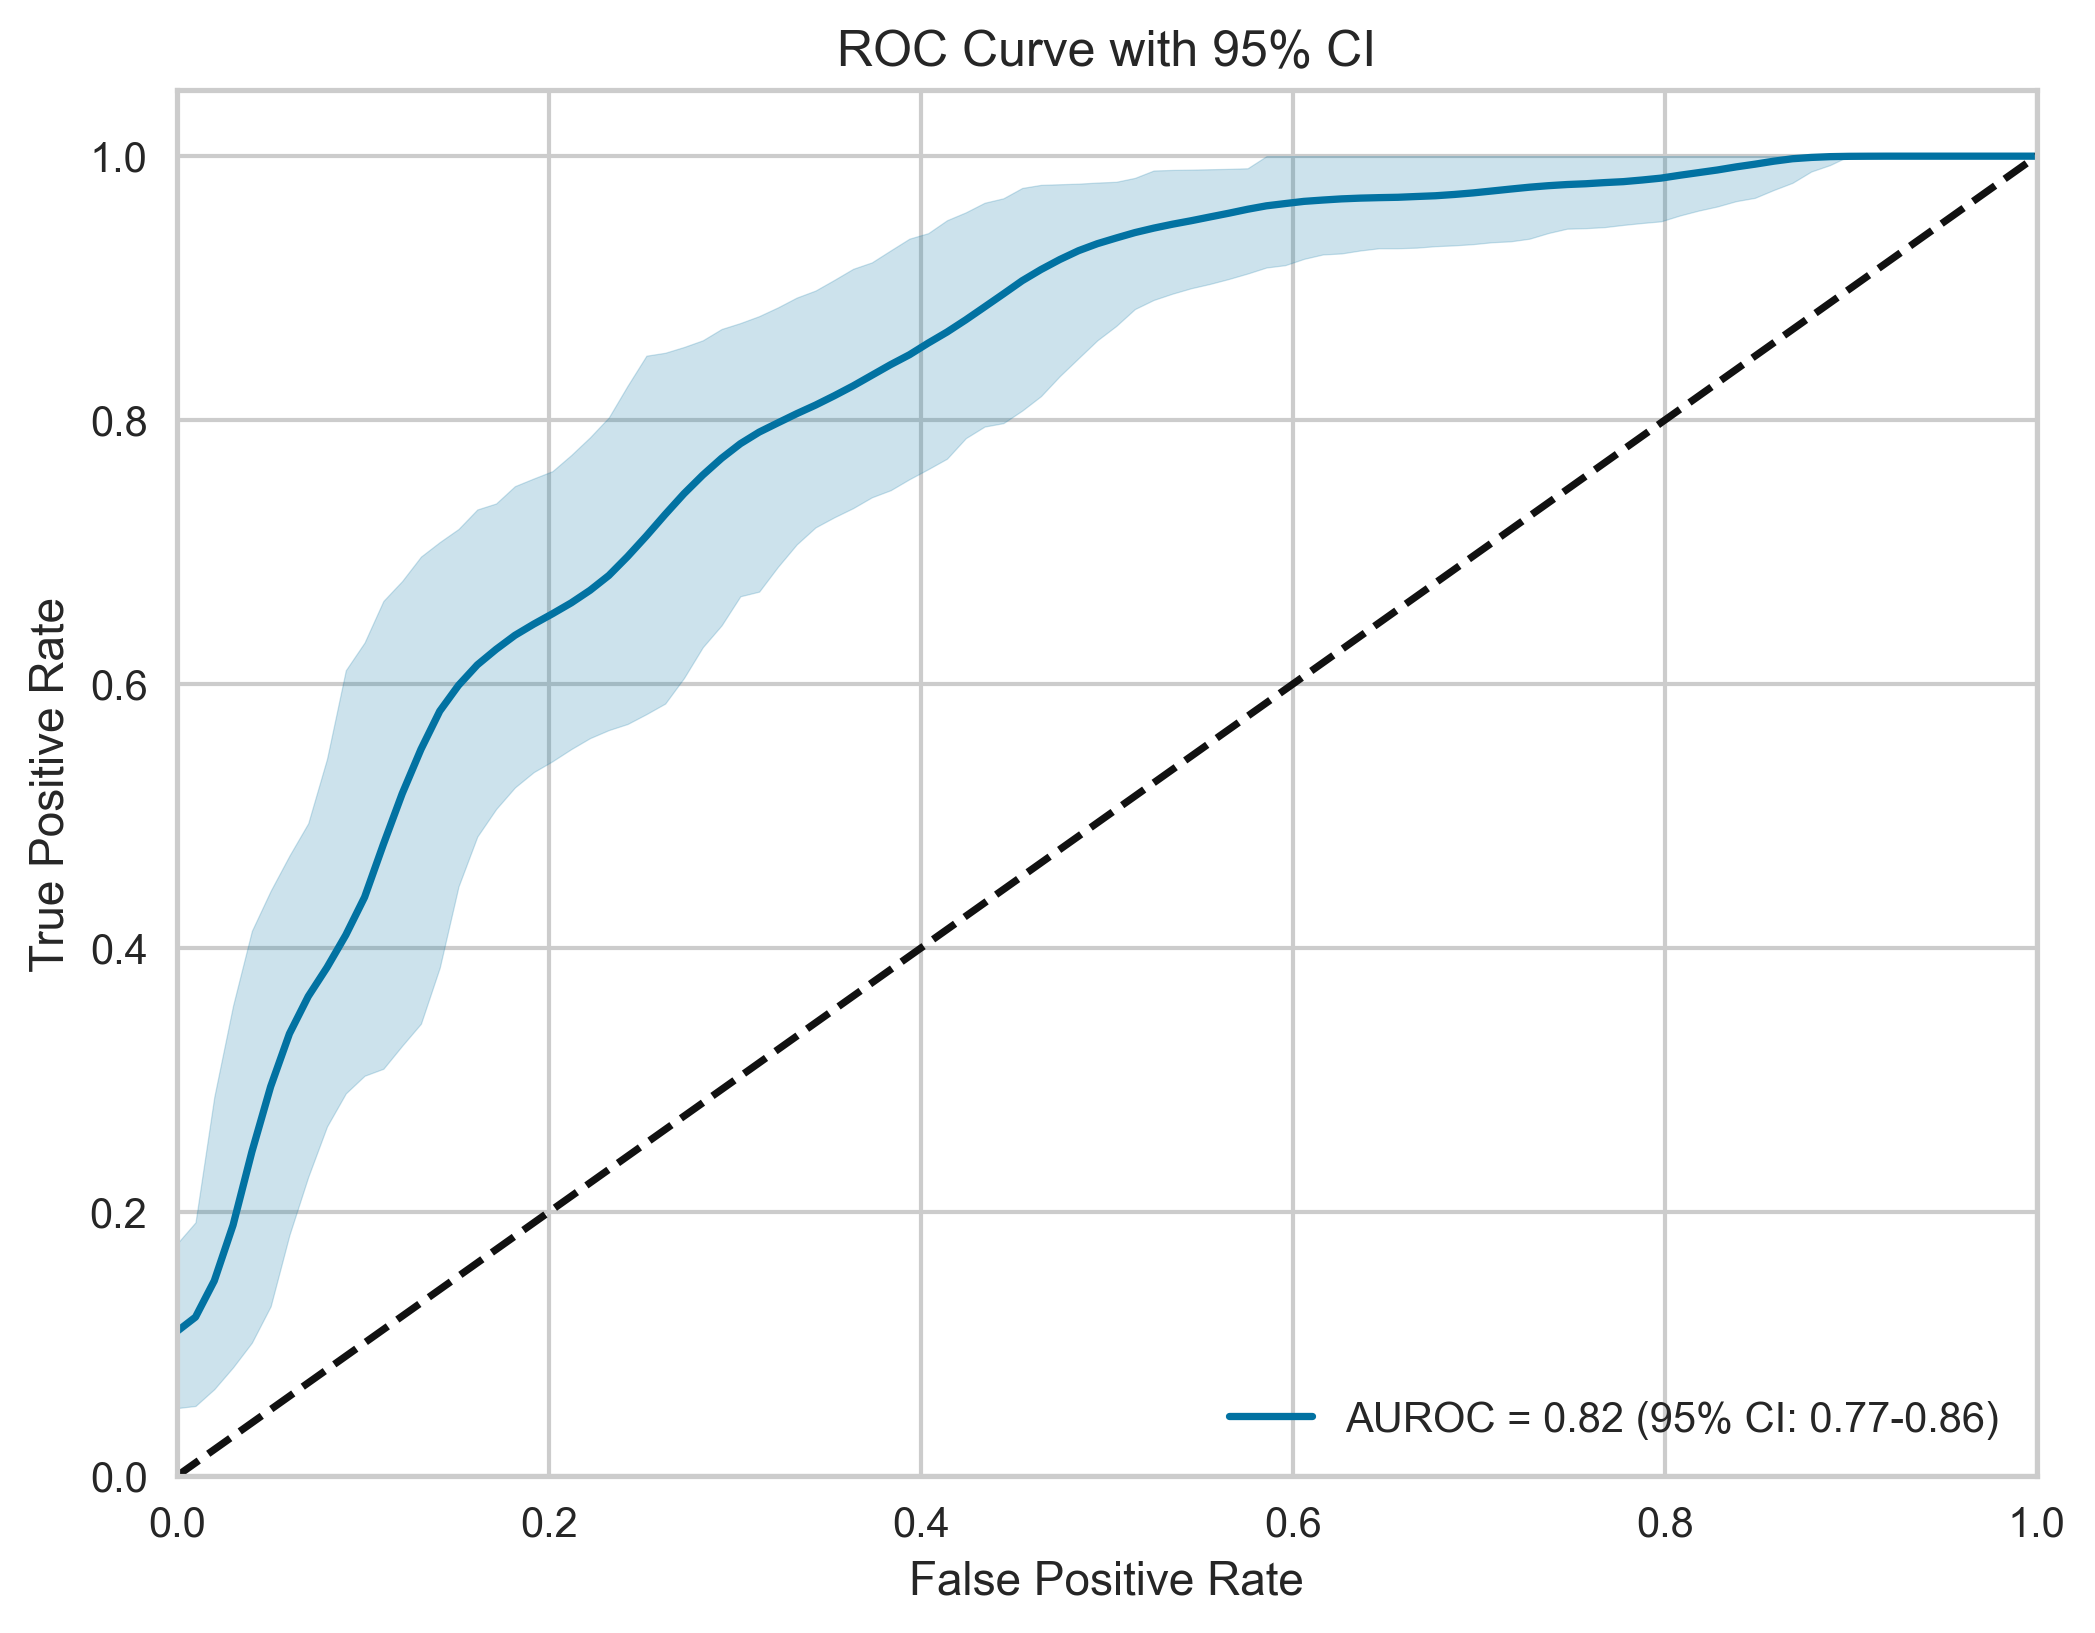

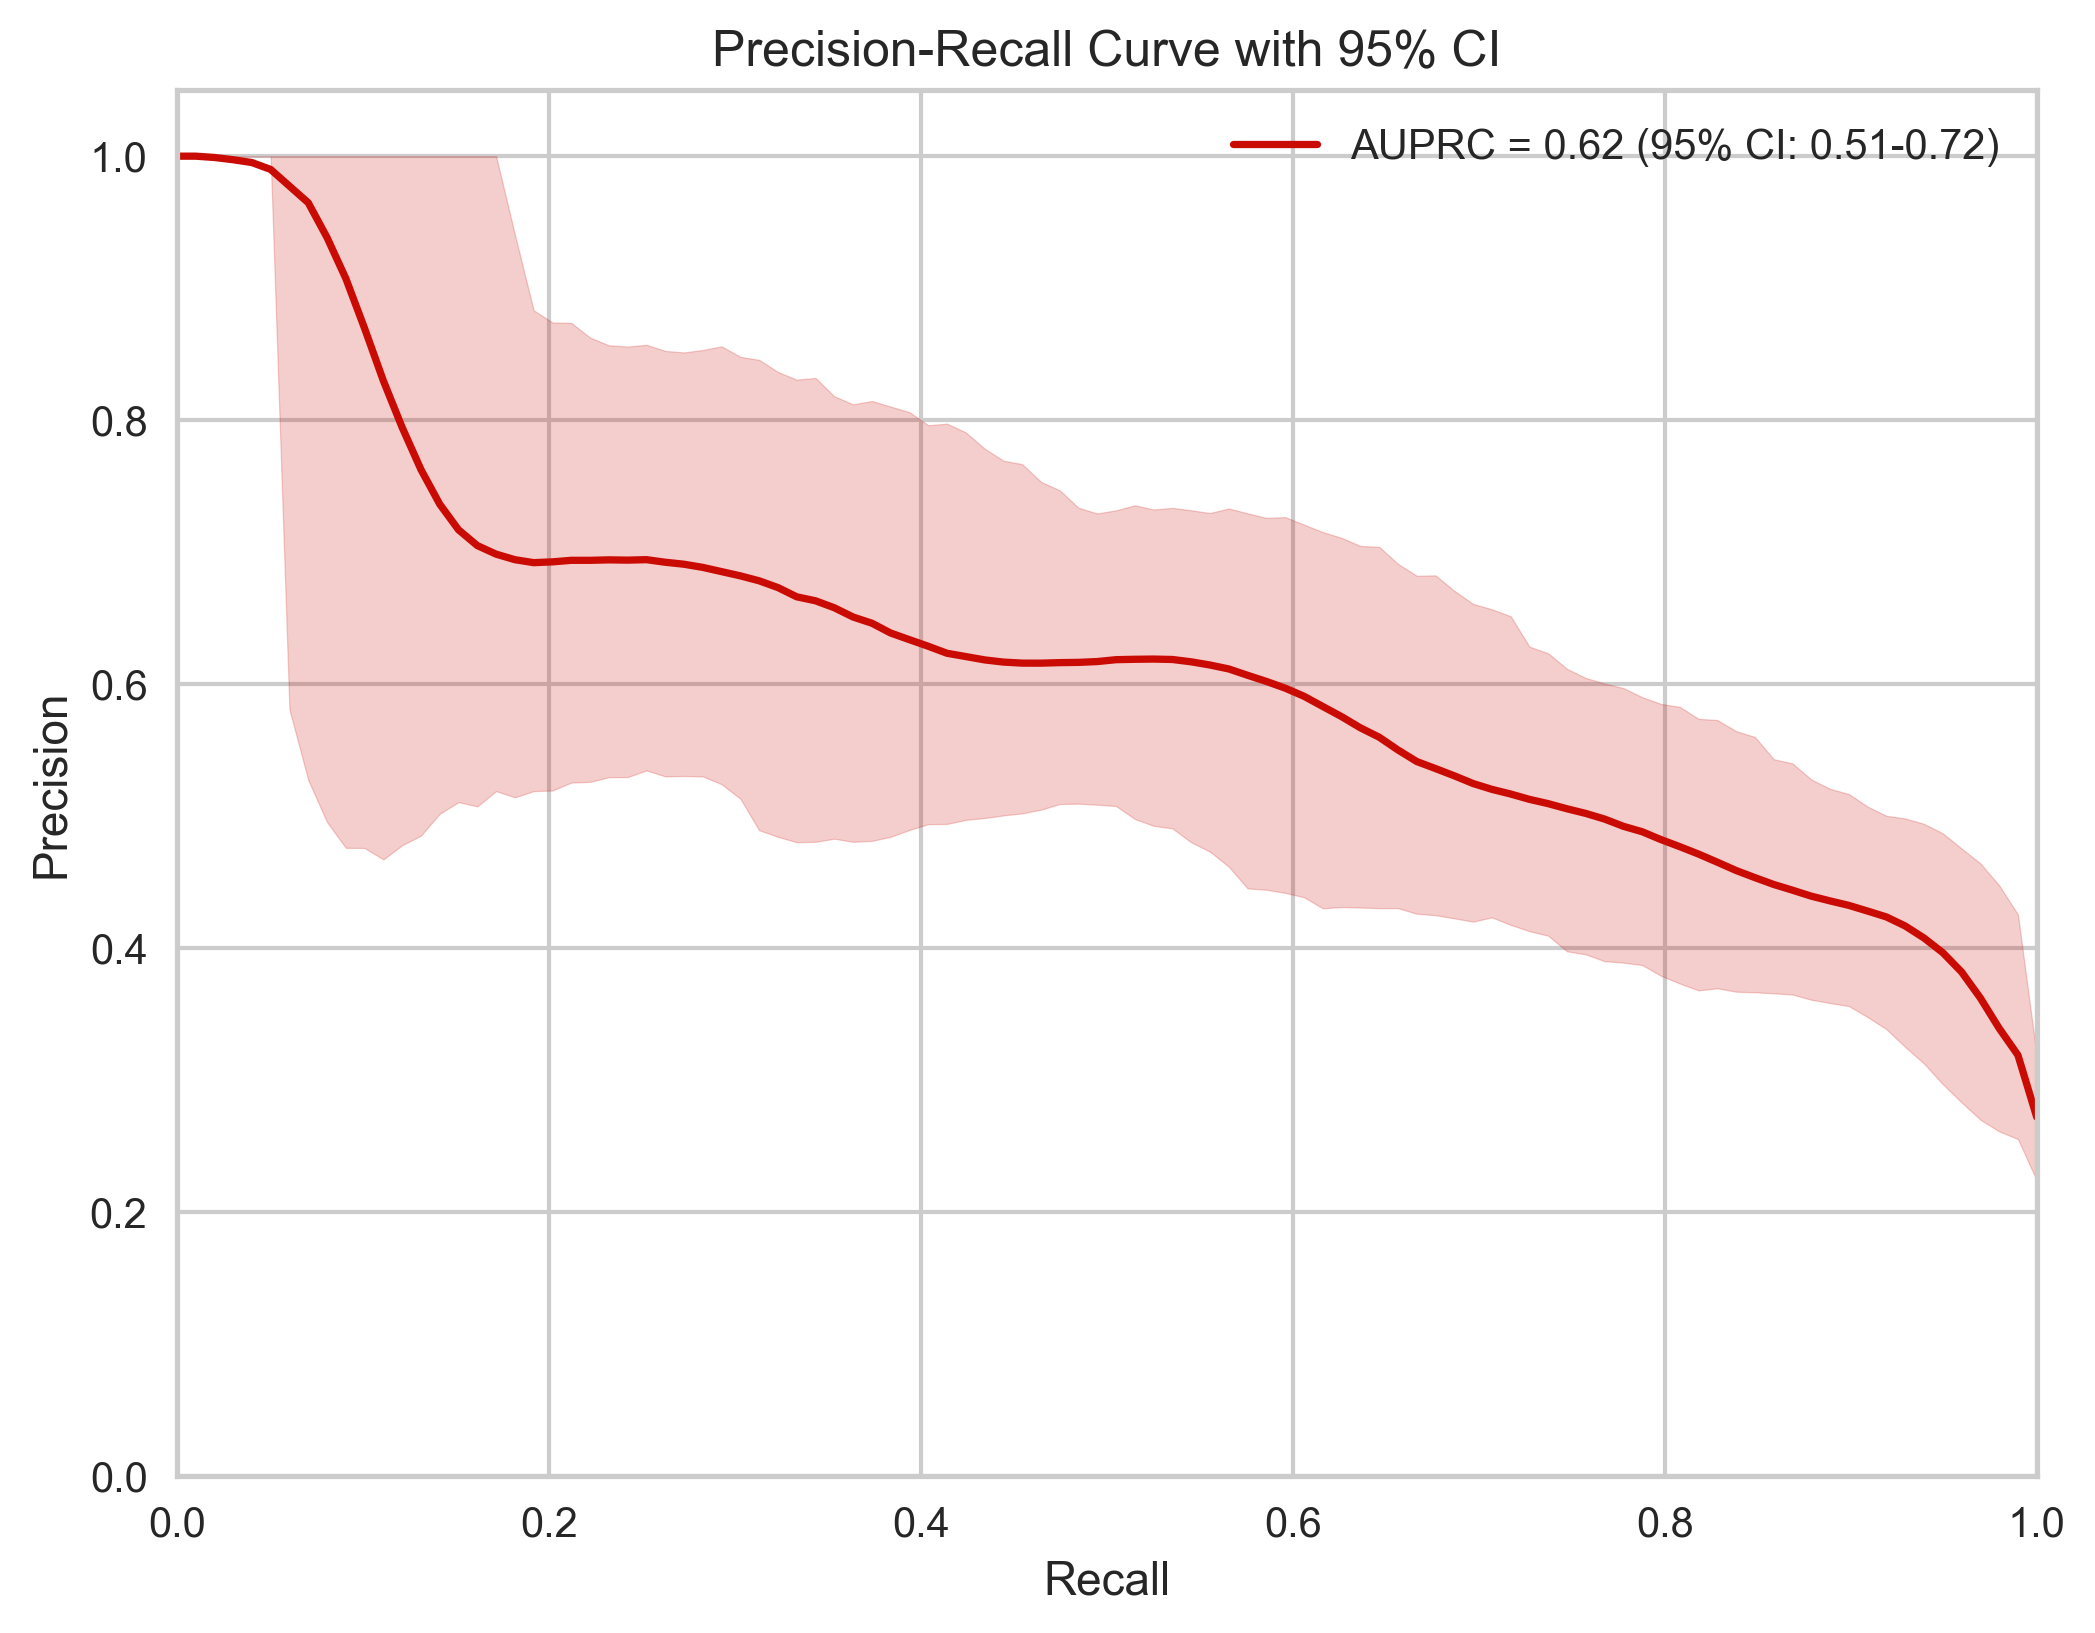

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.utils import resample

ys_data = pd.read_csv("./data/YOUR_DATA.csv")
random_seed = 94
data = ys_data.sample(frac=1, random_state=random_seed)
data = data.query("hjorth_activity_Pleth < 1000")
uni_pids = pd.unique(data["pid"])
tr_uni_pids = uni_pids[:int((len(uni_pids) * 0.8))]
te_uni_pids = uni_pids[int((len(uni_pids) * 0.8)):]
data['tr_yn'] = 0
data.loc[data.pid.isin(tr_uni_pids), 'tr_yn'] = 1
train_data = data[data["tr_yn"] == 1].iloc[:, :-1]
test_data = data[data["tr_yn"] == 0].iloc[:, :-1]
train_data = train_data.sort_values(by=['pid'])
fold_groups = train_data['pid']
setup_clf = setup(data=train_data, target='cam', use_gpu=False, data_split_shuffle=True, memory=False,
                  fold_strategy='groupkfold', fold_groups=fold_groups, ignore_features=['pid', 'cam_time'],
                  n_jobs=2, session_id=8709)

# RF 모델 생성 및 튜닝 (기존 코드)
base_learner = create_model('rf')
final_model = tune_model(base_learner, n_iter=20, early_stopping=True, optimize='Precision')
model = finalize_model(final_model)
prediction = predict_model(model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['cam'].values
y_score = prediction['prediction_score'].values

# Bootstrap 설정
n_boot = 1000
alpha = 0.05  # 95% CI

# ROC 및 PR 곡선용 고정 그리드
fpr_grid = np.linspace(0, 1, 100)
recall_grid = np.linspace(0, 1, 100)

# Bootstrap 배열 초기화
boot_tprs = np.zeros((n_boot, len(fpr_grid)))
boot_precisions = np.zeros((n_boot, len(recall_grid)))
boot_aurocs = np.zeros(n_boot)
boot_auprcs = np.zeros(n_boot)

# Bootstrap 루프
for i in range(n_boot):
    # Resample test data with replacement
    boot_idx = resample(np.arange(len(y_true)), replace=True, n_samples=len(y_true), random_state=i)
    boot_y_true = y_true[boot_idx]
    boot_y_score = y_score[boot_idx]
    
    # AUROC & ROC
    boot_aurocs[i] = roc_auc_score(boot_y_true, boot_y_score)
    fpr, tpr, _ = roc_curve(boot_y_true, boot_y_score)
    boot_tprs[i] = np.interp(fpr_grid, fpr, tpr)  # fpr_grid에 대한 tpr 보간
    
    # AUPRC & PR
    boot_auprcs[i] = average_precision_score(boot_y_true, boot_y_score)
    precision, recall, _ = precision_recall_curve(boot_y_true, boot_y_score)
    boot_precisions[i] = np.interp(recall_grid, recall[::-1], precision[::-1])  # recall 내림차순이므로 반전

# 원본 곡선 계산 (mean curve)
orig_auroc = roc_auc_score(y_true, y_score)
orig_fpr, orig_tpr, _ = roc_curve(y_true, y_score)
orig_auprc = average_precision_score(y_true, y_score)
orig_precision, orig_recall, _ = precision_recall_curve(y_true, y_score)

# CI 계산 (percentiles)
tpr_lower = np.percentile(boot_tprs, 100 * alpha / 2, axis=0)
tpr_upper = np.percentile(boot_tprs, 100 * (1 - alpha / 2), axis=0)
precision_lower = np.percentile(boot_precisions, 100 * alpha / 2, axis=0)
precision_upper = np.percentile(boot_precisions, 100 * (1 - alpha / 2), axis=0)
auroc_low = np.percentile(boot_aurocs, 100 * alpha / 2)
auroc_high = np.percentile(boot_aurocs, 100 * (1 - alpha / 2))
auprc_low = np.percentile(boot_auprcs, 100 * alpha / 2)
auprc_high = np.percentile(boot_auprcs, 100 * (1 - alpha / 2))

# ROC 플롯
plt.figure(figsize=(8, 6))
plt.plot(fpr_grid, np.mean(boot_tprs, axis=0), color='b', label=f'AUROC = {orig_auroc:.2f} (95% CI: {auroc_low:.2f}-{auroc_high:.2f})')
plt.fill_between(fpr_grid, tpr_lower, tpr_upper, color='b', alpha=0.2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 95% CI')
plt.legend(loc='lower right')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.gcf().set_dpi(300)
plt.savefig('roc_with_ci.png')
plt.show()

# PR 플롯
plt.figure(figsize=(8, 6))
plt.plot(recall_grid, np.mean(boot_precisions, axis=0), color='r', label=f'AUPRC = {orig_auprc:.2f} (95% CI: {auprc_low:.2f}-{auprc_high:.2f})')
plt.fill_between(recall_grid, precision_lower, precision_upper, color='r', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with 95% CI')
plt.legend(loc='upper right')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.gcf().set_dpi(300)
plt.savefig('pr_with_ci.png')
plt.show()

In [44]:
temporal = pd.read_csv('./data/TEMPORAL_VALIDATIONSET.csv')
temporal = temporal.query("age > 18")


tv.columns = [

    'pid', 'cam_time', 'cam', 'sex', 'age', 'HRs_median', 'HRs_std', 'RRs_median', 'RRs_std',
    'SpO2s_median', 'SpO2s_std', 'hjorth_activity_II', 'hjorth_morbidity_II', 'hjorth_complexity_II',
    'kurtosis_II', 'skewness_II', 'hjorth_activity_Pleth', 'kurtosis_Pleth', 'skewness_Pleth',
    'hjorth_activity_Resp', 'kurtosis_Resp', 'skewness_Resp'
              
             ]

tv = tv.dropna(axis=0, how='any')
#문자형 데이터를 숫자형으로 변환
tv=tv.replace({'sex': 'M'}, {'sex': 0})
tv=tv.replace({'sex': 'F'}, {'sex': 1})
tv = tv.query("hjorth_activity_Pleth < 1000")
q1 = tv.query("cam_time < 'YYYY-MM-DD'")
q2 = tv.query("cam_time < 'YYYY-MM-DD' and cam_time >= 'YYYY-MM-DD'")
q3 = tv.query("cam_time < 'YYYY-MM-DD' and cam_time >= 'YYYY-MM-DD'")
q4 = tv.query("cam_time >= 'YYYY-MM-DD'")

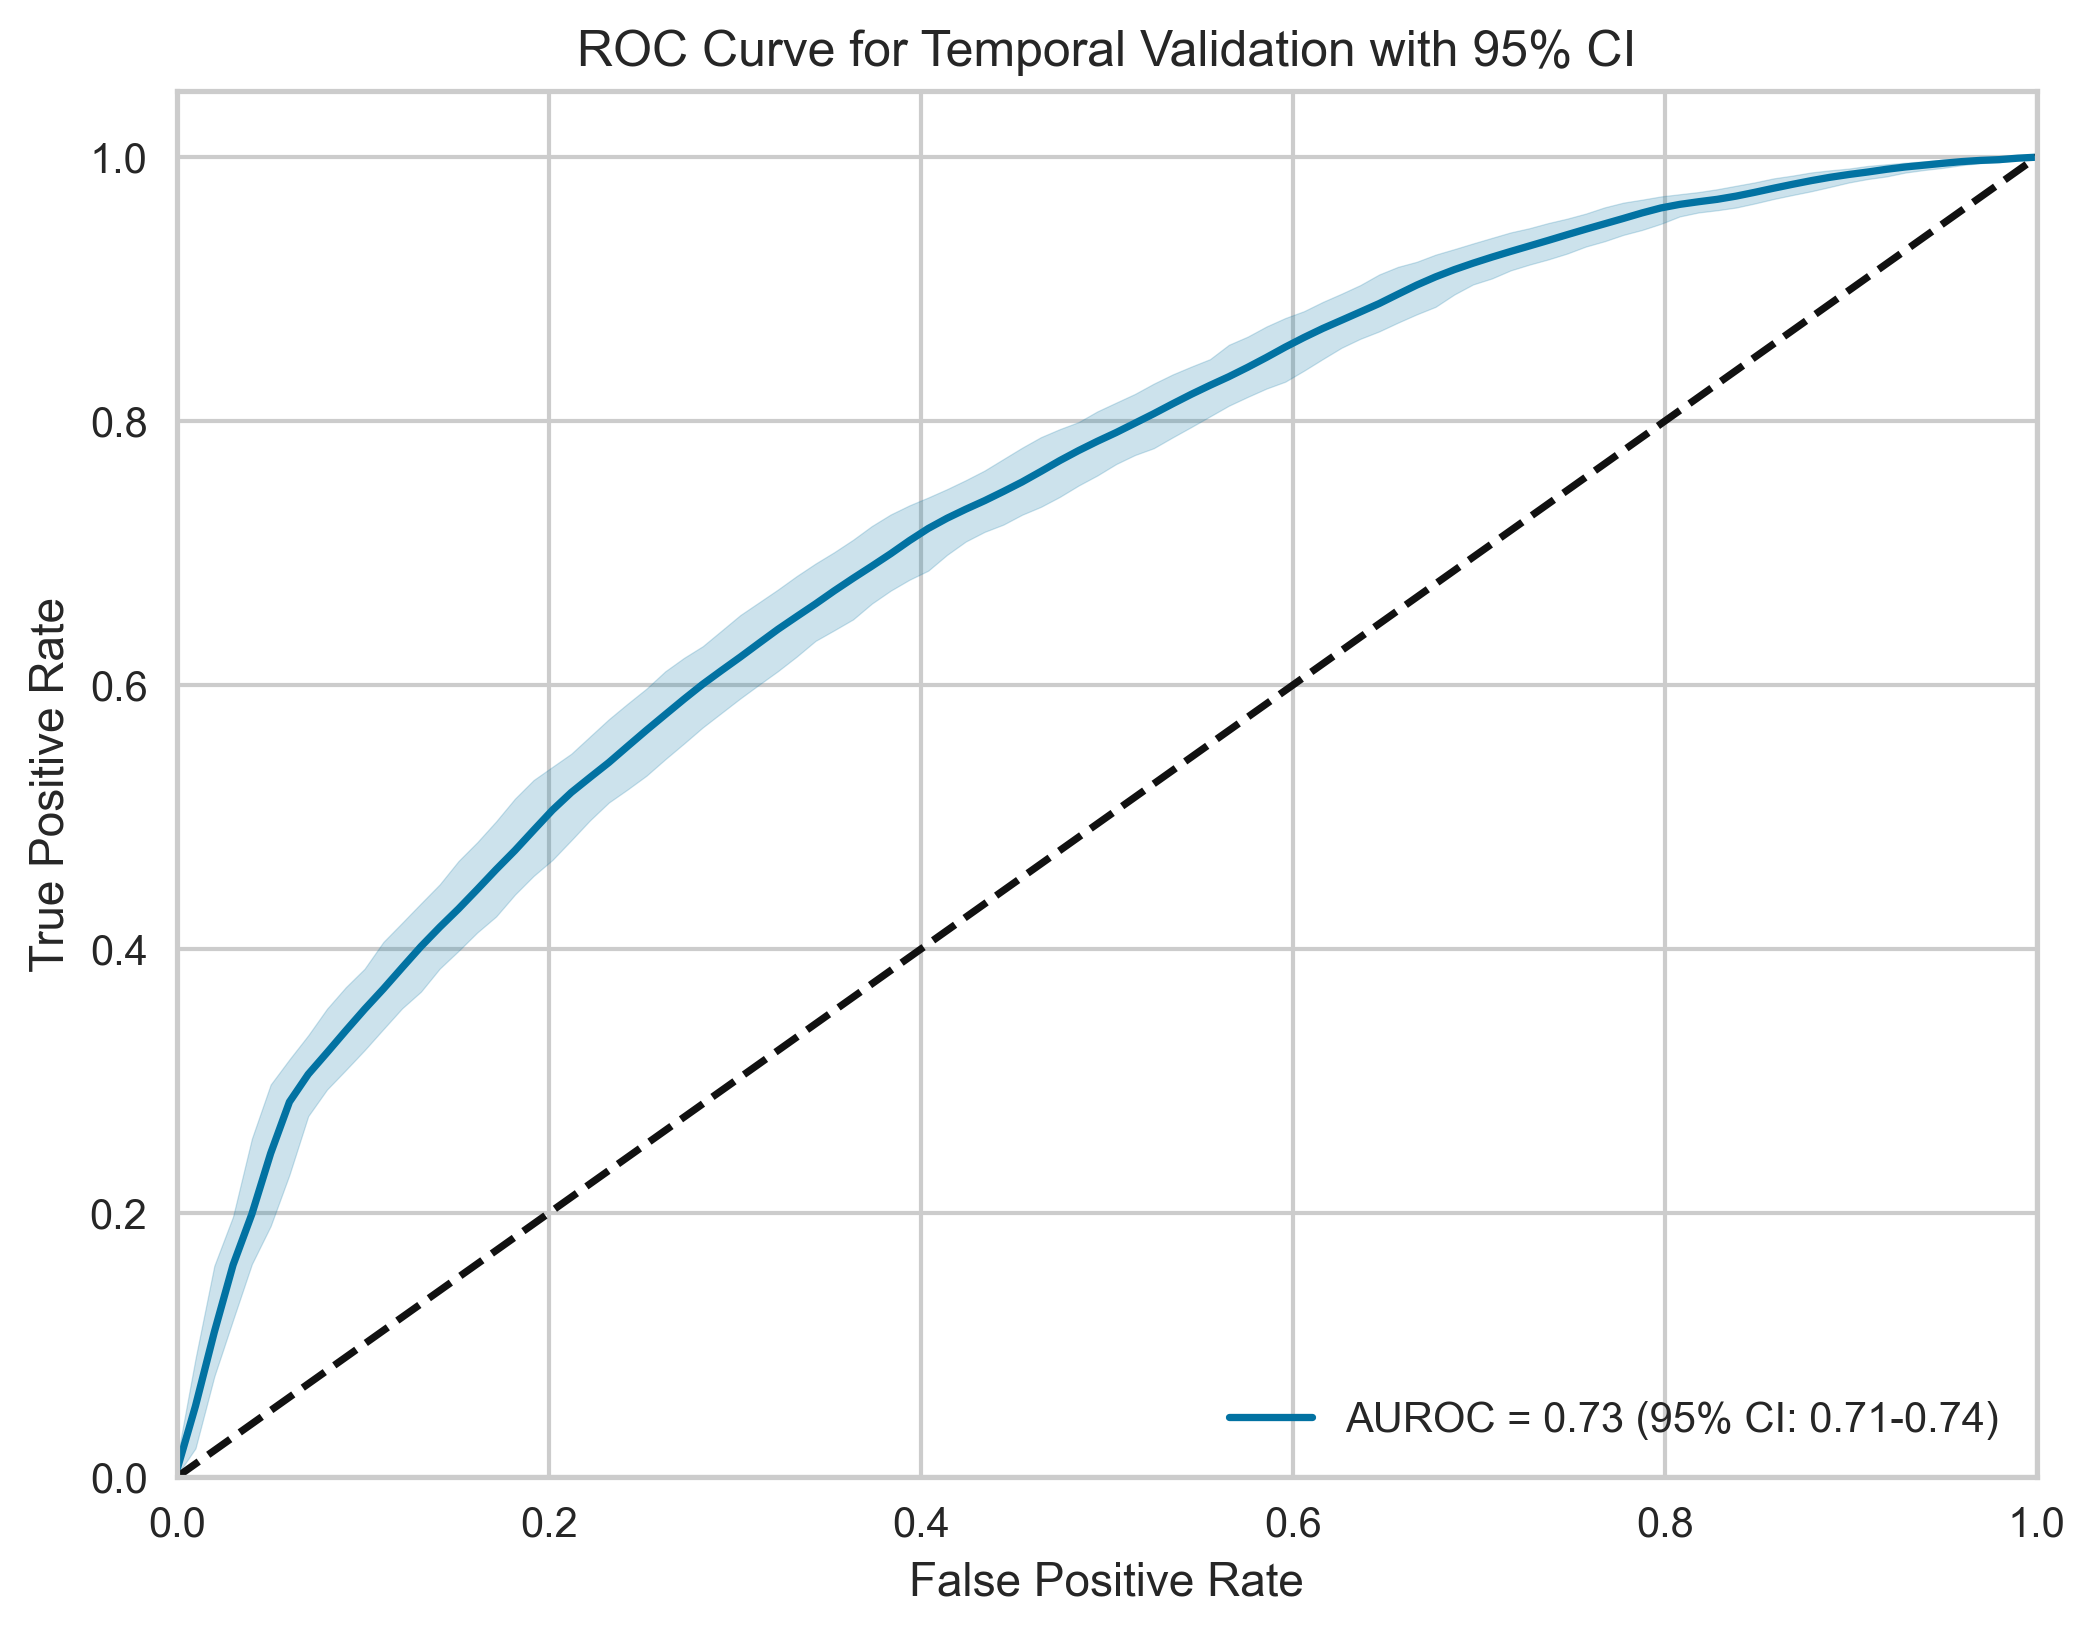

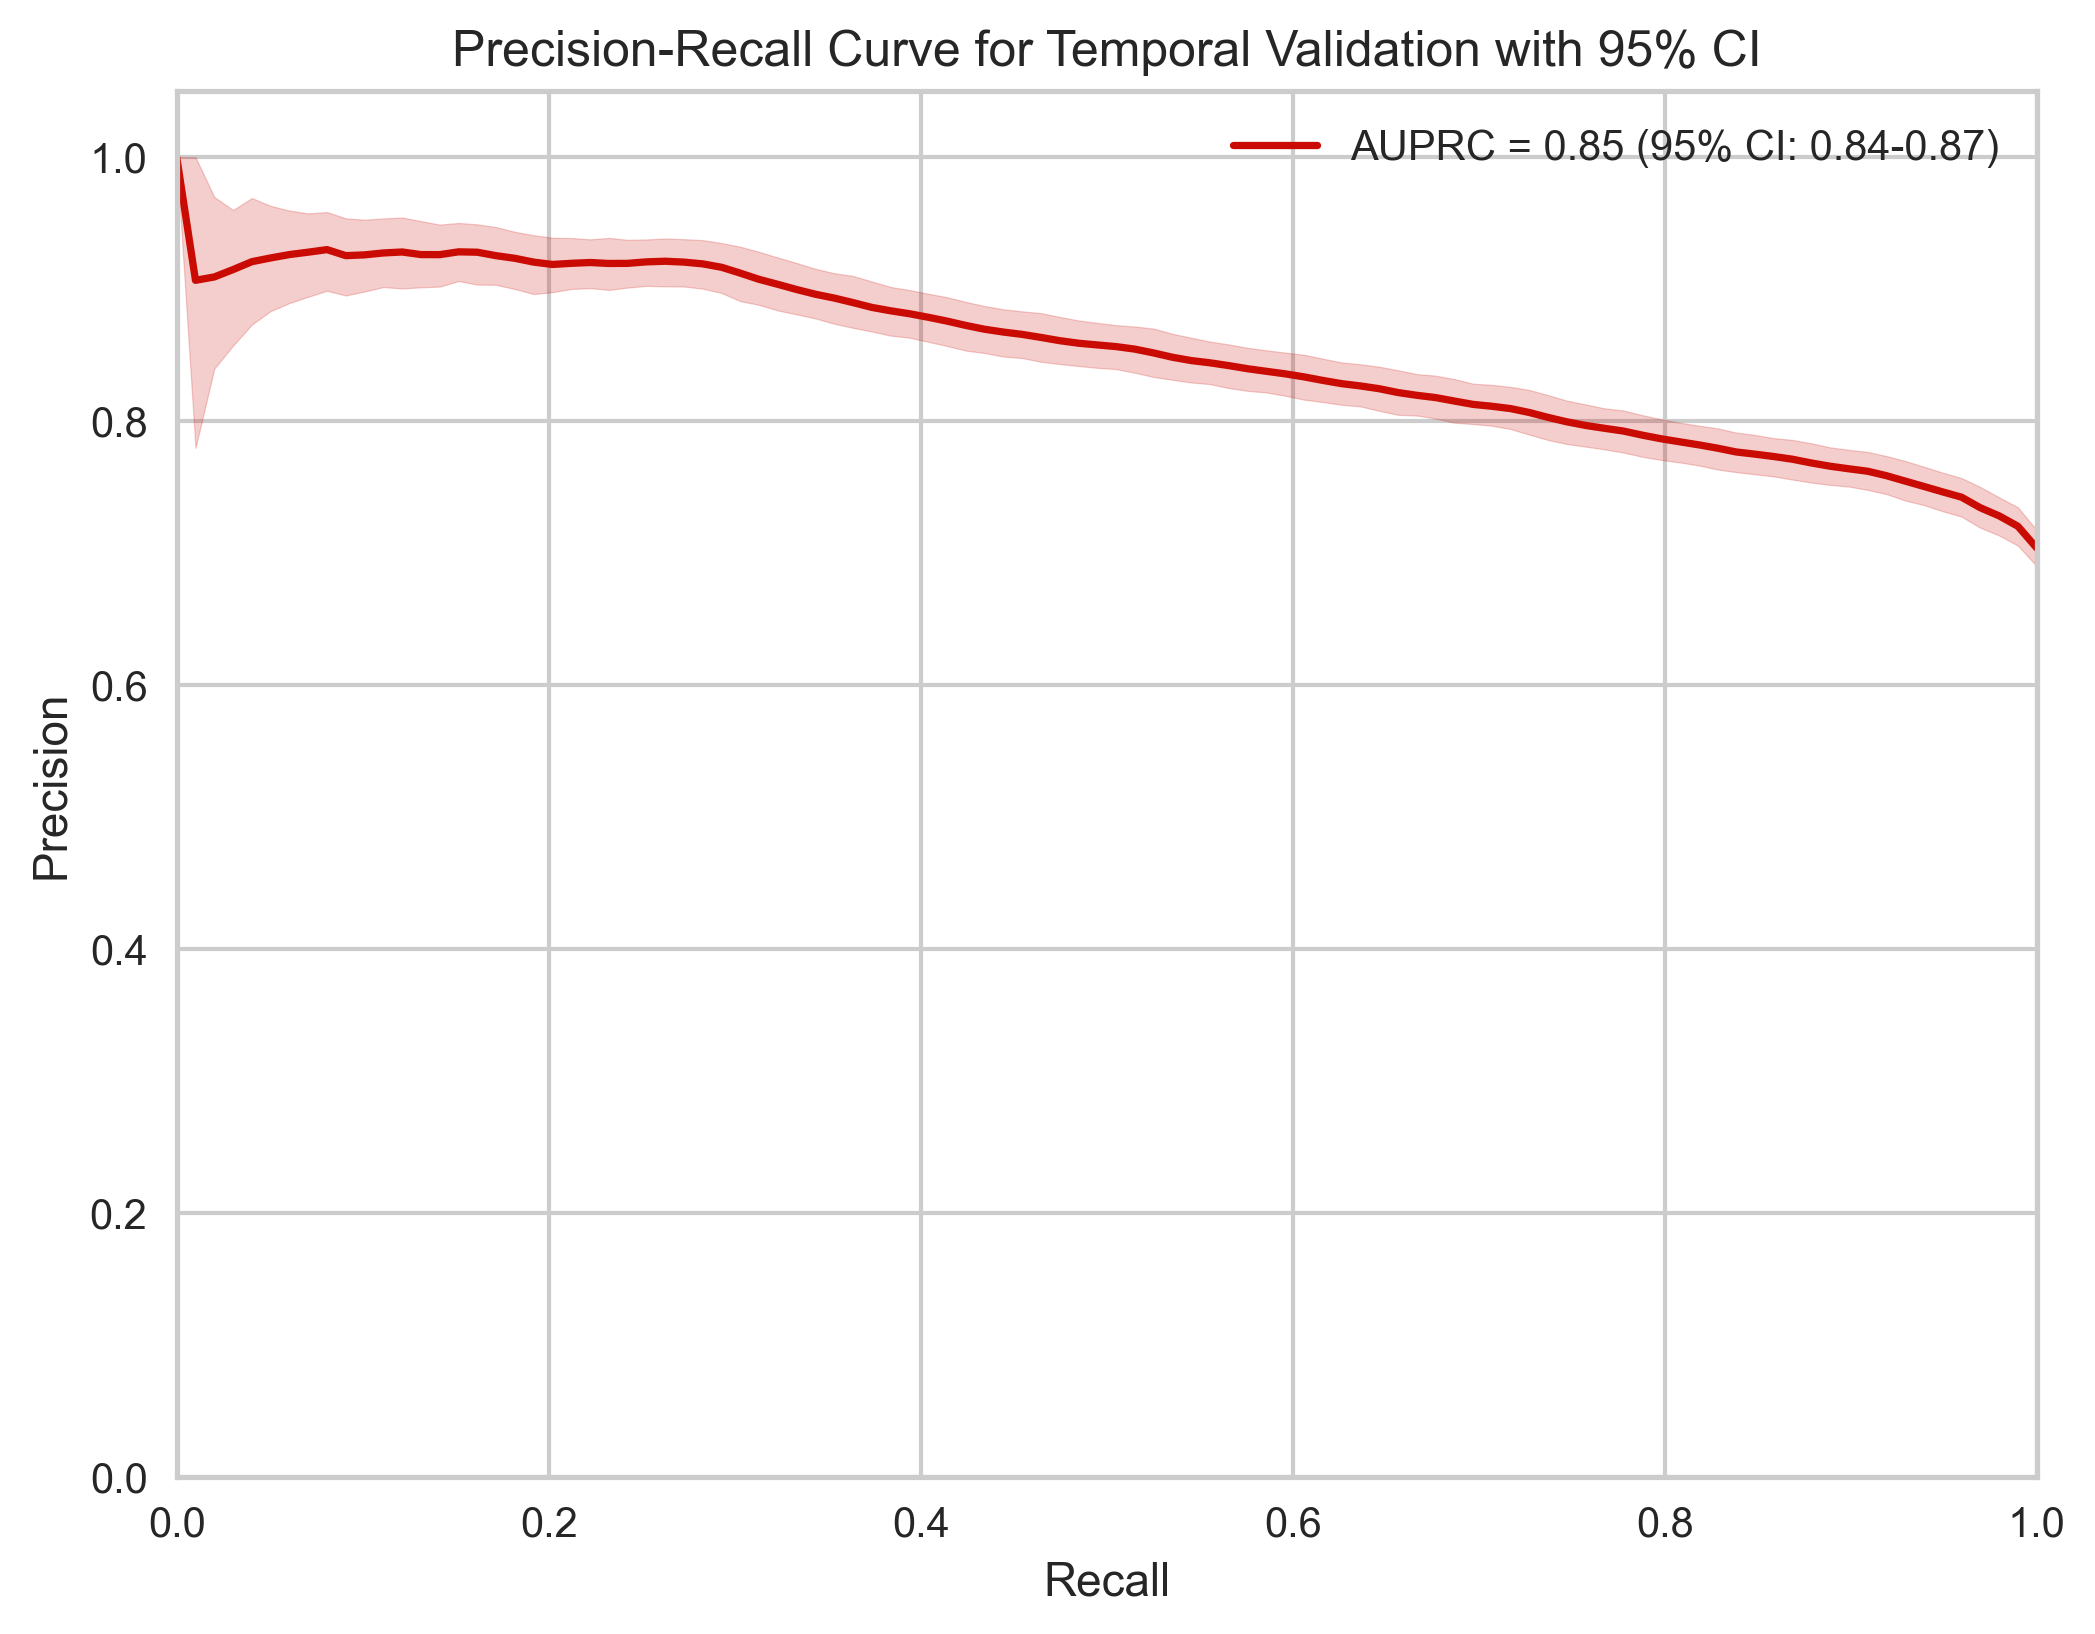

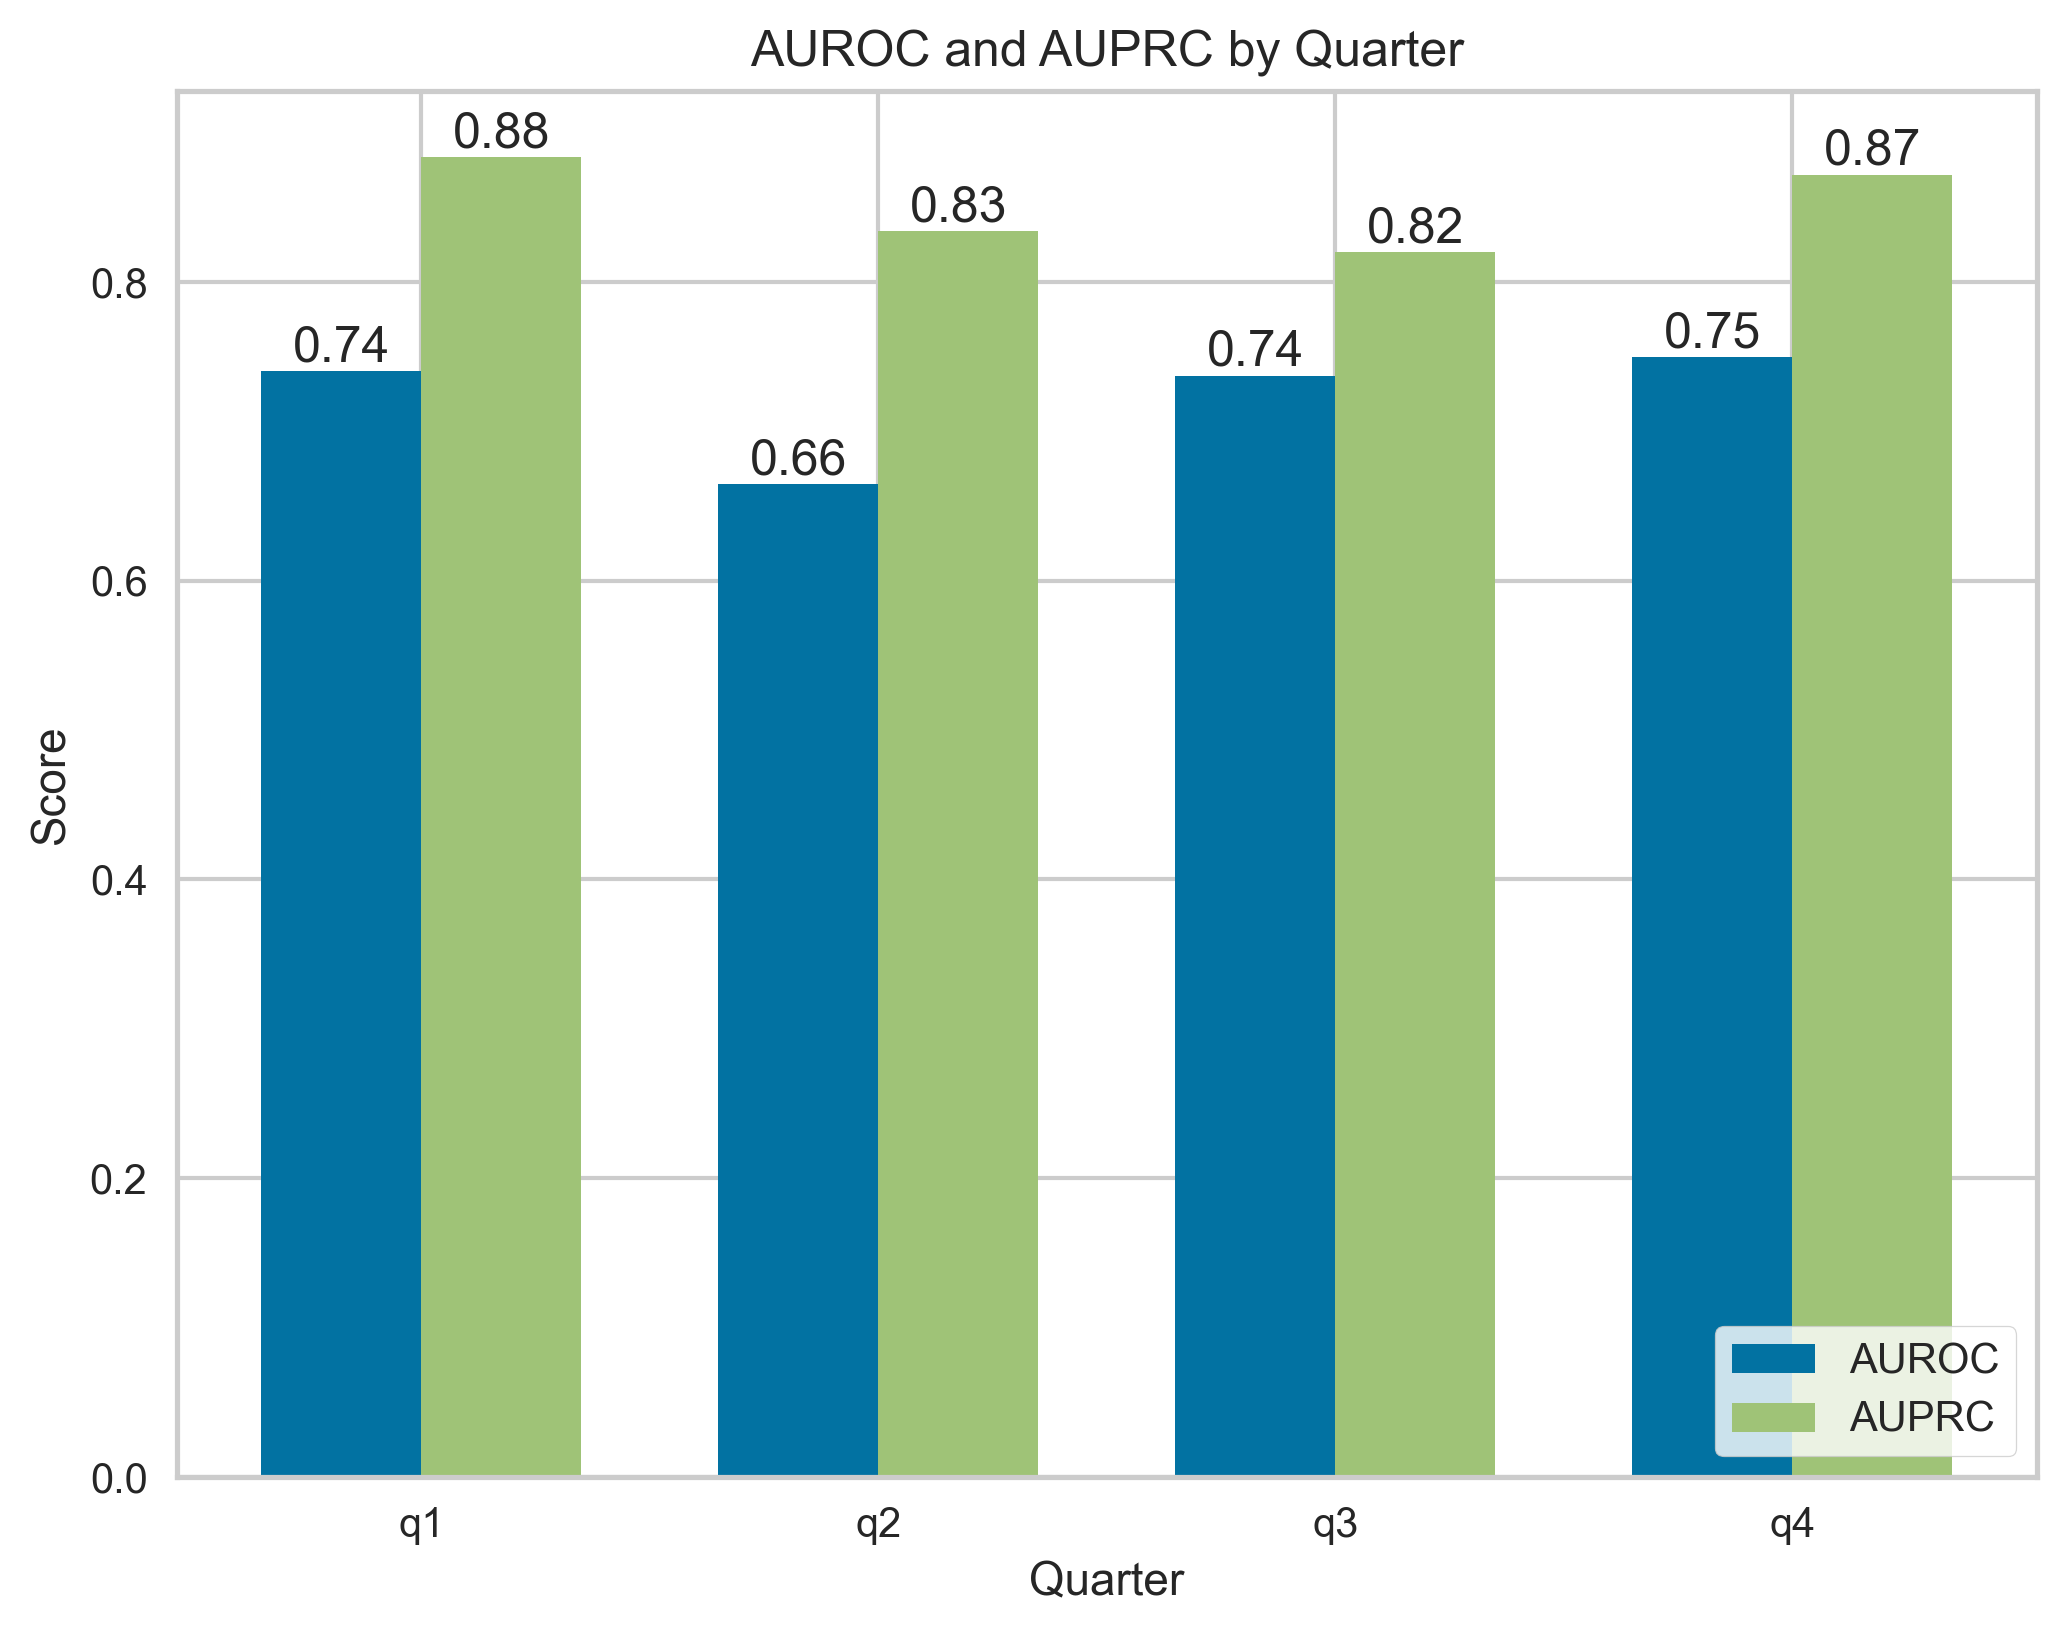

In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from pycaret.classification import predict_model  # Add this import if not already
from sklearn.utils import resample

# Assume 'model' is the trained Random Forest model from previous code
# Assume 'tv' is the temporal validation dataframe, with columns like 'cam' (target) and features
# Predict on tv
prediction_tv = predict_model(model, data=tv)
prediction_tv.loc[prediction_tv["prediction_label"] == 0, 'prediction_score'] = 1 - prediction_tv[prediction_tv["prediction_label"] == 0]["prediction_score"]
y_true_tv = prediction_tv['cam'].values
y_score_tv = prediction_tv['prediction_score'].values

# Bootstrap for tv
n_boot = 1000
alpha = 0.05
fpr_grid = np.linspace(0, 1, 100)
recall_grid = np.linspace(0, 1, 100)
boot_tprs_tv = np.zeros((n_boot, len(fpr_grid)))
boot_precisions_tv = np.zeros((n_boot, len(recall_grid)))
boot_aurocs_tv = np.zeros(n_boot)
boot_auprcs_tv = np.zeros(n_boot)

for i in range(n_boot):
    boot_idx = resample(np.arange(len(y_true_tv)), replace=True, n_samples=len(y_true_tv), random_state=i)
    boot_y_true = y_true_tv[boot_idx]
    boot_y_score = y_score_tv[boot_idx]
    boot_aurocs_tv[i] = roc_auc_score(boot_y_true, boot_y_score)
    fpr, tpr, _ = roc_curve(boot_y_true, boot_y_score)
    boot_tprs_tv[i] = np.interp(fpr_grid, fpr, tpr)
    boot_auprcs_tv[i] = average_precision_score(boot_y_true, boot_y_score)
    precision, recall, _ = precision_recall_curve(boot_y_true, boot_y_score)
    boot_precisions_tv[i] = np.interp(recall_grid, recall[::-1], precision[::-1])

orig_auroc_tv = roc_auc_score(y_true_tv, y_score_tv)
orig_fpr_tv, orig_tpr_tv, _ = roc_curve(y_true_tv, y_score_tv)
orig_auprc_tv = average_precision_score(y_true_tv, y_score_tv)
orig_precision_tv, orig_recall_tv, _ = precision_recall_curve(y_true_tv, y_score_tv)

tpr_lower_tv = np.percentile(boot_tprs_tv, 100 * alpha / 2, axis=0)
tpr_upper_tv = np.percentile(boot_tprs_tv, 100 * (1 - alpha / 2), axis=0)
precision_lower_tv = np.percentile(boot_precisions_tv, 100 * alpha / 2, axis=0)
precision_upper_tv = np.percentile(boot_precisions_tv, 100 * (1 - alpha / 2), axis=0)
auroc_low_tv = np.percentile(boot_aurocs_tv, 100 * alpha / 2)
auroc_high_tv = np.percentile(boot_aurocs_tv, 100 * (1 - alpha / 2))
auprc_low_tv = np.percentile(boot_auprcs_tv, 100 * alpha / 2)
auprc_high_tv = np.percentile(boot_auprcs_tv, 100 * (1 - alpha / 2))

# ROC plot for tv
plt.figure(figsize=(8, 6))
plt.plot(fpr_grid, np.mean(boot_tprs_tv, axis=0), color='b', label=f'AUROC = {orig_auroc_tv:.2f} (95% CI: {auroc_low_tv:.2f}-{auroc_high_tv:.2f})')
plt.fill_between(fpr_grid, tpr_lower_tv, tpr_upper_tv, color='b', alpha=0.2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Temporal Validation with 95% CI')
plt.legend(loc='lower right')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.gcf().set_dpi(300)
plt.savefig('roc_tv_with_ci.png')
plt.show()

# PR plot for tv
plt.figure(figsize=(8, 6))
plt.plot(recall_grid, np.mean(boot_precisions_tv, axis=0), color='r', label=f'AUPRC = {orig_auprc_tv:.2f} (95% CI: {auprc_low_tv:.2f}-{auprc_high_tv:.2f})')
plt.fill_between(recall_grid, precision_lower_tv, precision_upper_tv, color='r', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Temporal Validation with 95% CI')
plt.legend(loc='upper right')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.gcf().set_dpi(300)
plt.savefig('pr_tv_with_ci.png')
plt.show()

# For quarterly data: assume q1, q2, q3, q4 are dataframes
quarters = {'q1': q1, 'q2': q2, 'q3': q3, 'q4': q4}
quarter_aurocs = {}
quarter_auprcs = {}
for q_name, q_df in quarters.items():
    prediction_q = predict_model(model, data=q_df)
    prediction_q.loc[prediction_q["prediction_label"] == 0, 'prediction_score'] = 1 - prediction_q[prediction_q["prediction_label"] == 0]["prediction_score"]
    y_true_q = prediction_q['cam'].values
    y_score_q = prediction_q['prediction_score'].values
    quarter_aurocs[q_name] = roc_auc_score(y_true_q, y_score_q)
    quarter_auprcs[q_name] = average_precision_score(y_true_q, y_score_q)

# Bar plot for quarters
quarters_list = list(quarters.keys())
x = np.arange(len(quarters_list))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, [quarter_aurocs[q] for q in quarters_list], width, label='AUROC')
bars2 = ax.bar(x + width/2, [quarter_auprcs[q] for q in quarters_list], width, label='AUPRC')

ax.set_xlabel('Quarter')
ax.set_ylabel('Score')
ax.set_title('AUROC and AUPRC by Quarter')
ax.set_xticks(x)
ax.set_xticklabels(quarters_list)
ax.legend(loc='lower right', frameon=True, facecolor='white')  # 위치 변경 및 흰색 배경 추가
ax.bar_label(bars1, fmt='%.2f')
ax.bar_label(bars2, fmt='%.2f')

plt.gcf().set_dpi(300)
plt.savefig('quarter_comparison.png')
plt.show()

In [47]:
ex_data = pd.read_csv("./EXTERNAL_VALIDATIONSET", index_col = 0)
ex_data = ex_data[['pid', 'cam_time', 'cam', 'sex', 'age', 'hjorth_activity_II',
       'hjorth_activity_Pleth', 'hjorth_activity_Resp', 'hjorth_complexity_II',
       'hjorth_morbidity_II', 'kurtosis_II', 'kurtosis_Pleth', 'kurtosis_Resp',
       'skewness_II', 'skewness_Pleth', 'skewness_Resp', 'HRs_median',
       'RRs_median', 'SpO2s_median', 'HRs_std', 'RRs_std', 'SpO2s_std']]

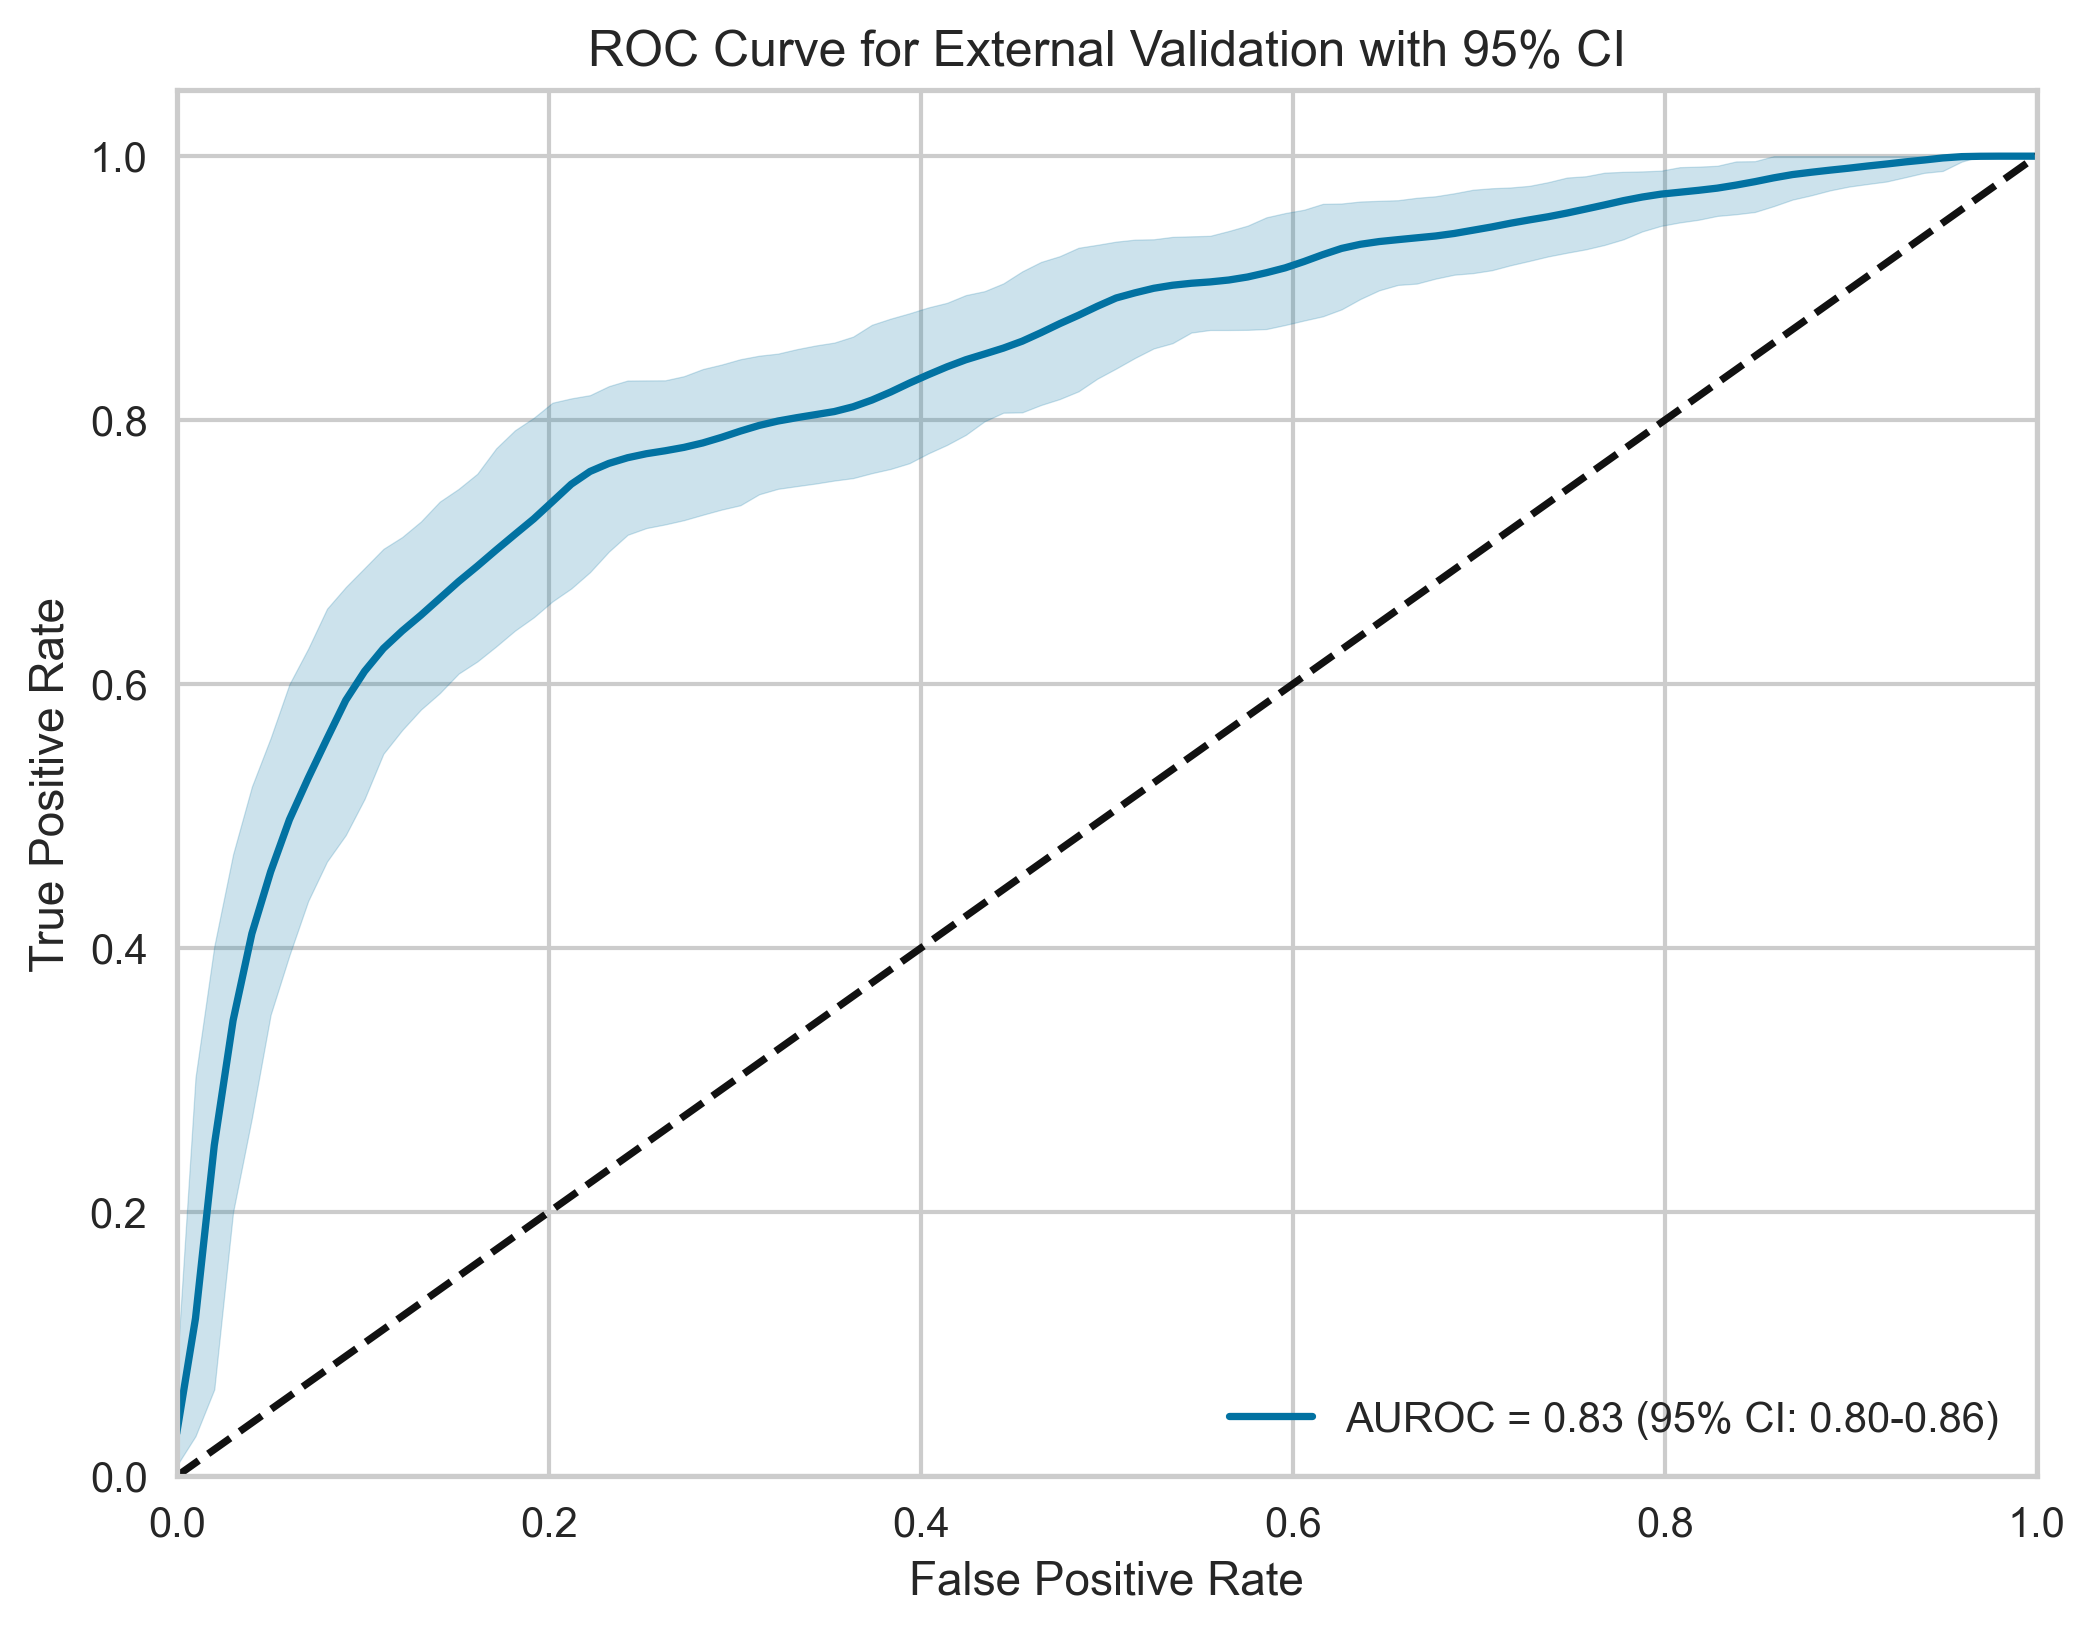

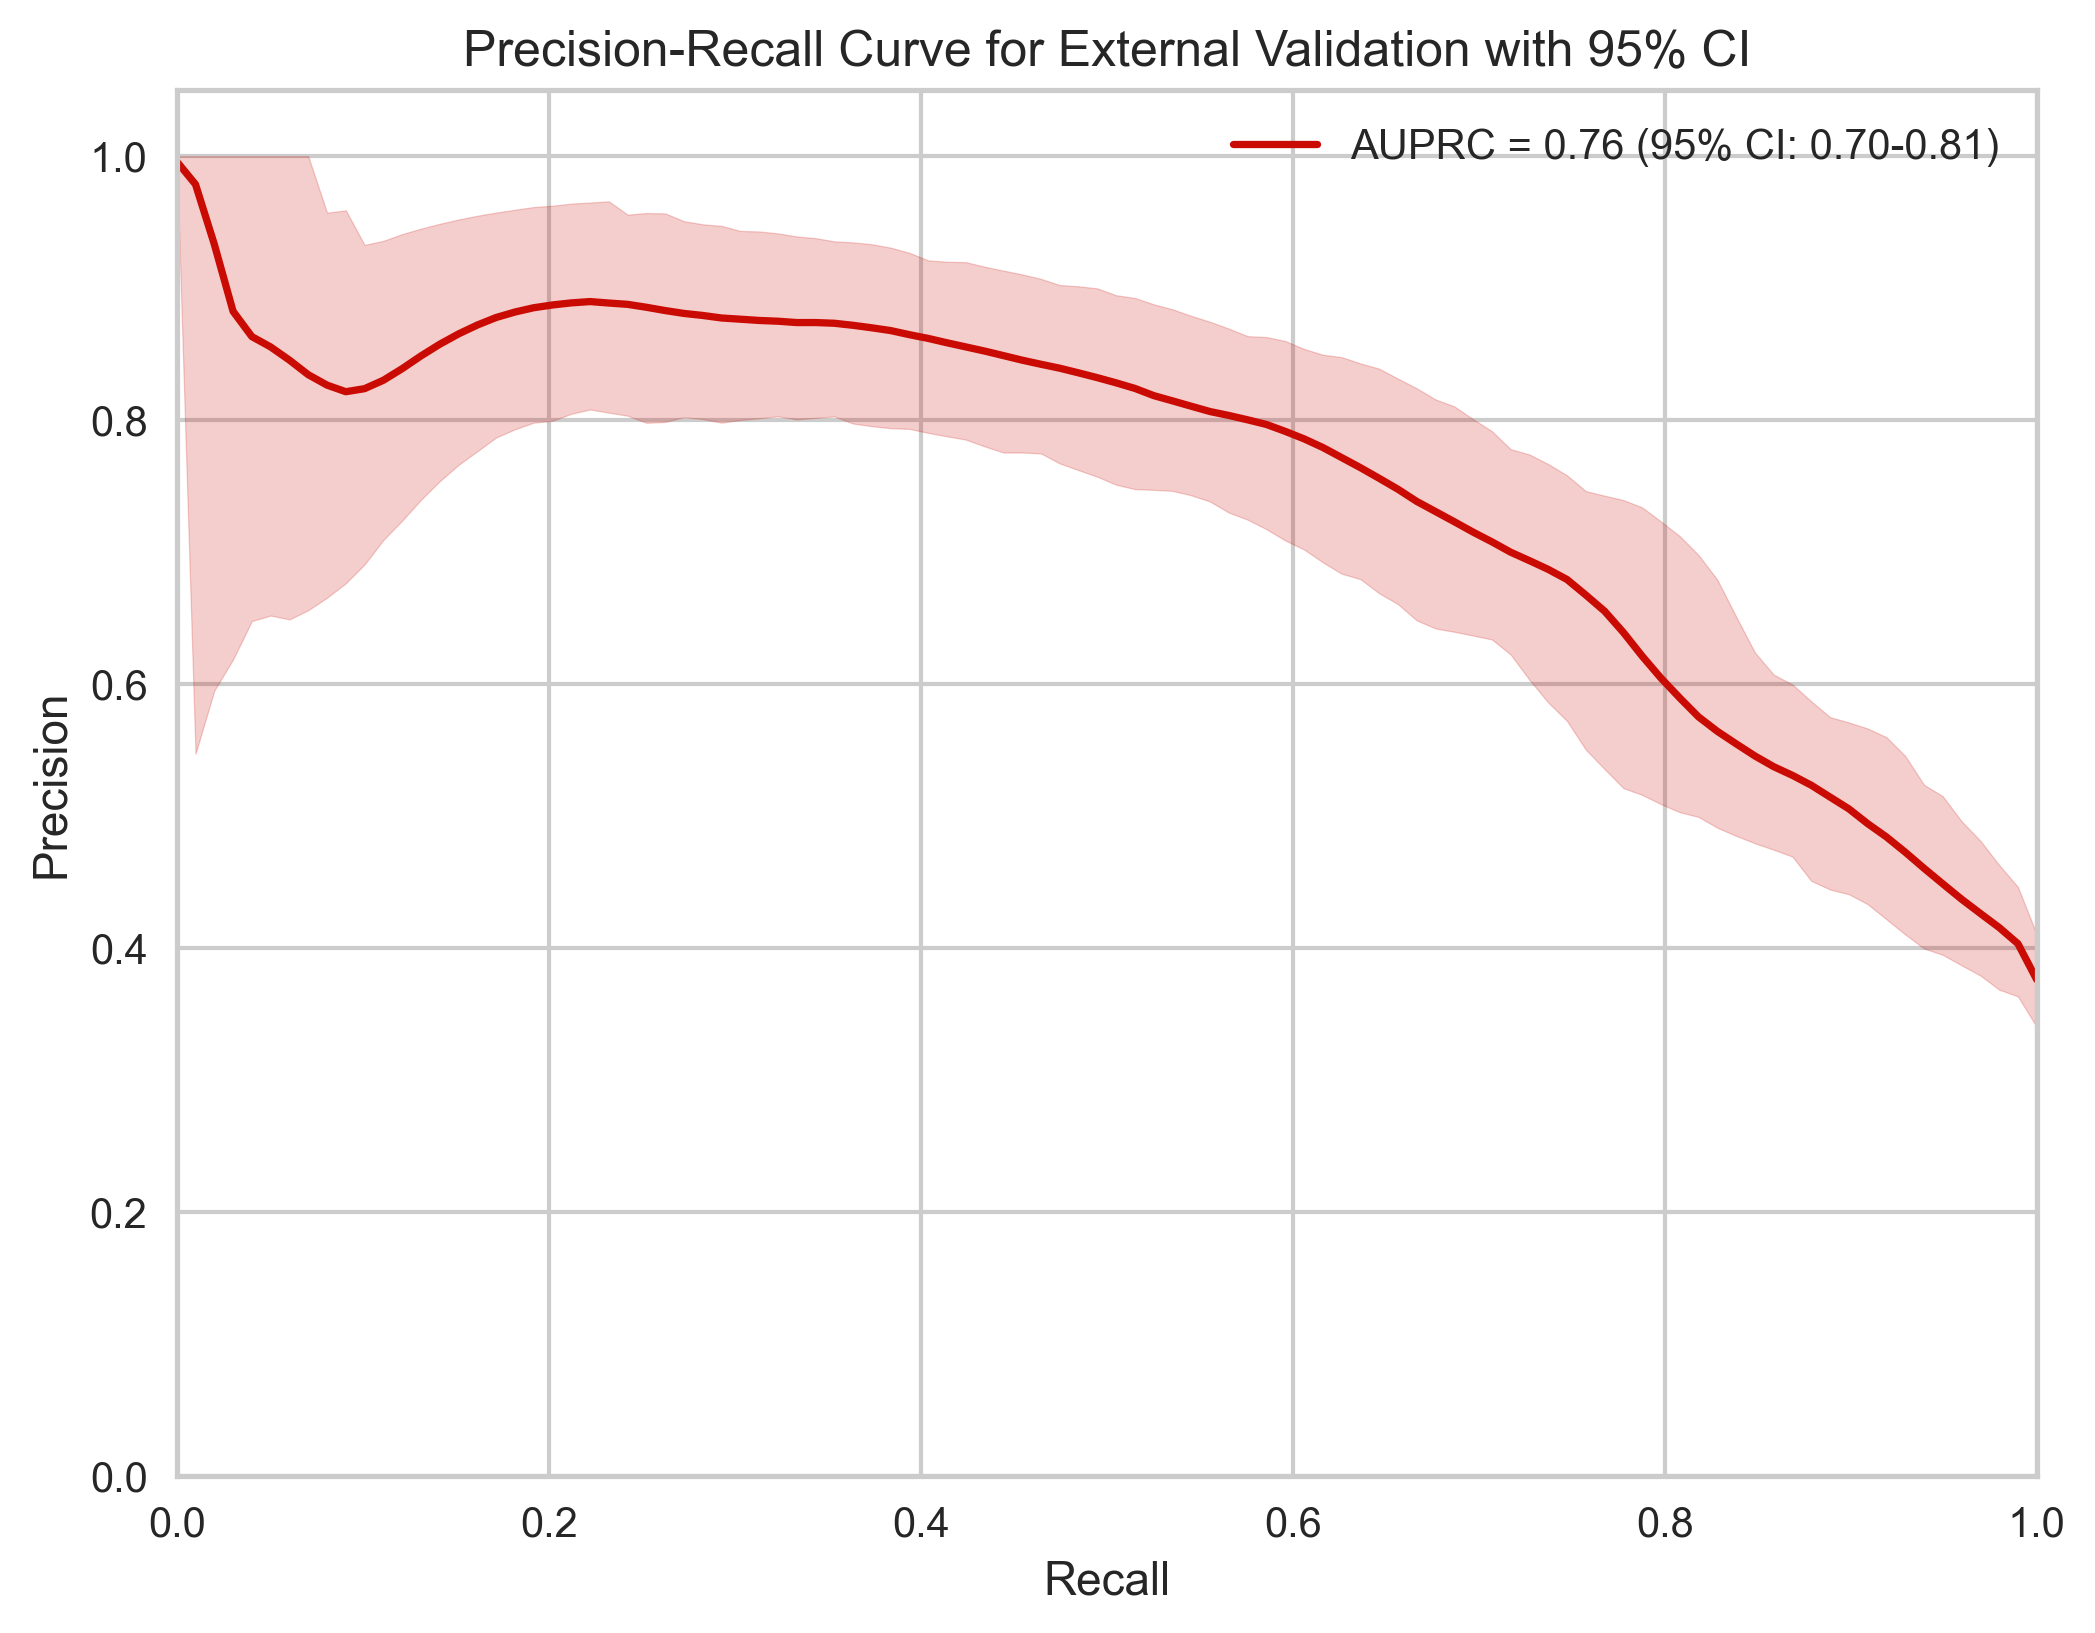

In [48]:
prediction_ex = predict_model(model, data=ex_data)
prediction_ex.loc[prediction_ex["prediction_label"] == 0, 'prediction_score'] = 1 - prediction_ex[prediction_ex["prediction_label"] == 0]["prediction_score"]
y_true_ex = prediction_ex['cam'].values
y_score_ex = prediction_ex['prediction_score'].values
# Bootstrap for ex_data
n_boot = 1000
alpha = 0.05
fpr_grid = np.linspace(0, 1, 100)
recall_grid = np.linspace(0, 1, 100)
boot_tprs_ex = np.zeros((n_boot, len(fpr_grid)))
boot_precisions_ex = np.zeros((n_boot, len(recall_grid)))
boot_aurocs_ex = np.zeros(n_boot)
boot_auprcs_ex = np.zeros(n_boot)
for i in range(n_boot):
    boot_idx = resample(np.arange(len(y_true_ex)), replace=True, n_samples=len(y_true_ex), random_state=i)
    boot_y_true = y_true_ex[boot_idx]
    boot_y_score = y_score_ex[boot_idx]
    boot_aurocs_ex[i] = roc_auc_score(boot_y_true, boot_y_score)
    fpr, tpr, _ = roc_curve(boot_y_true, boot_y_score)
    boot_tprs_ex[i] = np.interp(fpr_grid, fpr, tpr)
    boot_auprcs_ex[i] = average_precision_score(boot_y_true, boot_y_score)
    precision, recall, _ = precision_recall_curve(boot_y_true, boot_y_score)
    boot_precisions_ex[i] = np.interp(recall_grid, recall[::-1], precision[::-1])
orig_auroc_ex = roc_auc_score(y_true_ex, y_score_ex)
orig_fpr_ex, orig_tpr_ex, _ = roc_curve(y_true_ex, y_score_ex)
orig_auprc_ex = average_precision_score(y_true_ex, y_score_ex)
orig_precision_ex, orig_recall_ex, _ = precision_recall_curve(y_true_ex, y_score_ex)
tpr_lower_ex = np.percentile(boot_tprs_ex, 100 * alpha / 2, axis=0)
tpr_upper_ex = np.percentile(boot_tprs_ex, 100 * (1 - alpha / 2), axis=0)
precision_lower_ex = np.percentile(boot_precisions_ex, 100 * alpha / 2, axis=0)
precision_upper_ex = np.percentile(boot_precisions_ex, 100 * (1 - alpha / 2), axis=0)
auroc_low_ex = np.percentile(boot_aurocs_ex, 100 * alpha / 2)
auroc_high_ex = np.percentile(boot_aurocs_ex, 100 * (1 - alpha / 2))
auprc_low_ex = np.percentile(boot_auprcs_ex, 100 * alpha / 2)
auprc_high_ex = np.percentile(boot_auprcs_ex, 100 * (1 - alpha / 2))
# ROC plot for ex_data
plt.figure(figsize=(8, 6))
plt.plot(fpr_grid, np.mean(boot_tprs_ex, axis=0), color='b', label=f'AUROC = {orig_auroc_ex:.2f} (95% CI: {auroc_low_ex:.2f}-{auroc_high_ex:.2f})')
plt.fill_between(fpr_grid, tpr_lower_ex, tpr_upper_ex, color='b', alpha=0.2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for External Validation with 95% CI')
plt.legend(loc='lower right')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.gcf().set_dpi(300)
plt.savefig('roc_ex_with_ci.png')
plt.show()
# PR plot for ex_data
plt.figure(figsize=(8, 6))
plt.plot(recall_grid, np.mean(boot_precisions_ex, axis=0), color='r', label=f'AUPRC = {orig_auprc_ex:.2f} (95% CI: {auprc_low_ex:.2f}-{auprc_high_ex:.2f})')
plt.fill_between(recall_grid, precision_lower_ex, precision_upper_ex, color='r', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for External Validation with 95% CI')
plt.legend(loc='upper right')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.gcf().set_dpi(300)
plt.savefig('pr_ex_with_ci.png')
plt.show()

# Optimize window

OPTIMAL PREDICTIVE WINDOW DURATION ANALYSIS


EVALUATING 1H WINDOW

Preparing 1-hour window data...
  - Using: event 직전 1시간 (win3)
  - Final shape: (5479, 20)
  - CAM distribution: {1: 3099, 0: 2380}

  Train patients: 649 (79.9%)
  Test patients: 163 (20.1%)
  Train samples: 5057 (CAM+: 2987)
  Test samples: 364 (CAM+: 91)

Training model for 1H window...

Setting up PyCaret environment...

Creating and training RF model...

Cross-Validation Results:
         AUC  Recall   Prec.      F1  Accuracy
Fold                                          
0     0.6185  0.5641  0.6322  0.5962    0.5791
1     0.6910  0.7081  0.7014  0.7048    0.6497
2     0.6462  0.6316  0.7129  0.6698    0.5989
3     0.6975  0.6294  0.6703  0.6492    0.6215
4     0.6784  0.7033  0.7723  0.7362    0.6497
5     0.7305  0.6635  0.7955  0.7235    0.6977
6     0.7177  0.6502  0.7500  0.6966    0.6751
7     0.6451  0.4420  0.6612  0.5298    0.5989
8     0.7093  0.8197  0.7346  0.7748    0.6864
9     0.6492  0.4920  0.661


RESULTS for 1H window:
Cross-Validation (Mean ± Std):
 AUC: 0.6247 ± 0.1887
 Recall: 0.5865
 Precision: 0.6544

Test Set Performance:
 AUROC: 0.6616
 AUPRC: 0.3873
 Sensitivity: 0.4945
 Specificity: 0.7692
 PPV: 0.4167
 NPV: 0.8203
 Optimal Threshold: 0.5331
Transformation Pipeline and Model Successfully Saved

Model saved: ./model/rf_1h_window.pkl


EVALUATING 2H WINDOW

Preparing 2-hour window data...
  - Using: event 직전 2시간 (win2, win3의 median)
  - Final shape: (5479, 20)
  - CAM distribution: {1: 3099, 0: 2380}

  Train patients: 649 (79.9%)
  Test patients: 163 (20.1%)
  Train samples: 5056 (CAM+: 2983)
  Test samples: 384 (CAM+: 103)

Training model for 2H window...

Setting up PyCaret environment...

Creating and training RF model...

Cross-Validation Results:
         AUC  Recall   Prec.      F1  Accuracy
Fold                                          
0     0.6946  0.6709  0.8071  0.7327    0.6723
1     0.5918  0.4545  0.6993  0.5510    0.5395
2     0.6671  0.6244  0.6995  0.6


RESULTS for 2H window:
Cross-Validation (Mean ± Std):
 AUC: 0.6259 ± 0.1872
 Recall: 0.5654
 Precision: 0.6725

Test Set Performance:
 AUROC: 0.7188
 AUPRC: 0.5718
 Sensitivity: 0.6311
 Specificity: 0.7829
 PPV: 0.5159
 NPV: 0.8527
 Optimal Threshold: 0.5054
Transformation Pipeline and Model Successfully Saved

Model saved: ./model/rf_2h_window.pkl


EVALUATING 4H WINDOW

Preparing 4-hour window data...
  - Using: 기존 ys_data (이미 4시간치 median 계산됨)
  - Final shape: (5479, 22)
  - CAM distribution: {1: 3099, 0: 2380}

  Train patients: 651 (80.0%)
  Test patients: 163 (20.0%)
  Train samples: 5105 (CAM+: 2997)
  Test samples: 373 (CAM+: 102)

Training model for 4H window...

Setting up PyCaret environment...

Creating and training RF model...

Cross-Validation Results:
         AUC  Recall   Prec.      F1  Accuracy
Fold                                          
0     0.7704  0.6897  0.7735  0.7292    0.7095
1     0.7305  0.7286  0.7083  0.7183    0.6648
2     0.7441  0.6695  0.8041  0.730


RESULTS for 4H window:
Cross-Validation (Mean ± Std):
 AUC: 0.6695 ± 0.2023
 Recall: 0.6452
 Precision: 0.6775

Test Set Performance:
 AUROC: 0.8185
 AUPRC: 0.6565
 Sensitivity: 0.7451
 Specificity: 0.7454
 PPV: 0.5241
 NPV: 0.8860
 Optimal Threshold: 0.4706
Transformation Pipeline and Model Successfully Saved

Model saved: ./model/rf_4h_window.pkl

SUMMARY: Window Duration Comparison

Test Set Performance:
window_type  test_auroc  test_auprc  test_sensitivity  test_specificity  test_ppv
         4h    0.818483    0.656528          0.745098          0.745387  0.524138
         2h    0.718844    0.571789          0.631068          0.782918  0.515873
         1h    0.661635    0.387302          0.494505          0.769231  0.416667

Cross-Validation Performance:
window_type  cv_mean_auc  cv_std_auc  cv_mean_recall  cv_mean_precision
         4h     0.669500    0.202263        0.645250           0.677550
         2h     0.625933    0.187206        0.565417           0.672492
         1h  

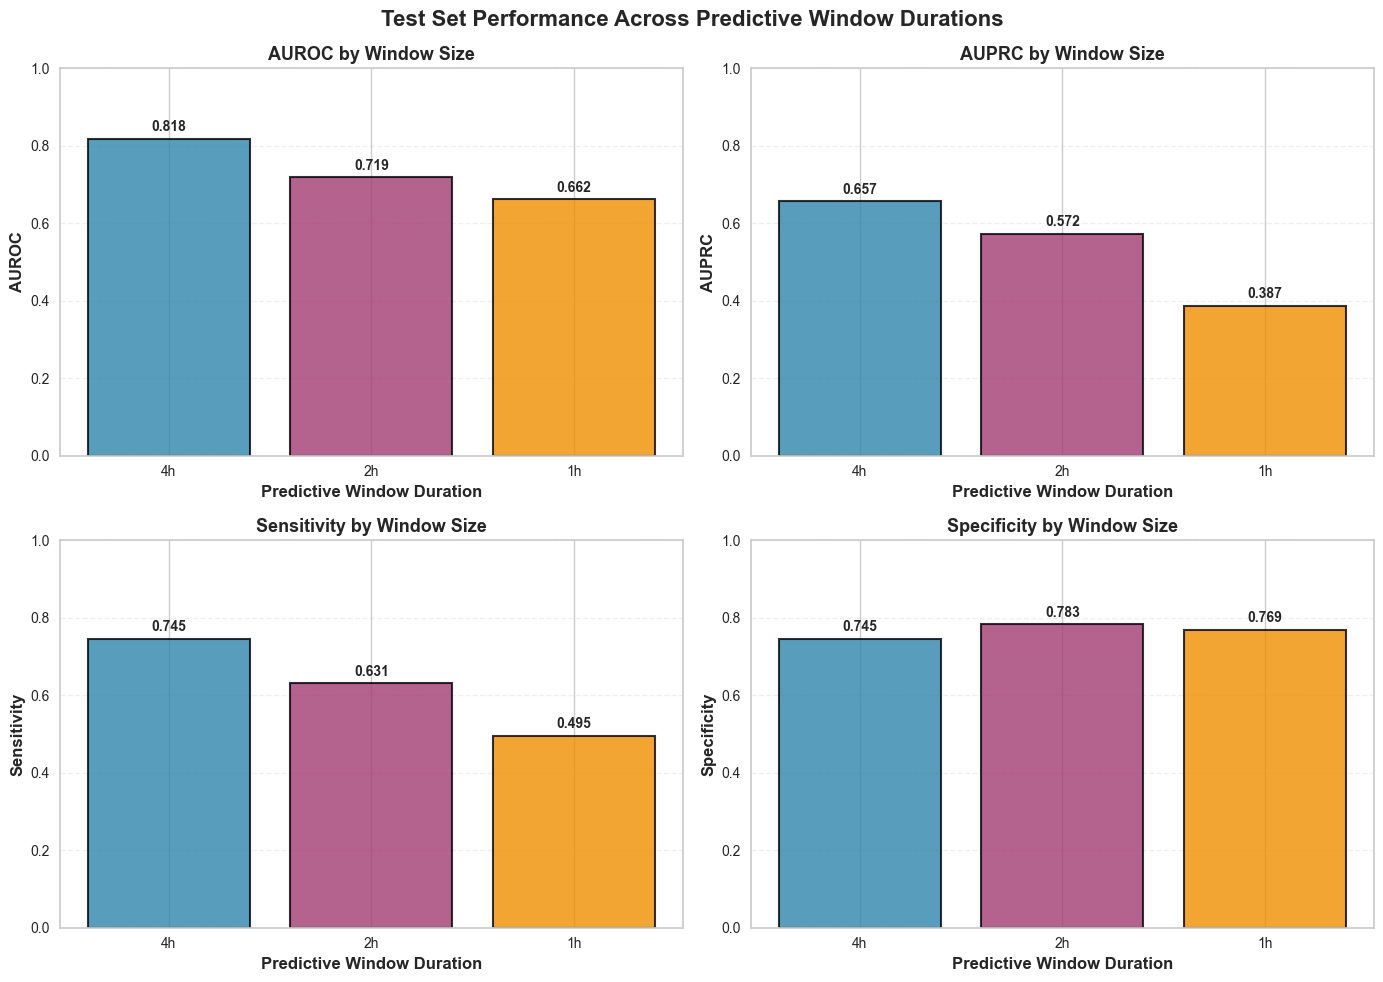

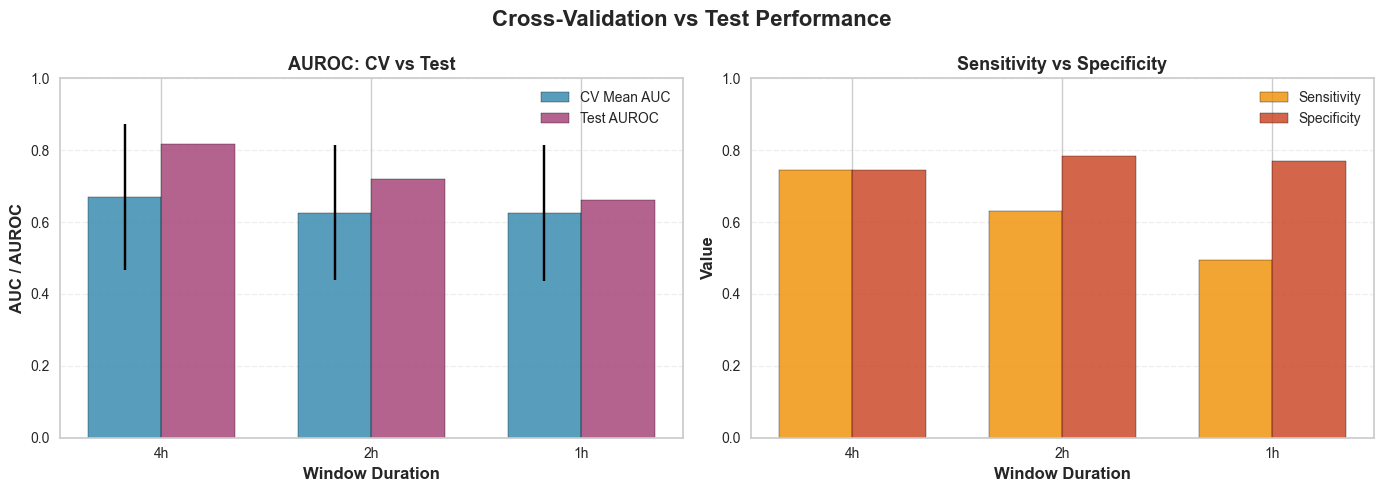


Analysis complete!

Saved files:
  - Models: ./model/rf_1h_window.pkl, rf_2h_window.pkl, rf_4h_window.pkl
  - Summary: window_analysis_summary.csv
  - Figures: window_comparison_test_performance.png
            window_comparison_cv_vs_test.png


In [61]:
import pandas as pd
import numpy as np
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

def prepare_window_data(ys_data, ys_data_copy_2, ys_data_copy_3, window_type='4h'):
    """
    윈도우 크기에 따라 데이터 준비
    
    Parameters:
    -----------
    ys_data : DataFrame
        4시간치 median이 이미 계산된 원본 데이터
    ys_data_copy_2 : DataFrame
        2시간 전 데이터
    ys_data_copy_3 : DataFrame
        1시간 전 데이터
    window_type : str
        '1h': 1시간치 (win3만 사용)
        '2h': 2시간치 median (win2, win3)
        '4h': 4시간치 (ys_data 그대로 사용)
    """
    
    # 기본 컬럼
    base_cols = ['pid', 'cam_time', 'cam', 'sex', 'age']
    
    # Feature 이름
    feature_base_names = [
        'hjorth_activity_II', 'hjorth_complexity_II', 'hjorth_morbidity_II', 
        'kurtosis_II', 'skewness_II',
        'hjorth_activity_Pleth', 'hjorth_complexity_Pleth', 'hjorth_morbidity_Pleth', 
        'kurtosis_Pleth', 'skewness_Pleth',
        'hjorth_activity_Resp', 'hjorth_complexity_Resp', 'hjorth_morbidity_Resp', 
        'kurtosis_Resp', 'skewness_Resp'
    ]
    
    if window_type == '1h':
        # 1시간치: win3만 사용
        print(f"\nPreparing 1-hour window data...")
        print(f"  - Using: event 직전 1시간 (win3)")
        
        df_base = ys_data_copy_3[base_cols].copy()
        feature_cols = [col for col in ys_data_copy_3.columns if col not in base_cols]
        df_features = ys_data_copy_3[feature_cols].copy()
        
        # 컬럼명에서 _win3 제거
        df_features.columns = [col.replace('_win3', '') for col in df_features.columns]
        
        df_final = pd.concat([df_base.reset_index(drop=True), 
                              df_features.reset_index(drop=True)], axis=1)
        
    elif window_type == '2h':
        # 2시간치: win2, win3의 median
        print(f"\nPreparing 2-hour window data...")
        print(f"  - Using: event 직전 2시간 (win2, win3의 median)")
        
        df_base = ys_data_copy_3[base_cols].copy()
        df_features = pd.DataFrame()
        
        for feature_name in feature_base_names:
            col_win2 = f'{feature_name}_win2'
            col_win3 = f'{feature_name}_win3'
            
            # 두 값의 median
            values = pd.DataFrame({
                'w2': ys_data_copy_2[col_win2],
                'w3': ys_data_copy_3[col_win3]
            })
            
            df_features[feature_name] = values.median(axis=1)
        
        df_final = pd.concat([df_base.reset_index(drop=True), 
                              df_features.reset_index(drop=True)], axis=1)
    
    elif window_type == '4h':
        # 4시간치: ys_data 그대로 사용 (이미 계산된 값)
        print(f"\nPreparing 4-hour window data...")
        print(f"  - Using: 기존 ys_data (이미 4시간치 median 계산됨)")
        
        df_final = ys_data.copy()
    
    else:
        raise ValueError("window_type must be '1h', '2h', or '4h'")
    
    print(f"  - Final shape: {df_final.shape}")
    print(f"  - CAM distribution: {df_final['cam'].value_counts().to_dict()}")
    
    return df_final

def split_train_test(data, random_seed=94, train_ratio=0.8):
    """
    환자 레벨로 train/test 분할
    """
    # Outlier 제거 (원래 코드와 동일)
    data = data.query("hjorth_activity_Pleth < 1000")
    
    # 데이터 shuffle
    data = data.sample(frac=1, random_state=random_seed).reset_index(drop=True)
    
    # 환자 ID 기준 분할
    uni_pids = pd.unique(data["pid"])
    n_train = int(len(uni_pids) * train_ratio)
    
    tr_uni_pids = uni_pids[:n_train]
    te_uni_pids = uni_pids[n_train:]
    
    print(f"\n  Train patients: {len(tr_uni_pids)} ({len(tr_uni_pids)/len(uni_pids)*100:.1f}%)")
    print(f"  Test patients: {len(te_uni_pids)} ({len(te_uni_pids)/len(uni_pids)*100:.1f}%)")
    
    # 데이터 분할
    data['tr_yn'] = 0
    data.loc[data.pid.isin(tr_uni_pids), 'tr_yn'] = 1
    
    train_data = data[data["tr_yn"] == 1].iloc[:, :-1].copy()
    test_data = data[data["tr_yn"] == 0].iloc[:, :-1].copy()
    
    train_data = train_data.sort_values(by=['pid']).reset_index(drop=True)
    test_data = test_data.sort_values(by=['pid']).reset_index(drop=True)
    
    print(f"  Train samples: {len(train_data)} (CAM+: {train_data['cam'].sum()})")
    print(f"  Test samples: {len(test_data)} (CAM+: {test_data['cam'].sum()})")
    
    return train_data, test_data

def train_and_evaluate_pycaret(train_data, test_data, window_type, model_type='rf'):
    """
    PyCaret으로 모델 학습 및 평가
    """
   
    print(f"\n{'='*70}")
    print(f"Training model for {window_type.upper()} window...")
    print(f"{'='*70}")
   
    # Fold groups 설정
    fold_groups = train_data['pid']
   
    # PyCaret setup
    print("\nSetting up PyCaret environment...")
    setup_clf = setup(
        data=train_data,
        target='cam',
        use_gpu=False,
        data_split_shuffle=True,
        memory=False,
        fold_strategy='groupkfold',
        fold_groups=fold_groups,
        ignore_features=['pid', 'cam_time'],
        n_jobs=1,
        session_id=8709,
        verbose=False,
    )
   
    # 모델 생성 및 학습
    print(f"\nCreating and training {model_type.upper()} model...")
   
    if model_type == 'rf':
        base_model = create_model('rf', verbose=False)
        # Add tuning to match original
        tuned_model = tune_model(base_model, n_iter=20, early_stopping=True, optimize='Precision', verbose=False)
        model = tuned_model  # Use tuned for finalization
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
   
    # CV 결과 (from tuned model)
    cv_results = pull()
    print(f"\nCross-Validation Results:")
    print(cv_results[['AUC', 'Recall', 'Prec.', 'F1', 'Accuracy']])
   
    # 최종 모델 finalize
    print("\nFinalizing model on entire training set...")
    final_model = finalize_model(model)
   
    # Test set에 대한 예측
    print("\nEvaluating on test set...")
    predictions = predict_model(final_model, data=test_data)
   
    # ===== 중요: prediction_score 수정 =====
    # prediction_label이 0인 경우, score를 1-score로 변환 (positive class 확률로 통일)
    predictions.loc[predictions["prediction_label"] == 0, 'prediction_score'] = \
        1 - predictions[predictions["prediction_label"] == 0]["prediction_score"]
   
    # Test set 성능 계산
    y_true = predictions['cam']
    y_pred_proba = predictions['prediction_score']
   
    # Metrics 계산
    auroc = roc_auc_score(y_true, y_pred_proba)
    auprc = average_precision_score(y_true, y_pred_proba)
   
    # 최적 threshold
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
   
    # Binary prediction
    y_pred_binary = (y_pred_proba >= optimal_threshold).astype(int)
   
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
   
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
   
    # 결과 저장
    results = {
        'window_type': window_type,
        'cv_mean_auc': cv_results['AUC'].mean(),
        'cv_std_auc': cv_results['AUC'].std(),
        'cv_mean_recall': cv_results['Recall'].mean(),
        'cv_mean_precision': cv_results['Prec.'].mean(),
        'test_auroc': auroc,
        'test_auprc': auprc,
        'test_sensitivity': sensitivity,
        'test_specificity': specificity,
        'test_ppv': ppv,
        'test_npv': npv,
        'optimal_threshold': optimal_threshold
    }
   
    # 결과 출력
    print(f"\n{'='*70}")
    print(f"RESULTS for {window_type.upper()} window:")
    print(f"{'='*70}")
    print(f"Cross-Validation (Mean ± Std):")
    print(f" AUC: {results['cv_mean_auc']:.4f} ± {results['cv_std_auc']:.4f}")
    print(f" Recall: {results['cv_mean_recall']:.4f}")
    print(f" Precision: {results['cv_mean_precision']:.4f}")
    print(f"\nTest Set Performance:")
    print(f" AUROC: {results['test_auroc']:.4f}")
    print(f" AUPRC: {results['test_auprc']:.4f}")
    print(f" Sensitivity: {results['test_sensitivity']:.4f}")
    print(f" Specificity: {results['test_specificity']:.4f}")
    print(f" PPV: {results['test_ppv']:.4f}")
    print(f" NPV: {results['test_npv']:.4f}")
    print(f" Optimal Threshold: {results['optimal_threshold']:.4f}")
   
    # 모델 저장
    model_filename = f'./model/rf_{window_type}_window'
    save_model(final_model, model_filename)
    print(f"\nModel saved: {model_filename}.pkl")
   
    return results, final_model, predictions

def compare_window_sizes(ys_data, ys_data_copy_2, ys_data_copy_3, random_seed=94):
    """
    1시간, 2시간, 4시간 윈도우 크기 비교
    
    Parameters:
    -----------
    ys_data : DataFrame
        4시간치 median이 이미 계산된 원본 데이터
    ys_data_copy_2 : DataFrame
        2시간 전 데이터 (win2)
    ys_data_copy_3 : DataFrame
        1시간 전 데이터 (win3)
    """
    
    window_types = ['1h', '2h', '4h']
    all_results = []
    all_models = {}
    all_predictions = {}
    
    print("="*80)
    print("OPTIMAL PREDICTIVE WINDOW DURATION ANALYSIS")
    print("="*80)
    
    for window_type in window_types:
        print(f"\n\n{'='*80}")
        print(f"EVALUATING {window_type.upper()} WINDOW")
        print(f"{'='*80}")
        
        # 1. 데이터 준비
        data = prepare_window_data(
            ys_data, ys_data_copy_2, ys_data_copy_3, 
            window_type=window_type
        )
        
        # 2. Train/Test Split
        train_data, test_data = split_train_test(data, random_seed=random_seed)
        
        # 3. 모델 학습 및 평가
        results, model, predictions = train_and_evaluate_pycaret(
            train_data, test_data, window_type
        )
        
        # 4. 결과 저장
        all_results.append(results)
        all_models[window_type] = model
        all_predictions[window_type] = predictions
    
    return all_results, all_models, all_predictions

def visualize_results(all_results, save_prefix='window_comparison'):
    """
    결과 시각화
    """
    
    # DataFrame으로 변환
    df_results = pd.DataFrame(all_results)
    df_results = df_results.sort_values('test_auroc', ascending=False)
    
    print("\n" + "="*80)
    print("SUMMARY: Window Duration Comparison")
    print("="*80)
    print("\nTest Set Performance:")
    print(df_results[['window_type', 'test_auroc', 'test_auprc', 
                      'test_sensitivity', 'test_specificity', 'test_ppv']].to_string(index=False))
    
    print("\nCross-Validation Performance:")
    print(df_results[['window_type', 'cv_mean_auc', 'cv_std_auc', 
                      'cv_mean_recall', 'cv_mean_precision']].to_string(index=False))
    
    # 최적 윈도우
    best_window = df_results.iloc[0]['window_type']
    best_auroc = df_results.iloc[0]['test_auroc']
    best_auprc = df_results.iloc[0]['test_auprc']
    
    print("\n" + "="*80)
    print(f"OPTIMAL WINDOW: {best_window.upper()}")
    print(f"  - Test AUROC: {best_auroc:.4f}")
    print(f"  - Test AUPRC: {best_auprc:.4f}")
    print("="*80)
    
    # 시각화 1: Test Set Performance
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Test Set Performance Across Predictive Window Durations', 
                 fontsize=16, fontweight='bold')
    
    metrics = [
        ('test_auroc', 'AUROC'),
        ('test_auprc', 'AUPRC'),
        ('test_sensitivity', 'Sensitivity'),
        ('test_specificity', 'Specificity')
    ]
    
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    for idx, (ax, (metric_key, metric_name)) in enumerate(zip(axes.flat, metrics)):
        x = range(len(df_results))
        y = df_results[metric_key]
        
        bars = ax.bar(x, y, color=colors[:len(df_results)], 
                     alpha=0.8, edgecolor='black', linewidth=1.5)
        
        ax.set_xticks(x)
        ax.set_xticklabels(df_results['window_type'])
        ax.set_xlabel('Predictive Window Duration', fontsize=12, fontweight='bold')
        ax.set_ylabel(metric_name, fontsize=12, fontweight='bold')
        ax.set_title(f'{metric_name} by Window Size', fontsize=13, fontweight='bold')
        ax.set_ylim([0, 1])
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        
        # 값 표시
        for i, v in enumerate(y):
            ax.text(i, v + 0.02, f'{v:.3f}', 
                   ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(f'{save_prefix}_test_performance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 시각화 2: CV vs Test Performance
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('Cross-Validation vs Test Performance', 
                 fontsize=16, fontweight='bold')
    
    # AUROC 비교
    ax = axes[0]
    x = range(len(df_results))
    width = 0.35
    
    ax.bar([i - width/2 for i in x], df_results['cv_mean_auc'], 
           width, label='CV Mean AUC', color='#2E86AB', alpha=0.8, edgecolor='black')
    ax.bar([i + width/2 for i in x], df_results['test_auroc'], 
           width, label='Test AUROC', color='#A23B72', alpha=0.8, edgecolor='black')
    
    # Error bars for CV
    ax.errorbar([i - width/2 for i in x], df_results['cv_mean_auc'], 
                yerr=df_results['cv_std_auc'], fmt='none', color='black', capsize=5)
    
    ax.set_xticks(x)
    ax.set_xticklabels(df_results['window_type'])
    ax.set_xlabel('Window Duration', fontsize=12, fontweight='bold')
    ax.set_ylabel('AUC / AUROC', fontsize=12, fontweight='bold')
    ax.set_title('AUROC: CV vs Test', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 1])
    
    # Sensitivity vs Specificity
    ax = axes[1]
    ax.bar([i - width/2 for i in x], df_results['test_sensitivity'], 
           width, label='Sensitivity', color='#F18F01', alpha=0.8, edgecolor='black')
    ax.bar([i + width/2 for i in x], df_results['test_specificity'], 
           width, label='Specificity', color='#C73E1D', alpha=0.8, edgecolor='black')
    
    ax.set_xticks(x)
    ax.set_xticklabels(df_results['window_type'])
    ax.set_xlabel('Window Duration', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax.set_title('Sensitivity vs Specificity', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 1])
    
    plt.tight_layout()
    plt.savefig(f'{save_prefix}_cv_vs_test.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return df_results

if __name__ == "__main__":
    
    # 설정
    random_seed = 94
    
    # 윈도우 크기 비교 실행
    all_results, all_models, all_predictions = compare_window_sizes(
        ys_data,           # 4시간치 (이미 계산된 값)
        ys_data_copy_2,    # 2시간 전
        ys_data_copy_3,    # 1시간 전
        random_seed=random_seed
    )
    
    # 결과 시각화 및 요약
    df_summary = visualize_results(all_results, save_prefix='window_comparison')
    
    # 결과 저장
    df_summary.to_csv('window_analysis_summary.csv', index=False)
    
    print("\n" + "="*80)
    print("Analysis complete!")
    print("="*80)
    print("\nSaved files:")
    print("  - Models: ./model/rf_1h_window.pkl, rf_2h_window.pkl, rf_4h_window.pkl")
    print("  - Summary: window_analysis_summary.csv")
    print("  - Figures: window_comparison_test_performance.png")
    print("            window_comparison_cv_vs_test.png")

# Early prediction

In [75]:
ys_data['cam_time'] = pd.to_datetime(ys_data['cam_time'])

for pid in ys_data['pid'].unique():
    patient_data = ys_data[ys_data['pid'] == pid]
    times = patient_data['cam_time']
    cams = patient_data['cam']
    
    for i in range(len(times) - 1):
        current_time = times.iloc[i]
        next_times = times.iloc[i+1:]
        time_diffs = (next_times - current_time).dt.total_seconds() / 3600  # in hours
        
        if len(time_diffs) == 0:
            continue
        
        # Find closest to 8h (within tolerance, e.g., 7-9h)
        close_idx = np.argmin(np.abs(time_diffs - 8))
        if 7 <= time_diffs.iloc[close_idx] <= 9:  # Tolerance for ~8h
            ys_data.loc[patient_data.index[i], 'future_cam'] = cams.iloc[i+1 + close_idx]
            ys_data.loc[patient_data.index[i], 'next_time'] = times.iloc[i+1 + close_idx]

# Filter valid pairs (where future_cam is not NaN)
early_data = ys_data.dropna(subset=['future_cam']).copy()

# Outlier filter
early_data = early_data.query("hjorth_activity_Pleth < 1000")

In [80]:
model = load_model('./model/rf_tuned')

Transformation Pipeline and Model Successfully Loaded


### without train

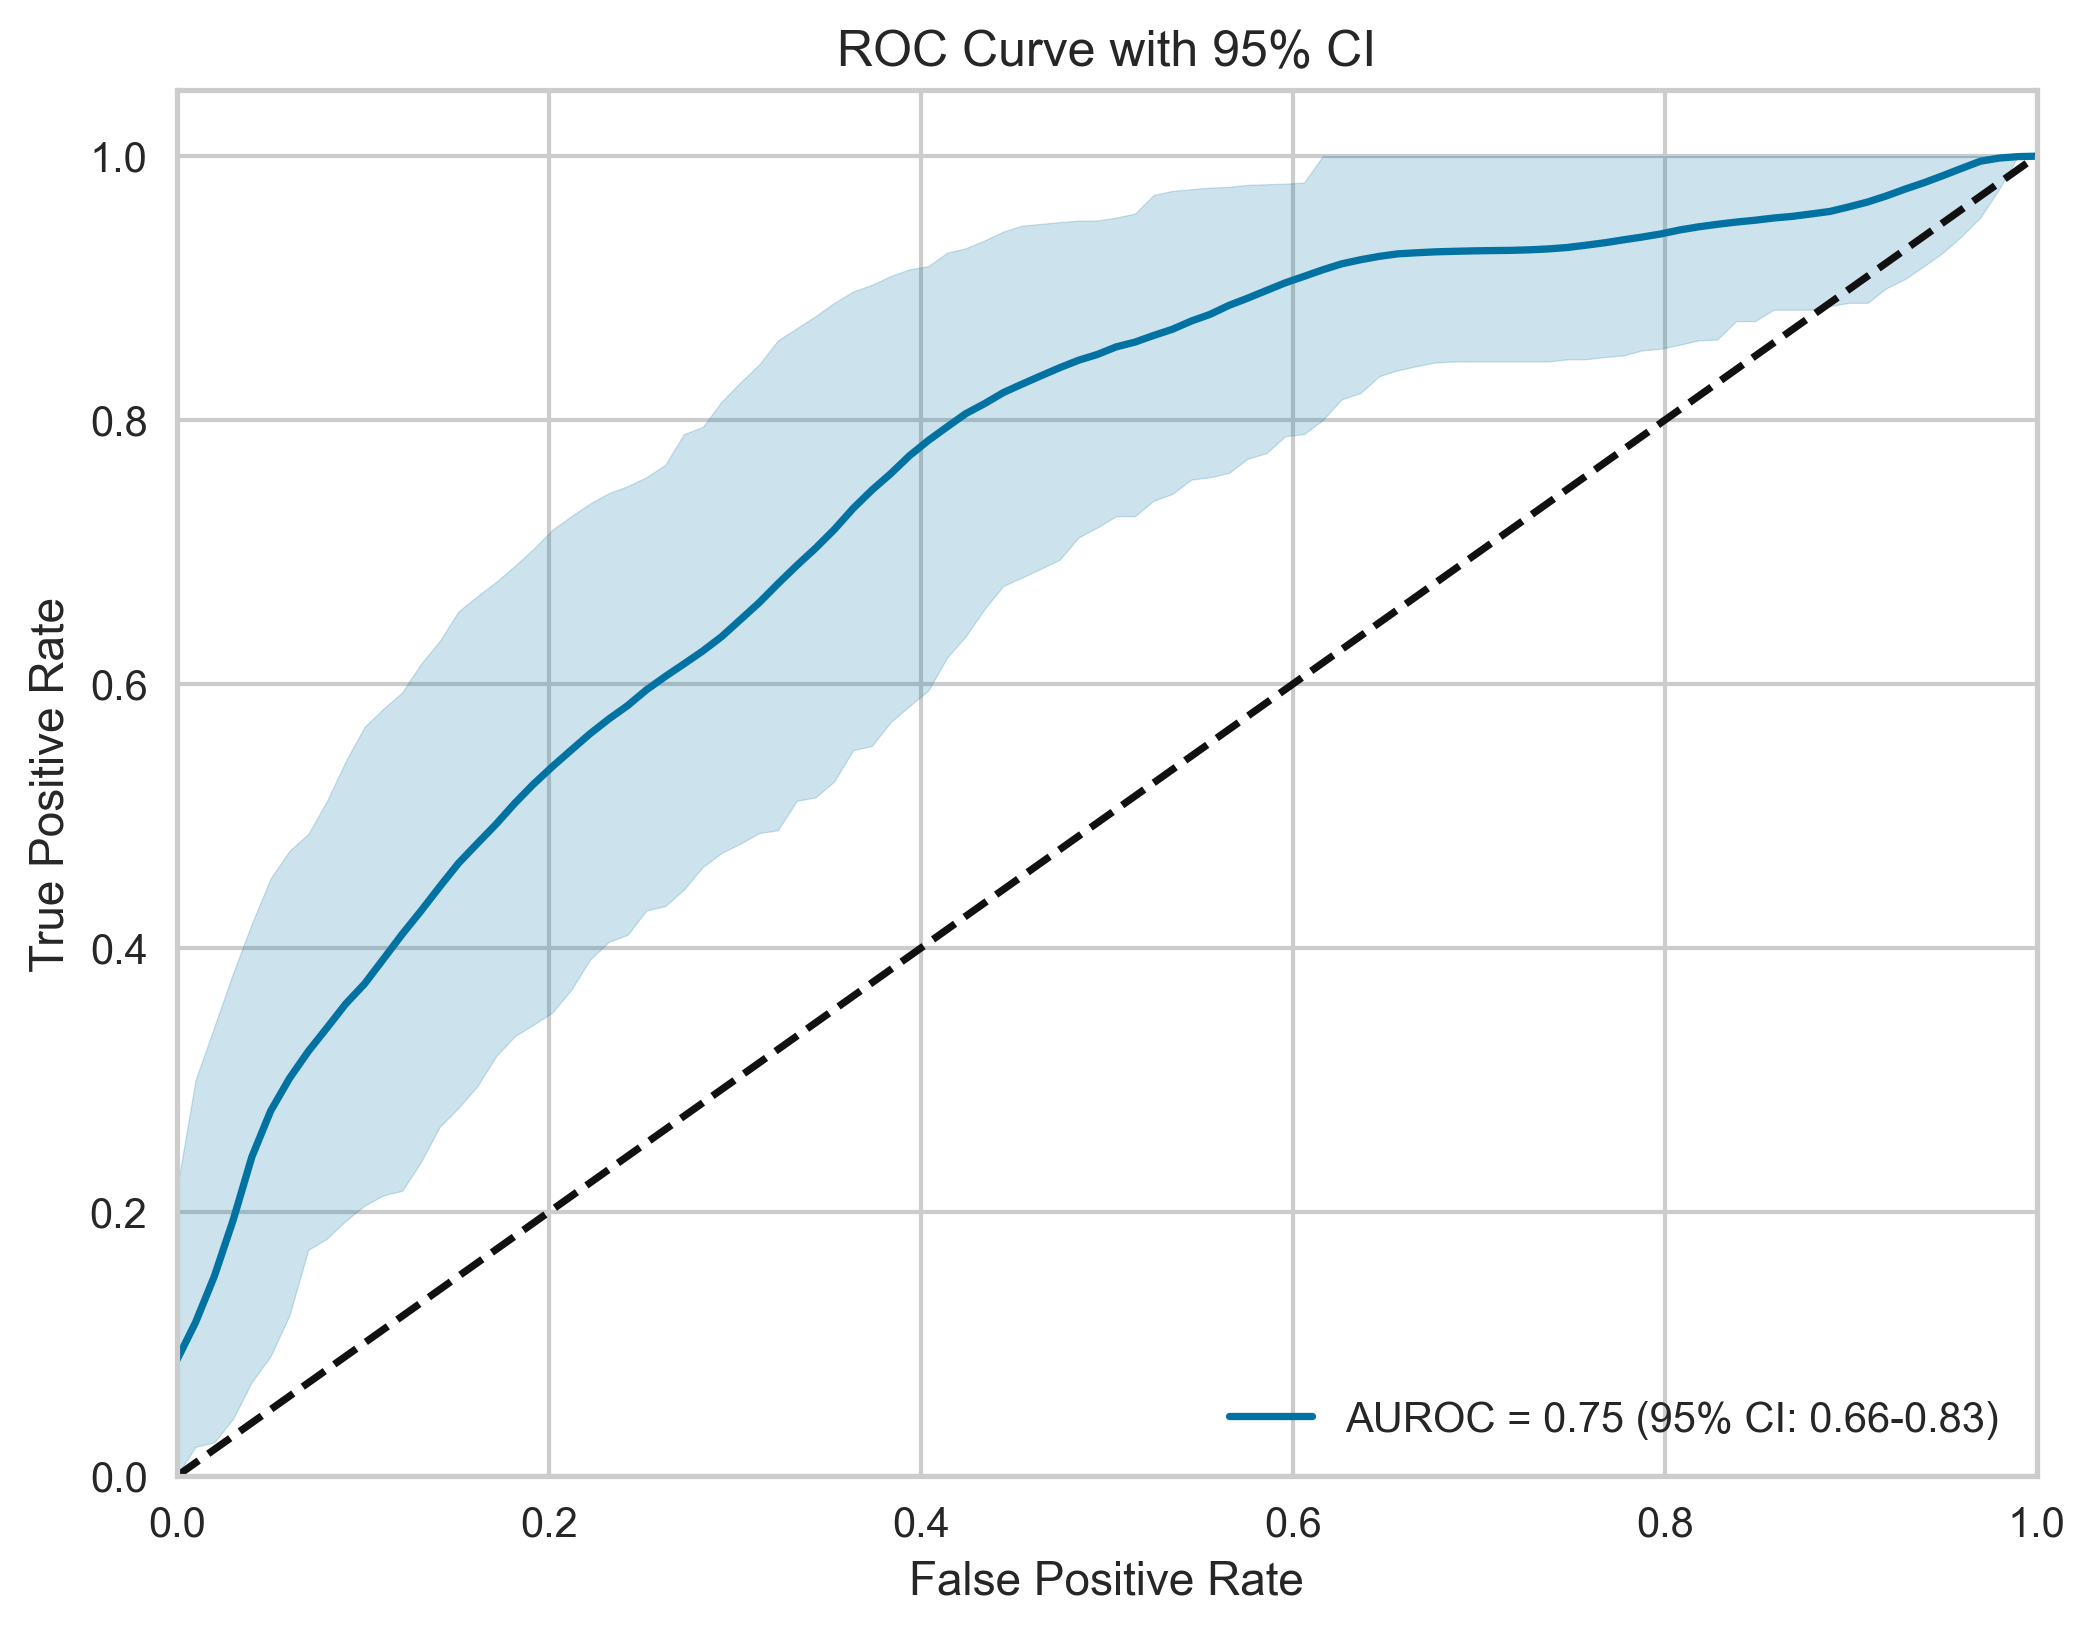

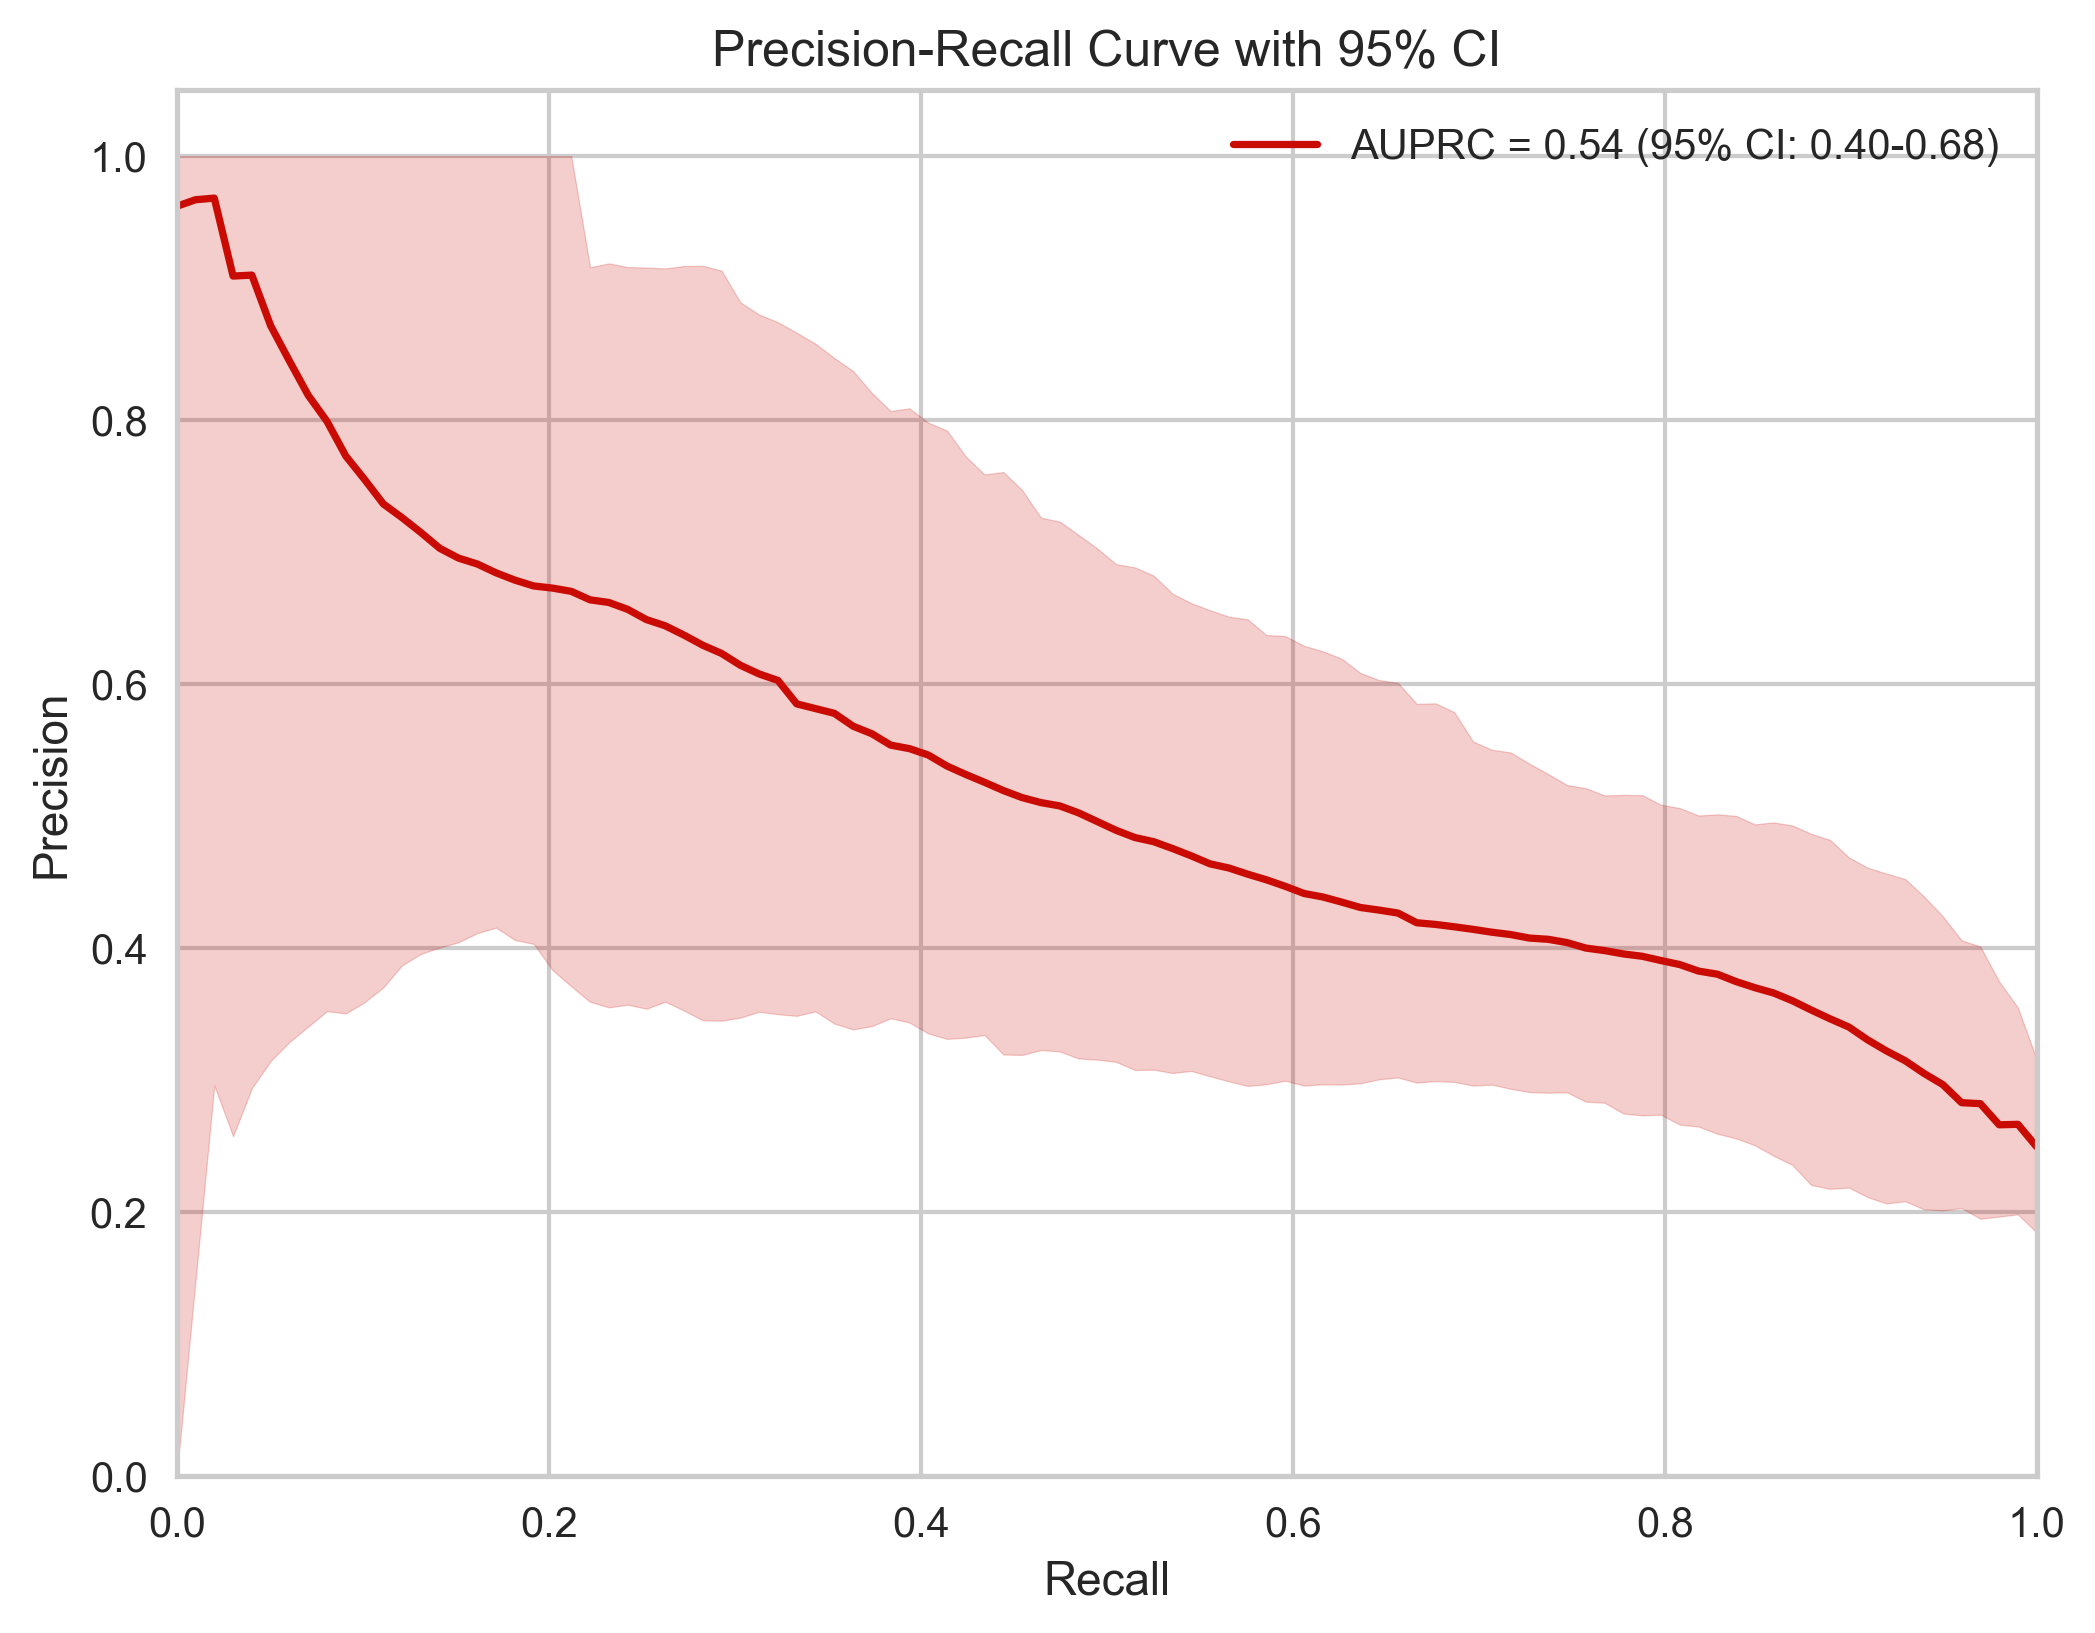

In [81]:
prediction = predict_model(model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
y_true = prediction['future_cam'].values
y_score = prediction['prediction_score'].values

# Bootstrap 설정
n_boot = 1000
alpha = 0.05  # 95% CI

# ROC 및 PR 곡선용 고정 그리드
fpr_grid = np.linspace(0, 1, 100)
recall_grid = np.linspace(0, 1, 100)

# Bootstrap 배열 초기화
boot_tprs = np.zeros((n_boot, len(fpr_grid)))
boot_precisions = np.zeros((n_boot, len(recall_grid)))
boot_aurocs = np.zeros(n_boot)
boot_auprcs = np.zeros(n_boot)

# Bootstrap 루프
for i in range(n_boot):
    # Resample test data with replacement
    boot_idx = resample(np.arange(len(y_true)), replace=True, n_samples=len(y_true), random_state=i)
    boot_y_true = y_true[boot_idx]
    boot_y_score = y_score[boot_idx]
    
    # AUROC & ROC
    boot_aurocs[i] = roc_auc_score(boot_y_true, boot_y_score)
    fpr, tpr, _ = roc_curve(boot_y_true, boot_y_score)
    boot_tprs[i] = np.interp(fpr_grid, fpr, tpr)  # fpr_grid에 대한 tpr 보간
    
    # AUPRC & PR
    boot_auprcs[i] = average_precision_score(boot_y_true, boot_y_score)
    precision, recall, _ = precision_recall_curve(boot_y_true, boot_y_score)
    boot_precisions[i] = np.interp(recall_grid, recall[::-1], precision[::-1])  # recall 내림차순이므로 반전

# 원본 곡선 계산 (mean curve)
orig_auroc = roc_auc_score(y_true, y_score)
orig_fpr, orig_tpr, _ = roc_curve(y_true, y_score)
orig_auprc = average_precision_score(y_true, y_score)
orig_precision, orig_recall, _ = precision_recall_curve(y_true, y_score)

# CI 계산 (percentiles)
tpr_lower = np.percentile(boot_tprs, 100 * alpha / 2, axis=0)
tpr_upper = np.percentile(boot_tprs, 100 * (1 - alpha / 2), axis=0)
precision_lower = np.percentile(boot_precisions, 100 * alpha / 2, axis=0)
precision_upper = np.percentile(boot_precisions, 100 * (1 - alpha / 2), axis=0)
auroc_low = np.percentile(boot_aurocs, 100 * alpha / 2)
auroc_high = np.percentile(boot_aurocs, 100 * (1 - alpha / 2))
auprc_low = np.percentile(boot_auprcs, 100 * alpha / 2)
auprc_high = np.percentile(boot_auprcs, 100 * (1 - alpha / 2))

# ROC 플롯
plt.figure(figsize=(8, 6))
plt.plot(fpr_grid, np.mean(boot_tprs, axis=0), color='b', label=f'AUROC = {orig_auroc:.2f} (95% CI: {auroc_low:.2f}-{auroc_high:.2f})')
plt.fill_between(fpr_grid, tpr_lower, tpr_upper, color='b', alpha=0.2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 95% CI')
plt.legend(loc='lower right')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.gcf().set_dpi(300)
plt.savefig('roc_with_ci.png')
plt.show()

# PR 플롯
plt.figure(figsize=(8, 6))
plt.plot(recall_grid, np.mean(boot_precisions, axis=0), color='r', label=f'AUPRC = {orig_auprc:.2f} (95% CI: {auprc_low:.2f}-{auprc_high:.2f})')
plt.fill_between(recall_grid, precision_lower, precision_upper, color='r', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with 95% CI')
plt.legend(loc='upper right')
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.gcf().set_dpi(300)
plt.savefig('pr_with_ci.png')
plt.show()

In [82]:
base_learner = create_model('rf')
tuned_model = tune_model(base_learner, n_iter=20, early_stopping=True, optimize='Precision')
final_model = finalize_model(tuned_model)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


### with train

In [86]:
test_data.future_cam.value_counts()

0.0    126
1.0     42
Name: future_cam, dtype: int64

In [111]:
temporal_trend = pd.read_csv("./trends_analysis.csv")
random_seed = 94
temporaldata = temporal_trend.sample(frac=1, random_state=random_seed)
temporaldata = temporaldata.query("hjorth_activity_Pleth < 1000")
uni_pids = pd.unique(temporaldata["pid"])
tr_uni_pids = uni_pids[:int((len(uni_pids) * 0.8))]
te_uni_pids = uni_pids[int((len(uni_pids) * 0.8)):]
temporaldata['tr_yn'] = 0
temporaldata.loc[temporaldata.pid.isin(tr_uni_pids), 'tr_yn'] = 1
temporal_train_data = temporaldata[temporaldata["tr_yn"] == 1].iloc[:, :-1]
temproal_test_data = temporaldata[temporaldata["tr_yn"] == 0].iloc[:, :-1]
temporal_train_data = temporal_train_data.sort_values(by=['pid'])
fold_groups = temporal_train_data['pid']


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

def plot_patient_trajectories(df, n_patients=10, figsize=(20, 15)):

    # 환자 목록 샘플링 (pid가 있는 행들)
    unique_pids = df['pid'].unique()
    sample_pids = np.random.choice(unique_pids, min(n_patients, len(unique_pids)), replace=False)
    
    time_points = ['-4h', '-3h', '-2h', '-1h']
    fig, axes = plt.subplots(len(sample_pids), 1, figsize=figsize, sharex=True, sharey=True)
    if len(sample_pids) == 1:
        axes = [axes]
    
    sns.set_style('whitegrid')
    
    for idx, pid in enumerate(sample_pids):
        ax = axes[idx]
        patient_df = df[df['pid'] == pid].sort_values(by='rn').reset_index(drop=True)
        
        all_x = []
        all_y = []
        all_cam = []
        
        for rn in sorted(patient_df['rn'].unique()):
            sub_df = patient_df[patient_df['rn'] == rn]
            if len(sub_df) == 0:
                continue
                
            # score_0 to score_3
            scores = sub_df[['Score_0', 'Score_1', 'Score_2', 'Score_3']].values.flatten()
            cam_rslt = sub_df['cam'].values[0]  # 가정: rn당 하나의 cam 결과
            
            # x 위치: 이전 rn 끝에서 이어짐, 각 rn당 4개 점
            start_x = len(all_x)
            x_vals = np.arange(start_x, start_x + 4)
            all_x.extend(x_vals)
            all_y.extend(scores)
            
            # cam 표시: score_0~2: 2 (black dot), score_3: cam_rslt (0 or 1 for star color)
            all_cam.extend([2, 2, 2, cam_rslt])
        
        # 데이터프레임으로 변환
        tmp_df = pd.DataFrame({'x': all_x, 'y': all_y, 'cam': all_cam})
        
        # 플롯
        color_mapping = {0: 'blue', 1: 'red', 2: 'black'}
        colors = tmp_df['cam'].map(color_mapping)
        
        # 선 연결 (trajectory)
        ax.plot(tmp_df['x'], tmp_df['y'], color='gray', alpha=0.5, linestyle='-', linewidth=1)
        
        # 점 scatter
        markers = {0: '*', 1: '*', 2: 'o'}
        for cam_val in [0, 1, 2]:
            mask = tmp_df['cam'] == cam_val
            marker = markers[cam_val]
            ax.scatter(tmp_df[mask]['x'], tmp_df[mask]['y'], 
                       c=[colors.iloc[i] for i in tmp_df[mask].index], 
                       marker=marker, s=100 if cam_val in [0,1] else 30, 
                       label='Score -1h (CAM Neg)' if cam_val == 0 and idx == 0 else 
                       'Score -1h (CAM Pos)' if cam_val == 1 and idx == 0 else 
                       'Model Score 0~-2h' if cam_val == 2 and idx == 0 else None, 
                       alpha=0.8)
        
        ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
        ax.set_ylim([0, 1])
        ax.set_title(f'Patient {pid} Trajectory')
        ax.set_ylabel('Score')
        
        # x 레이블: 각 rn 반복, 시간점만 (간결하게)
        xticks = []
        xticklabels = []
        current_rn = 1
        for i in range(len(all_x)):
            if i % 4 == 0 and i > 0:
                current_rn += 1
            t_idx = i % 4
            xticks.append(i)
            # 라벨 간결화: RN 번호와 시간만, \n 대신 스페이스
            xticklabels.append(f'R{current_rn} {time_points[t_idx]}')
        
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, rotation=45, ha='right', fontsize=12)
    
    # 공유 x축
    axes[-1].set_xlabel('Time Points by RN')
    
    # 범례 (공유, 첫 subplot에만)
    blue_star = Line2D([0], [0], marker='*', color='w', markerfacecolor='blue', markersize=10, label='Score -1h (CAM Negative)')
    red_star = Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=10, label='Score -1h (CAM Positive)')
    black_dot = Line2D([0], [0], marker='o', color='black', markersize=5, label='Model Score -4h~-2h')
    axes[0].legend(handles=[blue_star, red_star, black_dot], loc='upper left')
    
    plt.tight_layout()
    plt.show()

def plot_average_trajectory_by_cam(df, figsize=(15, 8)):

    # CAM 그룹별로 rn 정렬된 데이터
    cam_groups = df.groupby('cam')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharey=True)
    sns.set_style('whitegrid')
    
    time_points = ['-4h', '-3h', '-2h', '-1h']
    colors = {0: 'blue', 1: 'red'}
    
    for cam_val, (group_name, group_df) in enumerate(cam_groups):
        ax = ax1 if cam_val == 0 else ax2
        label = 'CAM Negative' if cam_val == 0 else 'CAM Positive'
        ax.set_title(f'Average Trajectory for {label} Events')
        
        # rn별 평균 score (시간대별)
        all_x = []
        all_y = []
        all_cam = []
        
        for rn in sorted(group_df['rn'].unique()):
            sub_df = group_df[group_df['rn'] == rn]
            if len(sub_df) > 0:
                means = sub_df[['Score_0', 'Score_1', 'Score_2', 'Score_3']].mean().values
                start_x = len(all_x)
                x_vals = np.arange(start_x, start_x + 4)
                all_x.extend(x_vals)
                all_y.extend(means)
                all_cam.extend([2, 2, 2, cam_val])  # score_0~2: 2 (black), score_3: cam_val
        
        # 플롯
        tmp_df = pd.DataFrame({'x': all_x, 'y': all_y, 'cam': all_cam})
        color_mapping = {0: 'blue', 1: 'red', 2: 'black'}
        colors_avg = tmp_df['cam'].map(color_mapping)
        markers_avg = {0: '*', 1: '*', 2: 'o'}
        
        # 선 연결
        ax.plot(tmp_df['x'], tmp_df['y'], color='gray', alpha=0.5, linestyle='-', linewidth=1)
        
        # 점 scatter
        for cam_v in [0, 1, 2]:
            mask = tmp_df['cam'] == cam_v
            marker = markers_avg[cam_v]
            ax.scatter(tmp_df[mask]['x'], tmp_df[mask]['y'], 
                       c=[colors_avg.iloc[i] for i in tmp_df[mask].index], 
                       marker=marker, s=100 if cam_v in [0,1] else 30, alpha=0.8)
        
        ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
        ax.set_ylim([0, 1])
        
        # x 레이블: 간결화 (R1 -4h 형식), fontsize 증가
        xticks = []
        xticklabels = []
        current_rn = 1
        for i in range(len(all_x)):
            if i % 4 == 0 and i > 0:
                current_rn += 1
            t_idx = i % 4
            xticks.append(i)
            # 라벨 간결화: 'R{current_rn} {time}' 형식
            xticklabels.append(f'R{current_rn} {time_points[t_idx]}')
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, rotation=45, ha='right', fontsize=12)
        
        ax.set_xlabel('RN Sequence')
        ax.set_ylabel('Average Score')
    
    plt.tight_layout()
    plt.show()

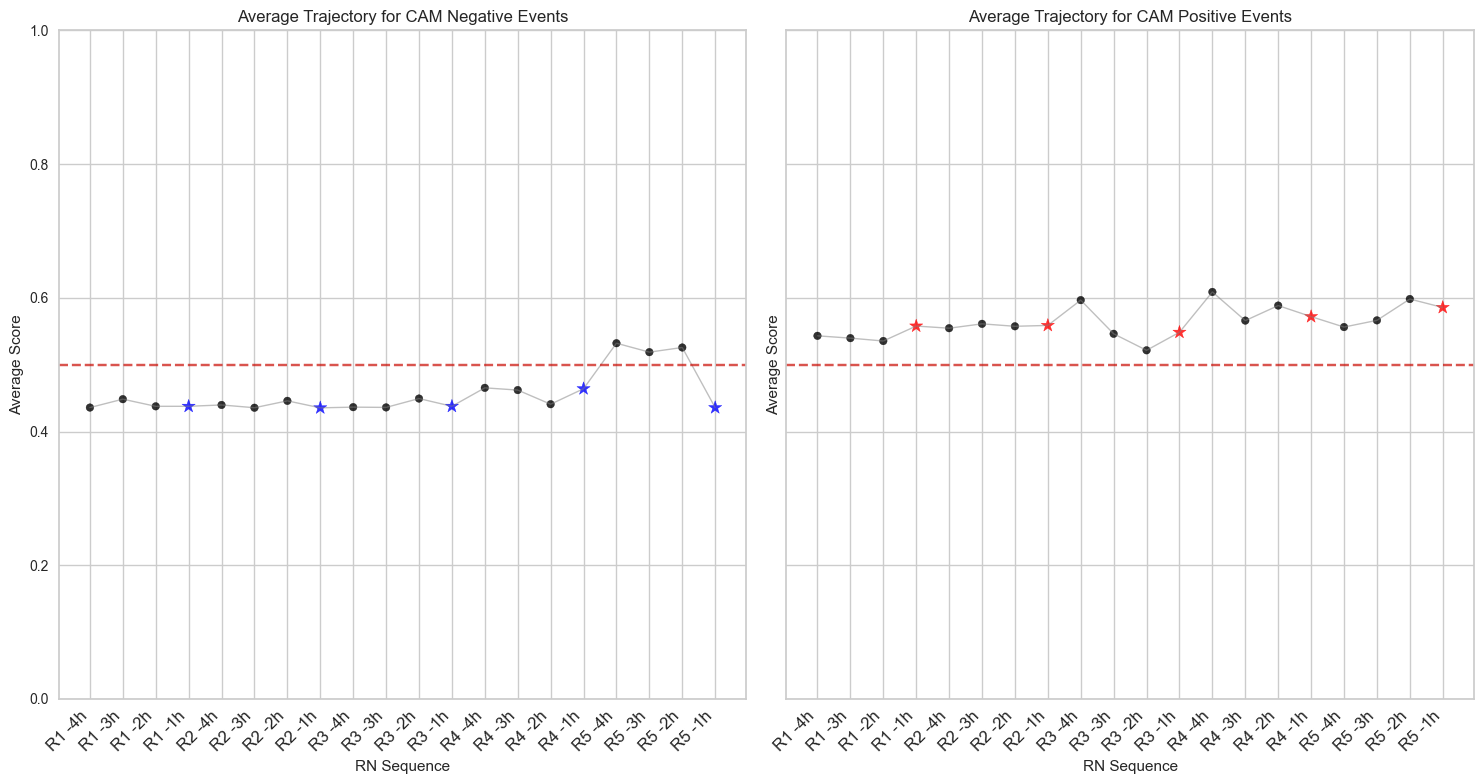

In [116]:
plot_average_trajectory_by_cam(temproal_test_data)

# Drug exposure

In [121]:
final_out_4h.columns

Index(['pid', 'cam_time', 'cam', 'sex', 'age', 'hjorth_activity_II',
       'hjorth_activity_Pleth', 'hjorth_activity_Resp', 'hjorth_complexity_II',
       'hjorth_morbidity_II', 'kurtosis_II', 'kurtosis_Pleth', 'kurtosis_Resp',
       'skewness_II', 'skewness_Pleth', 'skewness_Resp', 'HRs_median',
       'RRs_median', 'SpO2s_median', 'HRs_std', 'RRs_std', 'SpO2s_std',
       'anoid', 'exp_opioid_4h', 'exp_sedative_4h', 'exp_antipsychotic_4h',
       'exp_anticholinergic_4h', 'exp_gabaergic_adjunct_4h',
       'exp_antiepileptic_4h', 'exposed_any_4h'],
      dtype='object')

Transformation Pipeline and Model Successfully Loaded


Transformation Pipeline and Model Successfully Loaded


Transformation Pipeline and Model Successfully Loaded


Transformation Pipeline and Model Successfully Loaded


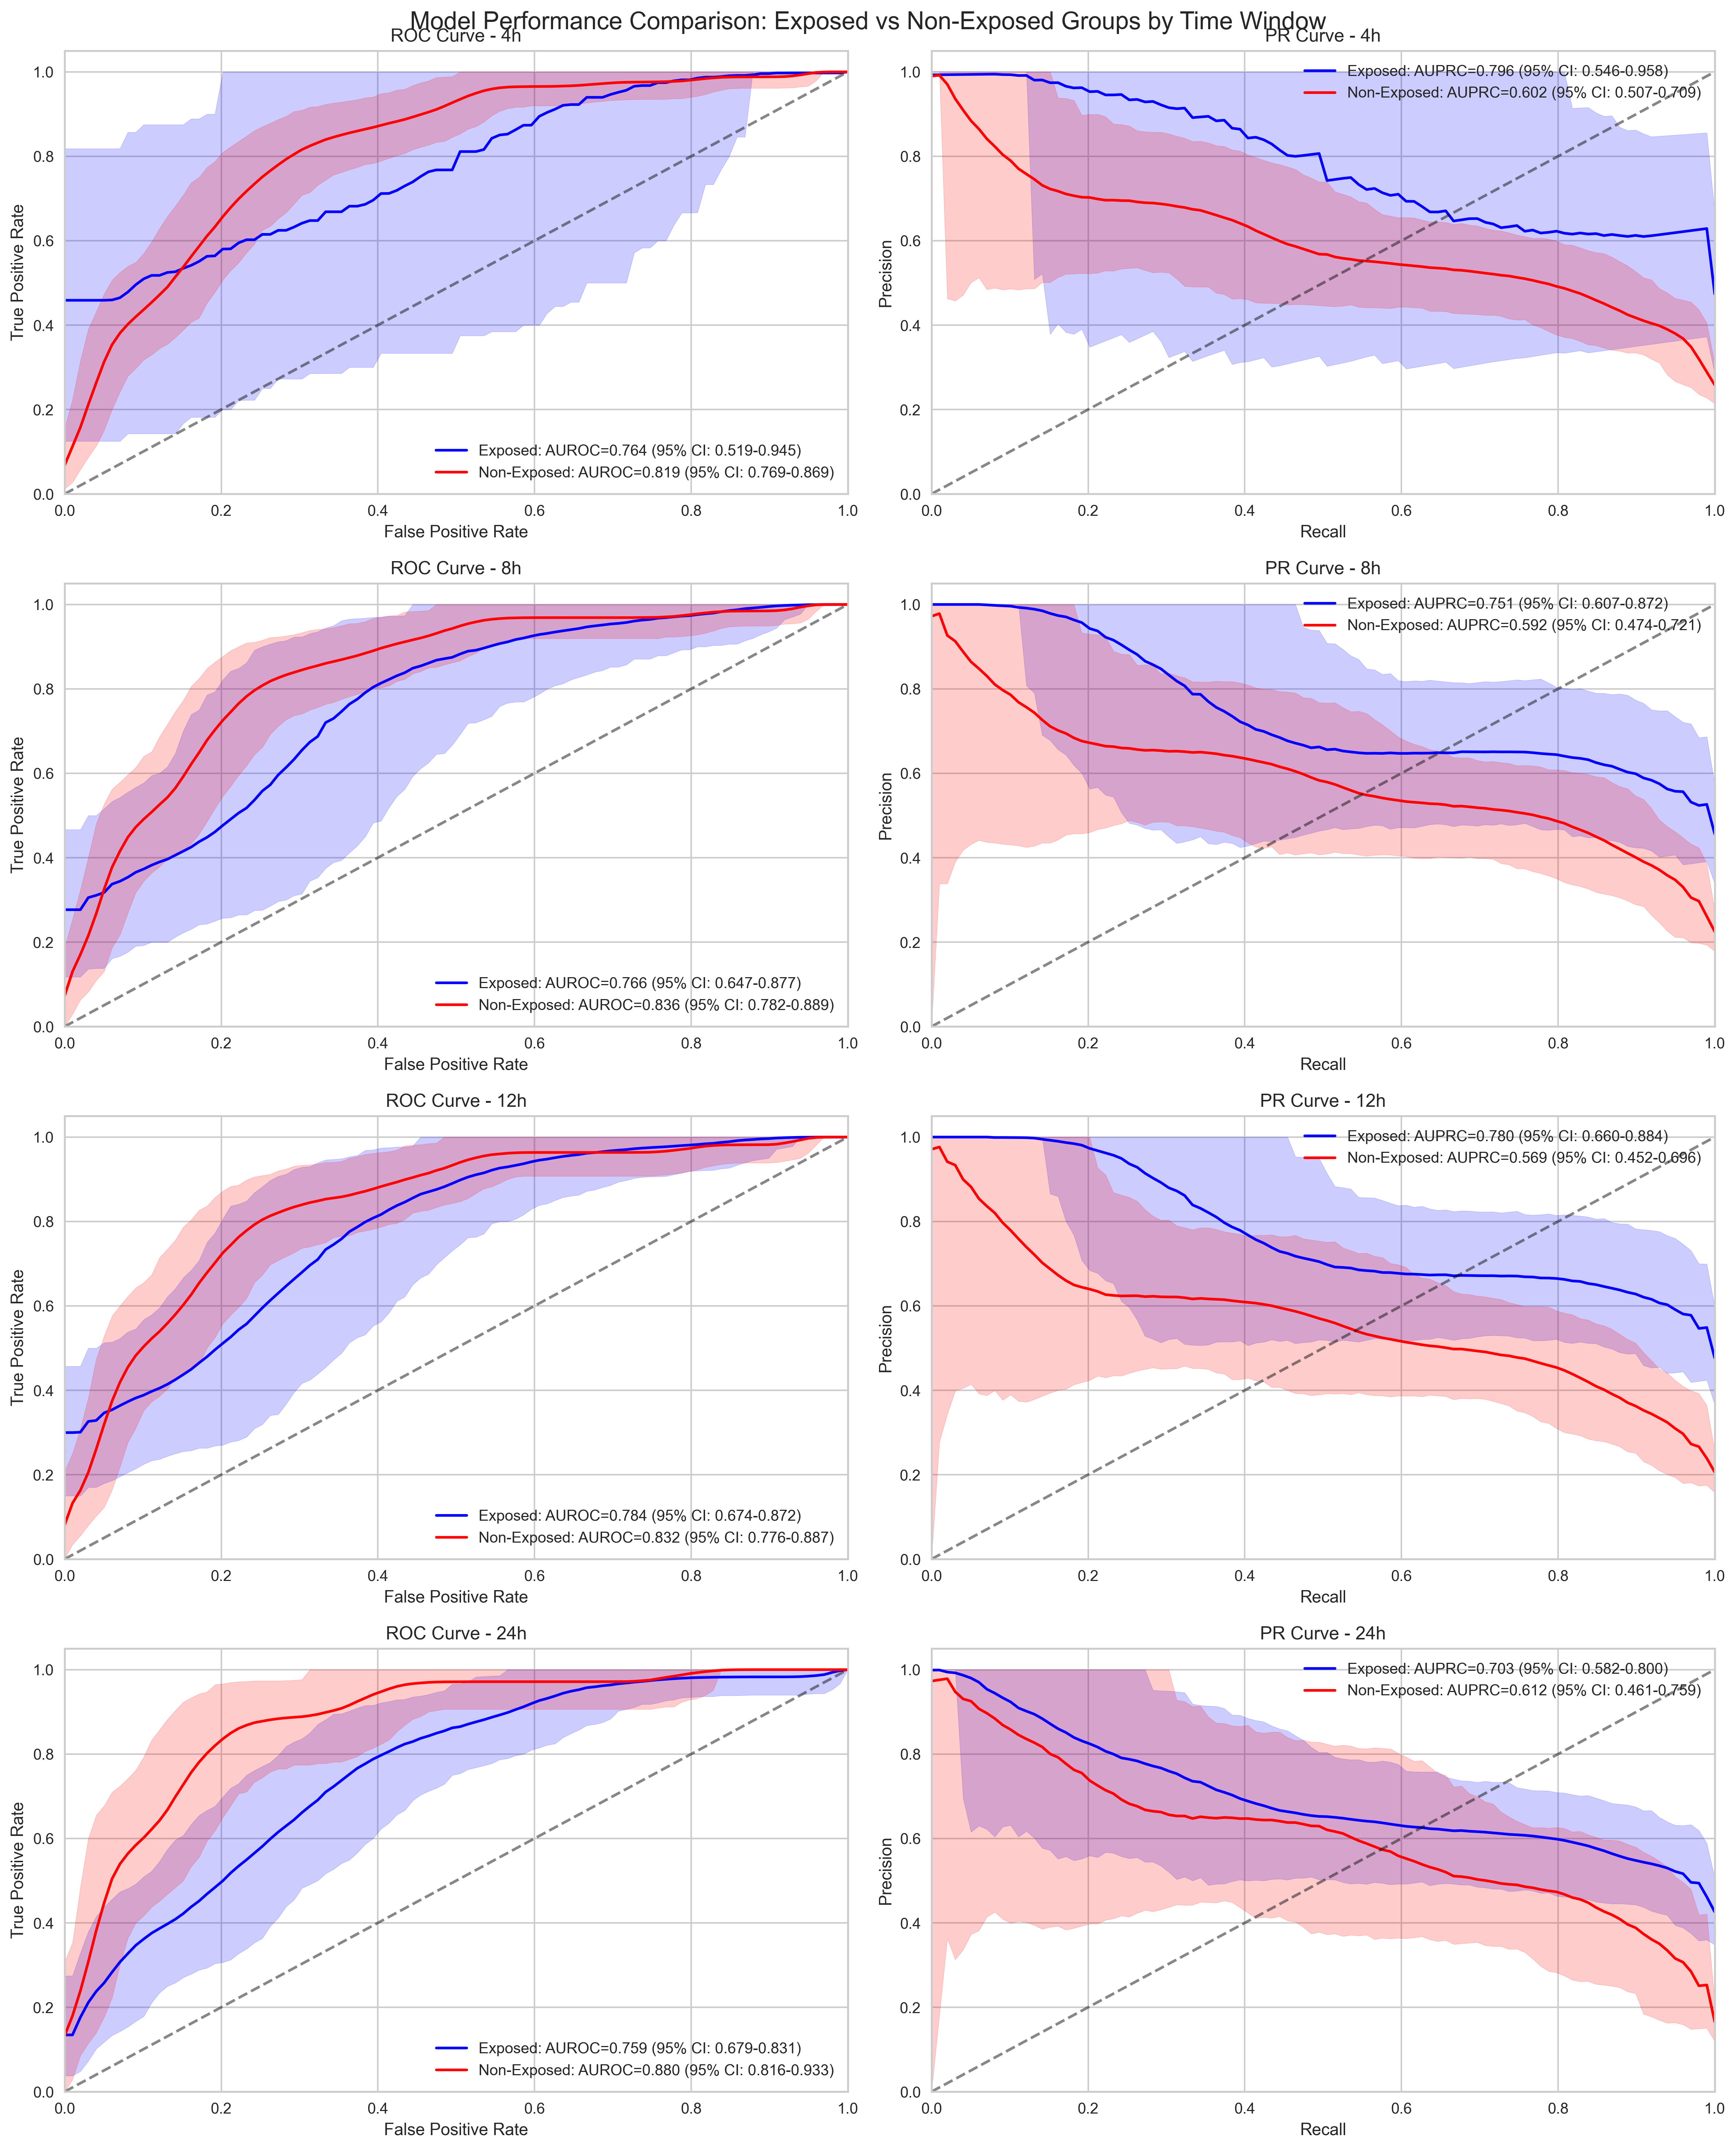

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.utils import resample
from pycaret.classification import setup, predict_model, load_model

# Load the dataframes
final_out_4h = pd.read_csv("./data/drug/final_out_exposed_4h.csv")
final_out_8h = pd.read_csv("./data/drug/final_out_exposed_8h.csv")
final_out_12h = pd.read_csv("./data/drug/final_out_exposed_12h.csv")
final_out_24h = pd.read_csv("./data/drug/final_out_exposed_24h.csv")

# List of dataframes and corresponding time labels
dfs = [final_out_4h, final_out_8h, final_out_12h, final_out_24h]
time_labels = ['4h', '8h', '12h', '24h']

# Assume each df has 'cam' (y_true), 'prediction_score' (y_score, already adjusted for positive class),
# and 'exp_exposed_any_Xh' column (binary 0/1 for any exposure in that time window)
# For generality, we'll extract the exposure column dynamically; adjust column name if needed
exposure_cols = ['exposed_any_4h', 'exposed_any_4h', 'exposed_any_4h', 'exposed_any_4h']

# Bootstrap settings
n_boot = 1000
alpha = 0.05  # 95% CI
fpr_grid = np.linspace(0, 1, 100)
recall_grid = np.linspace(0, 1, 100)

# Function to compute bootstrap metrics and curves for a given y_true, y_score
def bootstrap_metrics(y_true, y_score, n_boot, alpha, fpr_grid, recall_grid):
    boot_aurocs = np.zeros(n_boot)
    boot_auprcs = np.zeros(n_boot)
    boot_tprs = np.zeros((n_boot, len(fpr_grid)))
    boot_precisions = np.zeros((n_boot, len(recall_grid)))
    
    for i in range(n_boot):
        boot_idx = resample(np.arange(len(y_true)), replace=True, n_samples=len(y_true), random_state=i)
        boot_y_true = y_true[boot_idx]
        boot_y_score = y_score[boot_idx]
        
        # AUROC & ROC
        boot_aurocs[i] = roc_auc_score(boot_y_true, boot_y_score)
        fpr, tpr, _ = roc_curve(boot_y_true, boot_y_score)
        boot_tprs[i] = np.interp(fpr_grid, fpr, tpr)
        
        # AUPRC & PR
        boot_auprcs[i] = average_precision_score(boot_y_true, boot_y_score)
        precision, recall, _ = precision_recall_curve(boot_y_true, boot_y_score)
        boot_precisions[i] = np.interp(recall_grid, recall[::-1], precision[::-1])
    
    # Point estimates
    orig_auroc = roc_auc_score(y_true, y_score)
    orig_auprc = average_precision_score(y_true, y_score)
    
    # CIs
    auroc_low = np.percentile(boot_aurocs, 100 * alpha / 2)
    auroc_high = np.percentile(boot_aurocs, 100 * (1 - alpha / 2))
    auprc_low = np.percentile(boot_auprcs, 100 * alpha / 2)
    auprc_high = np.percentile(boot_auprcs, 100 * (1 - alpha / 2))
    
    tpr_mean = np.mean(boot_tprs, axis=0)
    tpr_lower = np.percentile(boot_tprs, 100 * alpha / 2, axis=0)
    tpr_upper = np.percentile(boot_tprs, 100 * (1 - alpha / 2), axis=0)
    
    prec_mean = np.mean(boot_precisions, axis=0)
    prec_lower = np.percentile(boot_precisions, 100 * alpha / 2, axis=0)
    prec_upper = np.percentile(boot_precisions, 100 * (1 - alpha / 2), axis=0)
    
    return {
        'auroc': orig_auroc, 'auroc_ci': (auroc_low, auroc_high),
        'auprc': orig_auprc, 'auprc_ci': (auprc_low, auprc_high),
        'tpr_mean': tpr_mean, 'tpr_lower': tpr_lower, 'tpr_upper': tpr_upper,
        'prec_mean': prec_mean, 'prec_lower': prec_lower, 'prec_upper': prec_upper
    }

# Create the figure with 4 rows x 2 columns subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Model Performance Comparison: Exposed vs Non-Exposed Groups by Time Window', fontsize=16)

for row, (df, time_label, exp_col) in enumerate(zip(dfs, time_labels, exposure_cols)):
    # Data processing and prediction for this df
    random_seed = 94
    data = df.sample(frac=1, random_state=random_seed)
    data = data.query("hjorth_activity_Pleth < 1000")
    uni_pids = pd.unique(data["pid"])
    tr_uni_pids = uni_pids[:int((len(uni_pids) * 0.8))]
    te_uni_pids = uni_pids[int((len(uni_pids) * 0.8)):]
    data['tr_yn'] = 0
    data.loc[data.pid.isin(tr_uni_pids), 'tr_yn'] = 1
    train_data = data[data["tr_yn"] == 1].iloc[:, :-1]
    test_data = data[data["tr_yn"] == 0].iloc[:, :-1]
    train_data = train_data.sort_values(by=['pid'])
    fold_groups = train_data['pid']
    
    # Identify exposure columns for this time window
    exp_cols = [col for col in df.columns if col.endswith(f'_{time_label}h')]
    ignore_features = ['pid', 'cam_time',  'anoid', 'exp_opioid_4h', 'exp_sedative_4h', 'exp_antipsychotic_4h',
       'exp_anticholinergic_4h', 'exp_gabaergic_adjunct_4h',
       'exp_antiepileptic_4h', 'exposed_any_4h'] + exp_cols
    
    setup_clf = setup(data=train_data, target='cam', use_gpu=False, data_split_shuffle=True, memory=False,
                      fold_strategy='groupkfold', fold_groups=fold_groups, ignore_features=ignore_features,
                      n_jobs=1, session_id=8709 + row * 10)
    
    model = load_model('./model/rf_tuned')
    prediction = predict_model(model, data=test_data)
    prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]
    
    # Extract y_true and y_score from prediction
    y_true = prediction['cam'].values
    y_score = prediction['prediction_score'].values
    
    # Split into exposed (1) and non-exposed (0)
    exposed_mask = prediction[exp_col] == 1
    non_exposed_mask = prediction[exp_col] == 0
    
    y_true_exp = y_true[exposed_mask]
    y_score_exp = y_score[exposed_mask]
    y_true_non = y_true[non_exposed_mask]
    y_score_non = y_score[non_exposed_mask]
    
    # Skip if one group is empty
    if len(y_true_exp) == 0 or len(y_true_non) == 0:
        print(f"Warning: Empty group for {time_label}")
        continue
    
    # Bootstrap for exposed
    boot_exp = bootstrap_metrics(y_true_exp, y_score_exp, n_boot, alpha, fpr_grid, recall_grid)
    # Bootstrap for non-exposed
    boot_non = bootstrap_metrics(y_true_non, y_score_non, n_boot, alpha, fpr_grid, recall_grid)
    
    # Left subplot: ROC
    ax_roc = axes[row, 0]
    # Exposed ROC
    ax_roc.plot(fpr_grid, boot_exp['tpr_mean'], color='blue', label=f'Exposed: AUROC={boot_exp["auroc"]:.3f} (95% CI: {boot_exp["auroc_ci"][0]:.3f}-{boot_exp["auroc_ci"][1]:.3f})')
    ax_roc.fill_between(fpr_grid, boot_exp['tpr_lower'], boot_exp['tpr_upper'], color='blue', alpha=0.2)
    # Non-exposed ROC
    ax_roc.plot(fpr_grid, boot_non['tpr_mean'], color='red', label=f'Non-Exposed: AUROC={boot_non["auroc"]:.3f} (95% CI: {boot_non["auroc_ci"][0]:.3f}-{boot_non["auroc_ci"][1]:.3f})')
    ax_roc.fill_between(fpr_grid, boot_non['tpr_lower'], boot_non['tpr_upper'], color='red', alpha=0.2)
    ax_roc.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve - {time_label}')
    ax_roc.legend(loc='lower right')
    ax_roc.set_xlim([0, 1])
    ax_roc.set_ylim([0, 1.05])
    
    # Right subplot: PR
    ax_pr = axes[row, 1]
    # Exposed PR
    ax_pr.plot(recall_grid, boot_exp['prec_mean'], color='blue', label=f'Exposed: AUPRC={boot_exp["auprc"]:.3f} (95% CI: {boot_exp["auprc_ci"][0]:.3f}-{boot_exp["auprc_ci"][1]:.3f})')
    ax_pr.fill_between(recall_grid, boot_exp['prec_lower'], boot_exp['prec_upper'], color='blue', alpha=0.2)
    # Non-exposed PR
    ax_pr.plot(recall_grid, boot_non['prec_mean'], color='red', label=f'Non-Exposed: AUPRC={boot_non["auprc"]:.3f} (95% CI: {boot_non["auprc_ci"][0]:.3f}-{boot_non["auprc_ci"][1]:.3f})')
    ax_pr.fill_between(recall_grid, boot_non['prec_lower'], boot_non['prec_upper'], color='red', alpha=0.2)
    # No diagonal for PR, but y=x line for reference if needed
    ax_pr.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # Baseline (prevalence-dependent, but for ref)
    ax_pr.set_xlabel('Recall')
    ax_pr.set_ylabel('Precision')
    ax_pr.set_title(f'PR Curve - {time_label}')
    ax_pr.legend(loc='upper right')
    ax_pr.set_xlim([0, 1])
    ax_pr.set_ylim([0, 1.05])

plt.tight_layout()
plt.gcf().set_dpi(300)
plt.savefig('performance_comparison_exposed_vs_nonexposed.png', bbox_inches='tight')
plt.show()

# Subgroup Analysis (SEX, AGE)

Transformation Pipeline and Model Successfully Loaded



Fairness Metrics for age_group:
Young:
  AUROC: 0.757 (95% CI: 0.654-0.844)
  AUPRC: 0.362 (95% CI: 0.212-0.529)
  FPR: 0.218 (95% CI: 0.153-0.289)
  FNR: 0.538 (95% CI: 0.333-0.750)
Old:
  AUROC: 0.817 (95% CI: 0.755-0.873)
  AUPRC: 0.704 (95% CI: 0.596-0.807)
  FPR: 0.326 (95% CI: 0.243-0.409)
  FNR: 0.134 (95% CI: 0.061-0.222)

Fairness Metrics for sex:
1:
  AUROC: 0.796 (95% CI: 0.715-0.875)
  AUPRC: 0.656 (95% CI: 0.514-0.797)
  FPR: 0.340 (95% CI: 0.239-0.435)
  FNR: 0.163 (95% CI: 0.068-0.277)
0:
  AUROC: 0.816 (95% CI: 0.746-0.875)
  AUPRC: 0.564 (95% CI: 0.422-0.689)
  FPR: 0.227 (95% CI: 0.165-0.293)
  FNR: 0.343 (95% CI: 0.207-0.488)

Demographic Parity Difference (Young - Old): -0.267
Equalized Odds - FPR Diff (Young - Old): -0.108
Equalized Odds - FNR Diff (Young - Old): 0.404


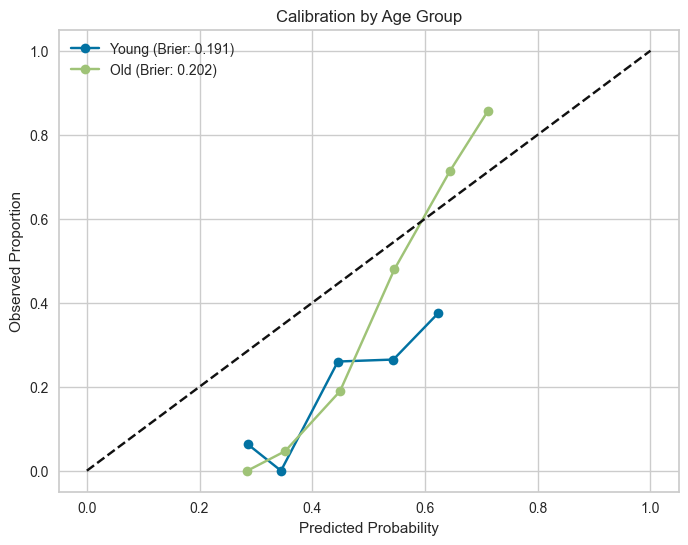

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.utils import resample
from pycaret.classification import setup, load_model, predict_model

# Preprocessing and model prediction (from previous code)
random_seed = 94
data = ys_data.sample(frac=1, random_state=random_seed)
data = data.query("hjorth_activity_Pleth < 1000")
uni_pids = pd.unique(data["pid"])
tr_uni_pids = uni_pids[:int((len(uni_pids) * 0.8))]
te_uni_pids = uni_pids[int((len(uni_pids) * 0.8)):]
data['tr_yn'] = 0
data.loc[data.pid.isin(tr_uni_pids), 'tr_yn'] = 1
train_data = data[data["tr_yn"] == 1].iloc[:, :-1]
test_data = data[data["tr_yn"] == 0].iloc[:, :-1]
train_data = train_data.sort_values(by=['pid'])
fold_groups = train_data['pid']

ignore_features = ['pid', 'cam_time', 'next_time','future_cam'] 
setup_clf = setup(data=train_data, target='cam', use_gpu=False, data_split_shuffle=True, memory=False,
                  fold_strategy='groupkfold', fold_groups=fold_groups, ignore_features=ignore_features,
                  n_jobs=1, session_id=8709)
model = load_model('./model/rf_tuned')
prediction = predict_model(model, data=test_data)
prediction.loc[prediction["prediction_label"] == 0, 'prediction_score'] = 1 - prediction[prediction["prediction_label"] == 0]["prediction_score"]

# Bootstrap settings
n_boot = 1000
alpha = 0.05

# Function for bootstrap metrics (AUROC, AUPRC, FPR, FNR)
def bootstrap_fairness_metrics(y_true, y_score, y_pred, n_boot, alpha):
    boot_aurocs = np.zeros(n_boot)
    boot_auprcs = np.zeros(n_boot)
    boot_fprs = np.zeros(n_boot)
    boot_fnrs = np.zeros(n_boot)
    
    for i in range(n_boot):
        boot_idx = resample(np.arange(len(y_true)), replace=True, n_samples=len(y_true), random_state=i)
        boot_y_true = y_true[boot_idx]
        boot_y_score = y_score[boot_idx]
        boot_y_pred = y_pred[boot_idx]
        
        boot_aurocs[i] = roc_auc_score(boot_y_true, boot_y_score)
        boot_auprcs[i] = average_precision_score(boot_y_true, boot_y_score)
        
        tn, fp, fn, tp = confusion_matrix(boot_y_true, boot_y_pred).ravel()
        boot_fprs[i] = fp / (fp + tn) if (fp + tn) > 0 else 0
        boot_fnrs[i] = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    metrics = {
        'auroc': np.mean(boot_aurocs), 'auroc_ci': np.percentile(boot_aurocs, [100*alpha/2, 100*(1-alpha/2)]),
        'auprc': np.mean(boot_auprcs), 'auprc_ci': np.percentile(boot_auprcs, [100*alpha/2, 100*(1-alpha/2)]),
        'fpr': np.mean(boot_fprs), 'fpr_ci': np.percentile(boot_fprs, [100*alpha/2, 100*(1-alpha/2)]),
        'fnr': np.mean(boot_fnrs), 'fnr_ci': np.percentile(boot_fnrs, [100*alpha/2, 100*(1-alpha/2)])
    }
    return metrics

# Threshold for binary prediction (e.g., 0.5; adjust based on Youden or desired)
threshold = 0.5
prediction['prediction_binary'] = (prediction['prediction_score'] >= threshold).astype(int)

# 1. Subgroup Performance by Age Bins (e.g., <65, 65+; or tertiles)
# Assume age bins: young (<65), old (>=65)
prediction['age_group'] = pd.cut(prediction['age'], bins=[0, 65, np.inf], labels=['Young', 'Old'])

# 2. Subgroup by Sex (assume 'sex' is 'M'/'F')
# If numeric, map: prediction['sex_group'] = prediction['sex'].map({0: 'Male', 1: 'Female'})

# Compute metrics for each subgroup
subgroups = ['age_group', 'sex']  # Replace 'sex' with 'sex_group' if mapped
results = {}

for subgroup in subgroups:
    results[subgroup] = {}
    for group in prediction[subgroup].unique():
        mask = prediction[subgroup] == group
        y_true = prediction.loc[mask, 'cam'].values
        y_score = prediction.loc[mask, 'prediction_score'].values
        y_pred = prediction.loc[mask, 'prediction_binary'].values
        
        if len(y_true) < 10 or np.unique(y_true).size < 2:  # Skip small/invalid groups
            continue
        
        metrics = bootstrap_fairness_metrics(y_true, y_score, y_pred, n_boot, alpha)
        results[subgroup][group] = metrics

# Print results
for subgroup, groups in results.items():
    print(f"\nFairness Metrics for {subgroup}:")
    for group, metrics in groups.items():
        print(f"{group}:")
        print(f"  AUROC: {metrics['auroc']:.3f} (95% CI: {metrics['auroc_ci'][0]:.3f}-{metrics['auroc_ci'][1]:.3f})")
        print(f"  AUPRC: {metrics['auprc']:.3f} (95% CI: {metrics['auprc_ci'][0]:.3f}-{metrics['auprc_ci'][1]:.3f})")
        print(f"  FPR: {metrics['fpr']:.3f} (95% CI: {metrics['fpr_ci'][0]:.3f}-{metrics['fpr_ci'][1]:.3f})")
        print(f"  FNR: {metrics['fnr']:.3f} (95% CI: {metrics['fnr_ci'][0]:.3f}-{metrics['fnr_ci'][1]:.3f})")

# 3. Bias Tests: Equalized Odds (FPR/FNR difference), Demographic Parity (prediction rate)
# Example for age
young_mask = prediction['age_group'] == 'Young'
old_mask = prediction['age_group'] == 'Old'

# Demographic Parity: Positive prediction rate
pred_rate_young = prediction.loc[young_mask, 'prediction_binary'].mean()
pred_rate_old = prediction.loc[old_mask, 'prediction_binary'].mean()
print(f"\nDemographic Parity Difference (Young - Old): {pred_rate_young - pred_rate_old:.3f}")

# Equalized Odds: FPR and FNR from metrics
fpr_diff = results['age_group']['Young']['fpr'] - results['age_group']['Old']['fpr']
fnr_diff = results['age_group']['Young']['fnr'] - results['age_group']['Old']['fnr']
print(f"Equalized Odds - FPR Diff (Young - Old): {fpr_diff:.3f}")
print(f"Equalized Odds - FNR Diff (Young - Old): {fnr_diff:.3f}")

# Similar for sex...

# 4. Calibration by Group (Brier Score and Plot)
def brier_score(y_true, y_score):
    return np.mean((y_true - y_score)**2)

fig, ax = plt.subplots(figsize=(8, 6))
for group in prediction['age_group'].unique():
    mask = prediction['age_group'] == group
    y_true = prediction.loc[mask, 'cam']
    y_score = prediction.loc[mask, 'prediction_score']
    
    # Binning for calibration
    bins = np.linspace(0, 1, 11)
    bin_means = [y_true[(y_score >= bins[i]) & (y_score < bins[i+1])].mean() for i in range(10)]
    bin_preds = [np.mean(y_score[(y_score >= bins[i]) & (y_score < bins[i+1])]) for i in range(10)]
    
    ax.plot(bin_preds, bin_means, marker='o', label=f'{group} (Brier: {brier_score(y_true, y_score):.3f})')

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Proportion')
ax.set_title('Calibration by Age Group')
ax.legend()
plt.savefig('calibration_by_age.png')
plt.show()

# Repeat for sex...

# Risk stratification

Loaded data from ./data/processed_final_dt_240103_intime_outtime.csv
Applying Train/Test Split...
Total Patients: 814
Train Patients: 651, Test Patients: 163
Test Data Rows: 352
Loading model from ./model/rf_tuned...
Transformation Pipeline and Model Successfully Loaded
Generating predictions on TEST DATA...
Prediction scores adjusted.
Assigning Risk Groups...
Time_delta_hours calculated successfully.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saved incidence_by_risk_test_set.png

=== Odds Ratio Analysis (Test Set) ===
               Event_Rate         OR (95% CI) P-value
risk_group                                           
Low           5/82 (6.1%)     1.0 (Reference)       -
High        36/81 (44.4%)  12.32 (4.51-33.66)  <0.001

=== Cox Proportional Hazards Analysis (Time in Hours) ===
                                                         HR (95% CI) P-value
C(risk_group, Treatment(reference='Low'))[T.High]  7.20 (2.81-18.46)  <0.001

=== Adjusted Cox Proportional Hazards Analysis (Multivariate) ===
Samples used for Cox analysis: 163
                        HR (95% CI) P-value
Risk Group: High  6.02 (2.31-15.69)  <0.001
Sex (Ref=0/F): 1   1.04 (0.55-1.99)   0.902
Age (per 1 year)   1.03 (1.01-1.05)   0.016
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extens

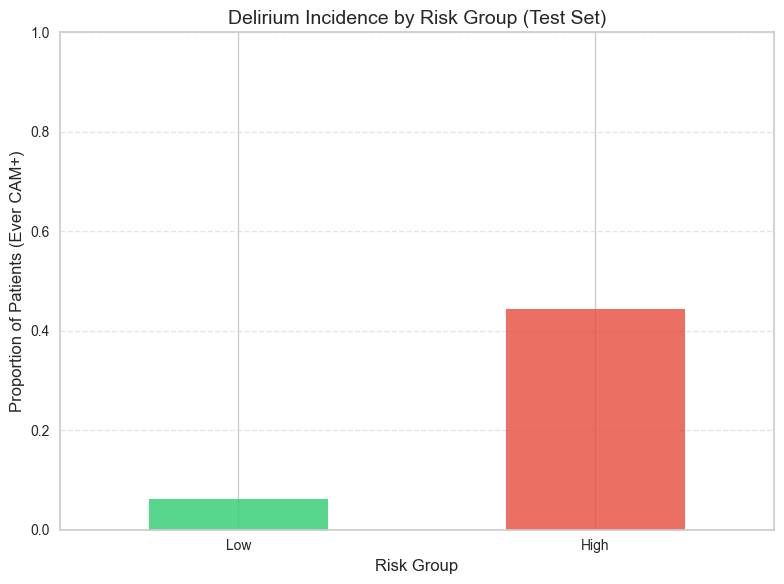

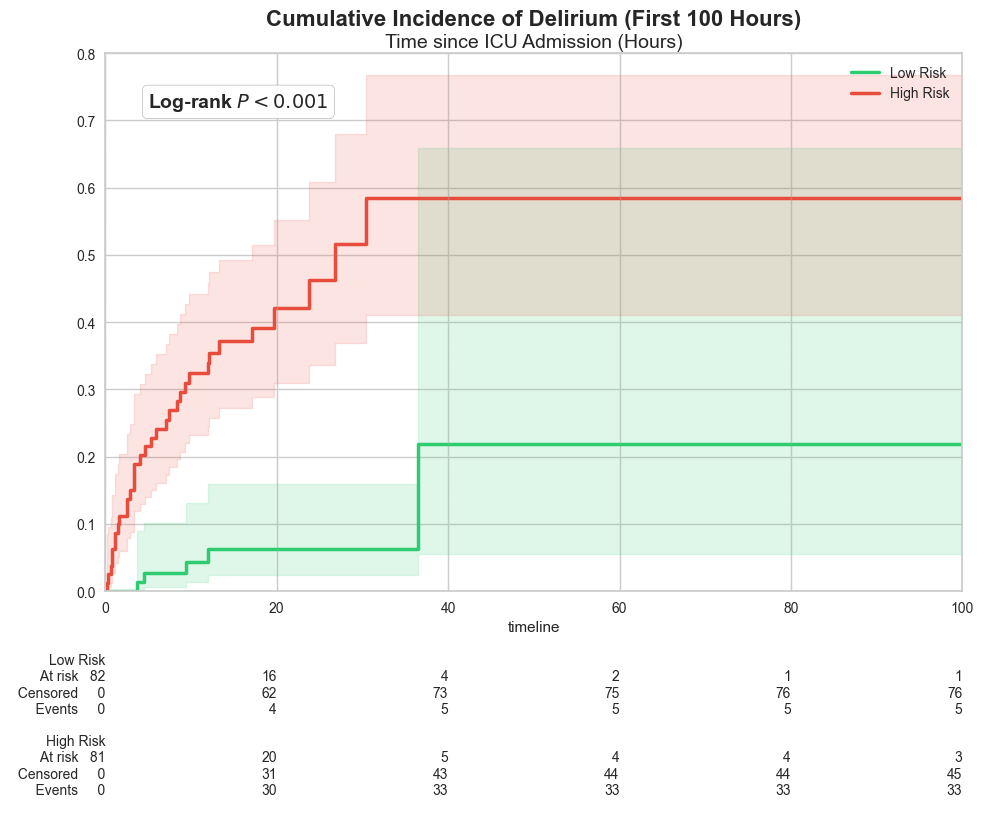

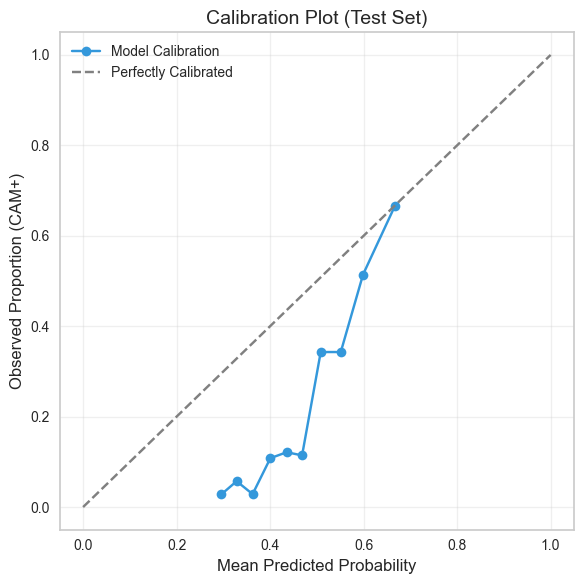

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import brier_score_loss

# PyCaret 로드 (없으면 경고)
try:
    from pycaret.classification import load_model, predict_model
    PYCARET_AVAILABLE = True
except ImportError:
    PYCARET_AVAILABLE = False
    print("Warning: PyCaret not installed. Model prediction will be skipped.")

# -----------------------------------------------------------
# 1. 분석 및 시각화 함수들 (기존 로직 유지 + OR 테이블 포맷팅 적용)
# -----------------------------------------------------------

def preprocess_and_assign_risk(data):
    """
    Test 데이터에 대해 Baseline 시점의 예측 점수를 기준으로 Risk Group(3분위)을 할당합니다.
    """
    # 환자별, 시간순 정렬
    data = data.sort_values(['pid', 'cam_time'])
    
    # Baseline(첫 번째 관측) 식별
    # 주의: Test Set 내에서의 첫 관측을 의미함
    data['rn'] = data.groupby('pid').cumcount() + 1
    baseline_data = data[data['rn'] == 1].copy()
    
    # 3분위수(Tertile)로 Risk Group 할당
    try:
        baseline_data['risk_group'] = pd.qcut(baseline_data['prediction_score'], 2, labels=['Low', 'High'])
    except ValueError as e:
        print(f"Error in qcut: {e}. 'prediction_score'의 고유값이 부족할 수 있습니다.")
        raise e
    
    # 전체 데이터에 Risk Group 매핑
    data = data.merge(baseline_data[['pid', 'risk_group']], on='pid', how='left')
    
    return data

def analyze_incidence(data):
    # 환자별 최대 CAM 상태 (한 번이라도 걸렸으면 1)
    patient_summary = data.groupby(['pid', 'risk_group'], observed=True)['cam'].max().reset_index()
    patient_summary.rename(columns={'cam': 'ever_cam_positive'}, inplace=True)
    
    incidence_rates = patient_summary.groupby('risk_group', observed=True)['ever_cam_positive'].mean()
    
    # Plot
    plt.figure(figsize=(8, 6))
    colors = ['#2ecc71', '#e74c3c'] 
    incidence_rates.plot(kind='bar', color=colors, alpha=0.8)
    plt.title('Delirium Incidence by Risk Group (Test Set)', fontsize=14)
    plt.ylabel('Proportion of Patients (Ever CAM+)', fontsize=12)
    plt.xlabel('Risk Group', fontsize=12)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('incidence_by_risk_test_set.png', dpi=300)
    print("Saved incidence_by_risk_test_set.png")
    
    return patient_summary

def calculate_odds_ratios(patient_summary):
    """
    논문용 포맷으로 OR Table 생성 (Event Count 포함)
    """
    print("\n=== Odds Ratio Analysis (Test Set) ===")
    
    # 1. 기술 통계량 (Event n / Total N (%))
    descriptive = patient_summary.groupby('risk_group', observed=True)['ever_cam_positive'].agg(['count', 'sum'])
    descriptive['percent'] = (descriptive['sum'] / descriptive['count']) * 100
    descriptive['Event_Rate'] = descriptive.apply(
        lambda x: f"{int(x['sum'])}/{int(x['count'])} ({x['percent']:.1f}%)", axis=1
    )
    
    # 2. 로지스틱 회귀분석
    model = smf.logit("ever_cam_positive ~ C(risk_group, Treatment(reference='Low'))", data=patient_summary).fit(disp=0)
    
    # 3. 결과 추출
    params = model.params
    conf = model.conf_int()
    conf['OR'] = params
    conf.columns = ['Lower', 'Upper', 'OR']
    
    odds_ratios = np.exp(conf)
    odds_ratios['P-value'] = model.pvalues

    # 4. 포맷팅
    odds_ratios = odds_ratios.loc[odds_ratios.index.str.contains("risk_group")]
    odds_ratios.index = [idx.replace("C(risk_group, Treatment(reference='Low'))[T.", "").replace("]", "") for idx in odds_ratios.index]
    
    result_df = descriptive[['Event_Rate']].copy()
    result_df['OR (95% CI)'] = '1.0 (Reference)'
    result_df['P-value'] = '-'
    
    for idx in odds_ratios.index:
        if idx in result_df.index:
            or_val = odds_ratios.loc[idx, 'OR']
            lower, upper = odds_ratios.loc[idx, 'Lower'], odds_ratios.loc[idx, 'Upper']
            p_val = odds_ratios.loc[idx, 'P-value']
            
            result_df.loc[idx, 'OR (95% CI)'] = f"{or_val:.2f} ({lower:.2f}-{upper:.2f})"
            result_df.loc[idx, 'P-value'] = "<0.001" if p_val < 0.001 else f"{p_val:.3f}"

    try:
        result_df = result_df.reindex(['Low', 'High'])
    except:
        pass

    print(result_df)
    result_df.to_csv('odds_ratios_test_set.csv')
    return result_df

def plot_calibration(data, n_bins=10):
    # Test Set에 대한 Calibration Plot
    data['bin'] = pd.qcut(data['prediction_score'], n_bins, duplicates='drop')
    grouped = data.groupby('bin', observed=True)
    prob_pred = grouped['prediction_score'].mean()
    prob_true = grouped['cam'].mean()
    
    plt.figure(figsize=(6, 6))
    plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='#3498db', label='Model Calibration')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
    plt.xlabel('Mean Predicted Probability', fontsize=12)
    plt.ylabel('Observed Proportion (CAM+)', fontsize=12)
    plt.title('Calibration Plot (Test Set)', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('calibration_plot_test_set.png', dpi=300)
    
    brier = brier_score_loss(data['cam'], data['prediction_score'])
    print(f"\nTest Set Brier Score: {brier:.4f}")

def analyze_cumulative_risk(data):
    """
    [수정됨] X축 100시간, Y축 0.8로 제한하여 'Zoom-in'한 그래프 그리기
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from lifelines import KaplanMeierFitter
    from lifelines.statistics import multivariate_logrank_test
    from lifelines.plotting import add_at_risk_counts 
    
    if 'Time_delta_hours' not in data.columns:
        print("Error: 'Time_delta_hours' column is missing.")
        return

    # -------------------------------------------------------
    # 1. 데이터 준비 (전체 데이터 사용 - 통계적 유의성은 전체로 계산)
    # -------------------------------------------------------
    events = data[data['cam'] == 1].groupby('pid')['Time_delta_hours'].min().reset_index()
    events.rename(columns={'Time_delta_hours': 'event_time'}, inplace=True)
    events['event'] = 1
    
    max_obs = data.groupby('pid')['Time_delta_hours'].max().reset_index()
    max_obs.rename(columns={'Time_delta_hours': 'max_time'}, inplace=True)
    
    patient_risks = data[['pid', 'risk_group']].drop_duplicates()
    
    analysis_df = patient_risks.merge(events, on='pid', how='left')
    analysis_df = analysis_df.merge(max_obs, on='pid', how='left')
    
    analysis_df['event'] = analysis_df['event'].fillna(0).astype(int)
    analysis_df['time'] = analysis_df['event_time'].fillna(analysis_df['max_time'])
    analysis_df = analysis_df.dropna(subset=['time'])
    analysis_df['time'] = analysis_df['time'].astype(float)

    # -------------------------------------------------------
    # 2. Plotting 설정 (Zoom-in)
    # -------------------------------------------------------
    fig, ax = plt.subplots(figsize=(10, 8))
    
    groups = ['Low', 'High'] 
    colors = {'Low': '#2ecc71', 'High': '#e74c3c'}
    
    fitters = []
    
    # ★ 핵심 수정 1: 보여줄 범위 설정
    view_xlim = 100  # X축을 100까지만
    view_ylim = 0.8  # Y축을 0.8까지만
    
    # ★ 핵심 수정 2: 눈금 간격 (100시간만 보니까 20시간 단위로 촘촘하게)
    # 0, 20, 40, 60, 80, 100
    x_ticks_list = np.arange(0, view_xlim + 1, 20) 

    for group in groups:
        group_df = analysis_df[analysis_df['risk_group'] == group]
        
        if not group_df.empty:
            kmf = KaplanMeierFitter() 
            kmf.fit(durations=group_df['time'], 
                    event_observed=group_df['event'], 
                    label=f"{group} Risk")
            
            kmf.plot_cumulative_density(
                ax=ax,
                color=colors.get(group, 'blue'), 
                linewidth=2.5, 
                ci_show=True, 
                ci_alpha=0.15,
                xticks=x_ticks_list # 그래프 눈금 고정
            )
            fitters.append(kmf)

    # -------------------------------------------------------
    # 3. 테이블 및 축 제한 적용
    # -------------------------------------------------------
    
    # ★ 핵심 수정 3: 그래프 축 제한 (Zoom-in)
    ax.set_xlim(0, view_xlim)
    ax.set_ylim(0, view_ylim)

    if fitters:
        add_at_risk_counts(
            *fitters, 
            ax=ax, 
            xticks=x_ticks_list, # 테이블도 0~100까지만 20단위로 표시
            rows_to_show=['At risk', 'Censored', 'Events']
        )

    # -------------------------------------------------------
    # 4. 통계 (주의: P-value는 전체 데이터 기준임)
    # -------------------------------------------------------
    try:
        # P-value는 '보여지는 구간'만이 아니라 '전체 데이터'로 계산하는 것이 정석입니다.
        result = multivariate_logrank_test(
            analysis_df['time'], analysis_df['risk_group'], analysis_df['event']
        )
        p_val = result.p_value
        p_text = "Log-rank $P < 0.001$" if p_val < 0.001 else f"Log-rank $P = {p_val:.3f}$"
            
        plt.text(0.05, 0.90, p_text,  
                 transform=ax.transAxes,
                 fontsize=14, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9))
    except Exception as e:
        print(f"Log-rank test skipped: {e}")

    plt.title('Cumulative Incidence of Delirium (First 100 Hours)', fontsize=16, fontweight='bold')
    plt.xlabel('Time since ICU Admission (Hours)', fontsize=14)
    plt.ylabel('Cumulative Incidence Probability', fontsize=14)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(loc='lower right', fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)
    
    plt.savefig('cumulative_risk_zoomed_100h.png', dpi=300)
    print("Saved cumulative_risk_zoomed_100h.png")
    
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

def calculate_hazard_ratios(data):
    """
    [수정됨] Cox 분석 시 'Time_delta_hours' 사용
    """
    print("\n=== Cox Proportional Hazards Analysis (Time in Hours) ===")
    
    df = data.copy()
    if 'Time_delta_hours' not in df.columns:
        print("Error: 'Time_delta_hours' column missing.")
        return None

    # ---------------------------------------------------------
    # Time-to-Event 데이터 생성 (Continuous Time)
    # ---------------------------------------------------------
    events = df[df['cam'] == 1].groupby('pid')['Time_delta_hours'].min().reset_index()
    events.rename(columns={'Time_delta_hours': 'event_time'}, inplace=True)
    events['event'] = 1
    
    max_obs = df.groupby('pid')['Time_delta_hours'].max().reset_index()
    max_obs.rename(columns={'Time_delta_hours': 'max_time'}, inplace=True)
    
    cohort = df[['pid', 'risk_group']].drop_duplicates()
    cox_df = cohort.merge(events, on='pid', how='left')
    cox_df = cox_df.merge(max_obs, on='pid', how='left')
    
    cox_df['event'] = cox_df['event'].fillna(0).astype(int)
    cox_df['time'] = cox_df['event_time'].fillna(cox_df['max_time'])
    
    # 시간 값이 0이거나 NaN인 경우 제외 (Cox 모델 오류 방지)
    cox_df = cox_df[cox_df['time'] > 0].dropna(subset=['time', 'risk_group'])

    # ---------------------------------------------------------
    # Cox Model 적합
    # ---------------------------------------------------------
    try:
        result = smf.phreg("time ~ C(risk_group, Treatment(reference='Low'))", 
                           data=cox_df, status=cox_df['event']).fit()
        
        # (이하 결과 추출 로직은 기존 코드와 동일, 변수명만 유지하면 됨)
        # ... [기존 코드의 결과 추출 부분 그대로 사용] ...
        
        # --- 여기서는 핵심 로직인 formula와 data 준비과정만 수정해드렸습니다. ---
        # --- 아래는 결과 출력용 (기존 코드 복붙하되 result 객체 사용) ---
        
        exog_names = result.model.exog_names
        params = pd.Series(result.params, index=exog_names)
        conf = pd.DataFrame(result.conf_int(), index=exog_names, columns=['Lower_Log', 'Upper_Log'])
        p_values = result.pvalues

        conf['HR'] = np.exp(params)
        conf['Lower'] = np.exp(conf['Lower_Log'])
        conf['Upper'] = np.exp(conf['Upper_Log'])
        
        result_df = pd.DataFrame(index=conf.index)
        result_df['HR (95% CI)'] = '-'
        result_df['P-value'] = '-'
        
        for i, idx in enumerate(conf.index):
            hr = conf.loc[idx, 'HR']
            lower, upper = conf.loc[idx, 'Lower'], conf.loc[idx, 'Upper']
            if isinstance(p_values, (np.ndarray, list)): p_val = p_values[i]
            else: p_val = p_values[idx]
            
            result_df.loc[idx, 'HR (95% CI)'] = f"{hr:.2f} ({lower:.2f}-{upper:.2f})"
            result_df.loc[idx, 'P-value'] = "<0.001" if p_val < 0.001 else f"{p_val:.3f}"
            
        print(result_df)
        result_df.to_csv('hazard_ratios_hours.csv')
        return result_df

    except Exception as e:
        print(f"Cox Analysis Failed: {e}")
        return None
    
def calculate_hazard_ratios_adjusted(data):
    """
    [수정됨] 나이(age)와 성별(sex)을 보정변수로 포함한 다변량 Cox 분석
    """
    print("\n=== Adjusted Cox Proportional Hazards Analysis (Multivariate) ===")
    
    df = data.copy()
    
    # 1. 필수 컬럼 확인
    required_cols = ['Time_delta_hours', 'risk_group', 'age', 'sex']
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        print(f"Error: Missing columns for adjustment: {missing_cols}")
        return None

    # 2. Time-to-Event 데이터 생성
    events = df[df['cam'] == 1].groupby('pid')['Time_delta_hours'].min().reset_index()
    events.rename(columns={'Time_delta_hours': 'event_time'}, inplace=True)
    events['event'] = 1
    
    max_obs = df.groupby('pid')['Time_delta_hours'].max().reset_index()
    max_obs.rename(columns={'Time_delta_hours': 'max_time'}, inplace=True)
    
    # ★ 수정 1: cohort 생성 시 age, sex 포함
    # (주의: 한 환자의 age, sex는 변하지 않는다고 가정하고 첫 번째 값 가져옴)
    cohort = df[['pid', 'risk_group', 'age', 'sex']].drop_duplicates(subset=['pid'])
    
    cox_df = cohort.merge(events, on='pid', how='left')
    cox_df = cox_df.merge(max_obs, on='pid', how='left')
    
    cox_df['event'] = cox_df['event'].fillna(0).astype(int)
    cox_df['time'] = cox_df['event_time'].fillna(cox_df['max_time'])
    
    # 결측치 및 시간 0 제거
    cox_df = cox_df[cox_df['time'] > 0].dropna(subset=['time', 'risk_group', 'age', 'sex'])

    print(f"Samples used for Cox analysis: {len(cox_df)}")

    # 3. Cox Model 적합
    try:
        # ★ 수정 2: Formula에 age와 sex 추가
        # C(sex): 성별을 범주형으로 처리 (0/1 또는 M/F 상관없이 작동)
        formula = "time ~ C(risk_group, Treatment(reference='Low')) + age + C(sex)"
        
        result = smf.phreg(formula, data=cox_df, status=cox_df['event']).fit()
        
        # --- 결과 정리 ---
        exog_names = result.model.exog_names
        params = pd.Series(result.params, index=exog_names)
        conf = pd.DataFrame(result.conf_int(), index=exog_names, columns=['Lower_Log', 'Upper_Log'])
        p_values = result.pvalues

        conf['HR'] = np.exp(params)
        conf['Lower'] = np.exp(conf['Lower_Log'])
        conf['Upper'] = np.exp(conf['Upper_Log'])
        
        result_df = pd.DataFrame(index=conf.index)
        result_df['HR (95% CI)'] = '-'
        result_df['P-value'] = '-'
        
        for i, idx in enumerate(conf.index):
            hr = conf.loc[idx, 'HR']
            lower, upper = conf.loc[idx, 'Lower'], conf.loc[idx, 'Upper']
            
            if isinstance(p_values, (np.ndarray, list)): p_val = p_values[i]
            else: p_val = p_values[idx]
            
            result_df.loc[idx, 'HR (95% CI)'] = f"{hr:.2f} ({lower:.2f}-{upper:.2f})"
            result_df.loc[idx, 'P-value'] = "<0.001" if p_val < 0.001 else f"{p_val:.3f}"
            
        # --- 인덱스 이름 깔끔하게 정리 (Regex 활용 권장하지만 여기선 replace로 처리) ---
        new_index = []
        for idx in result_df.index:
            if "risk_group" in idx:
                name = idx.replace("C(risk_group, Treatment(reference='Low'))[T.", "").replace("]", "")
                new_index.append(f"Risk Group: {name}")
            elif "sex" in idx:
                # 성별은 데이터에 따라 [T.Male], [T.1] 등으로 나올 수 있음
                new_index.append(f"Sex (Ref=0/F): {idx.split('[T.')[-1].replace(']', '')}") 
            elif "age" in idx:
                new_index.append("Age (per 1 year)")
            else:
                new_index.append(idx)
        
        result_df.index = new_index
        
        # Reference Row 추가 (보기 좋게 맨 위에 Low 추가)
        # 단, 다변량 분석에서는 Reference를 표에 넣기 애매할 수 있으므로 
        # Risk Group만 따로 떼서 볼 수도 있지만, 여기선 그냥 출력합니다.
        
        print(result_df)
        result_df.to_csv('hazard_ratios_adjusted.csv')
        return result_df

    except Exception as e:
        print(f"Cox Analysis Failed: {e}")
        # 디버깅을 위해 에러 메시지를 자세히 출력
        import traceback
        traceback.print_exc()
        return None    
# -----------------------------------------------------------
# 2. Main Execution Block
# -----------------------------------------------------------

if __name__ == "__main__":
    # 2.1 데이터 로드
    file_path = './data/processed_final_dt_240103_intime_outtime.csv'
    try:
        ys_data = pd.read_csv(file_path)
        print(f"Loaded data from {file_path}")
    except FileNotFoundError:
        print("Error: Data file not found.")
        exit()

    # 2.2 Preprocessing & Splitting (사용자 제공 코드 적용)
    print("Applying Train/Test Split...")
    random_seed = 94
    
    # 전체 셔플
    data = ys_data.sample(frac=1, random_state=random_seed)
    
    # Artifact 필터링
    data = data.query("hjorth_activity_Pleth < 1000")
    
    # PID 기준 Split
    uni_pids = pd.unique(data["pid"])
    # 80% Train, 20% Test
    tr_uni_pids = uni_pids[:int((len(uni_pids) * 0.8))]
    te_uni_pids = uni_pids[int((len(uni_pids) * 0.8)):]
    
    # Flag 생성 (확인용)
    data['tr_yn'] = 0
    data.loc[data.pid.isin(tr_uni_pids), 'tr_yn'] = 1
    
    # 데이터 분리
    # train_data = data[data["tr_yn"] == 1] # 학습용 (이번 분석에선 모델이 이미 있으므로 불필요할 수 있음)
    test_data = data[data["tr_yn"] == 0].copy() # 검증용 (여기가 중요!)
    
    print(f"Total Patients: {len(uni_pids)}")
    print(f"Train Patients: {len(tr_uni_pids)}, Test Patients: {len(te_uni_pids)}")
    print(f"Test Data Rows: {len(test_data)}")

    # 2.3 모델 로드 및 예측 (Test Set에 대해서만!)
    model_path = './model/rf_tuned' # 경로 확인 필요
    if PYCARET_AVAILABLE:
        print(f"Loading model from {model_path}...")
        try:
            model = load_model(model_path)
            
            print("Generating predictions on TEST DATA...")
            prediction = predict_model(model, data=test_data)
            
            # Score 보정
            if 'prediction_label' in prediction.columns and 'prediction_score' in prediction.columns:
                mask_0 = prediction['prediction_label'] == 0
                prediction.loc[mask_0, 'prediction_score'] = 1 - prediction.loc[mask_0, 'prediction_score']
                print("Prediction scores adjusted.")
            
            # -------------------------------------------------------
            # [중요] 여기서부터 흐름을 잘 보세요!
            # -------------------------------------------------------
            
            # 1. 먼저 Risk Group을 할당합니다.
            print("Assigning Risk Groups...")
            processed_data = preprocess_and_assign_risk(prediction)

            # ----------------------------------------------------------------
            # [수정] astype(str)을 추가하여 카테고리형 문제를 해결
            # ----------------------------------------------------------------
            # 데이터 타입을 강제로 문자열로 바꾼 뒤 datetime으로 변환해야 안전합니다.
            processed_data['cam_time'] = pd.to_datetime(processed_data['cam_time'].astype(str))
            processed_data['intime'] = pd.to_datetime(processed_data['intime'].astype(str))
            
            # Time Delta 계산 (시간 단위)
            processed_data['Time_delta_hours'] = (processed_data['cam_time'] - processed_data['intime']).dt.total_seconds() / 3600
                
            # 음수 값 처리 (입실 전 측정 데이터가 있다면 0 처리)
            processed_data.loc[processed_data['Time_delta_hours'] < 0, 'Time_delta_hours'] = 0
            
            print("Time_delta_hours calculated successfully.")             
            
            # =======================================================
            
            # 2. 이제 분석 함수 실행 (processed_data에는 Time_delta_hours가 포함됨)
            
            # (1) Incidence 분석 (변화 없음)
            patient_summary = analyze_incidence(processed_data)
            
            # (2) Odds Ratio 분석 (변화 없음)
            calculate_odds_ratios(patient_summary)
            
            # (3) Cox Hazard Ratio 분석 (위에서 수정한 함수가 Time_delta_hours를 사용)
            calculate_hazard_ratios(processed_data)
            
            # (3) Cox Hazard Ratio 분석 (위에서 수정한 함수가 Time_delta_hours를 사용)
            calculate_hazard_ratios_adjusted(processed_data)
            
            # (4) Cumulative Risk 그래프 (위에서 수정한 함수가 Time_delta_hours를 사용)
            analyze_cumulative_risk(processed_data)
            
            plot_calibration(processed_data)
            
            print("\nAll analyses completed on Test Set.")
            
        except Exception as e:
            print(f"Model processing failed: {e}")
            import traceback
            traceback.print_exc()
    else:
        print("PyCaret not available. Cannot run predictions.")
        
        
